# House price calculation competition from kaggle

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

### Description

- home buyer want to buy a house
- with 79 explanatory variables of residential homes in Ames, Iowa
- predict the final price of each home


resouces:
- https://www.kaggle.com/code/bsivavenu/house-price-calculation-methods-for-beginners/notebook
- https://www.kaggle.com/code/marto24/beginners-prediction-top3/notebook

## 1. Setup and Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew, norm
from sklearn import preprocessing
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
import sklearn.metrics as metrics

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
## pc
train = pd.read_csv('H:/My Drive/DataSci/project/machine_learning/kaggle_example/house_price_calculation/train.csv')
test = pd.read_csv('H:/My Drive/DataSci/project/machine_learning/kaggle_example/house_price_calculation/test.csv')

## acer
# train = pd.read_csv('G:/My Drive/DataSci/project/machine_learning/kaggle_example/house_price_calculation/train.csv')
# test = pd.read_csv('G:/My Drive/DataSci/project/machine_learning/kaggle_example/house_price_calculation/test.csv')

## 2. Exploratory Data Analysis

### shape, info, head and describe

- **Train dataset**
    - has 81 columns (79 features + id and target SalePrice)
    - has 1460 entries (number of rows or house sales)
    - numerical_features = 37 include target(SalePrice) but not include Id
    - categorical_features = 43
    
- **Test dataset**
    - test dataset has 80 columns (79 features + id) 
    - and 1459 entries
    
- **Top Features**
    - features which correlation to target > 0.5 and eliminated multicollinearity
    - 'OverallQual', 'YearBuilt', '1stFlrSF', 'GrLivArea', 'FullBath', 'GarageArea'

In [3]:
print("train shape","\n",train.shape)
print("*"*50)
print("test shape","\n",test.shape)

train shape 
 (1460, 81)
**************************************************
test shape 
 (1459, 80)


In [4]:
print("train info")
print(train.info())
print("*"*50, '\n'*2)
print("test info")
print(test.info())

train info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
train.GrLivArea.describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

In [8]:
# numerical and categorical features name

numerical_features = train.select_dtypes(exclude=['object']).columns
numerical_features = numerical_features.drop("SalePrice")
categorical_features = train.select_dtypes(include=['object']).columns

print(f'numerical_features = {len(numerical_features)}','\n',numerical_features)
print('\n')
print(f'categorical_features = {len(categorical_features)}','\n',categorical_features)

numerical_features = 37 
 Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')


categorical_features = 43 
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFin

### Visualization

- target variable is right skew, use log transformation to 

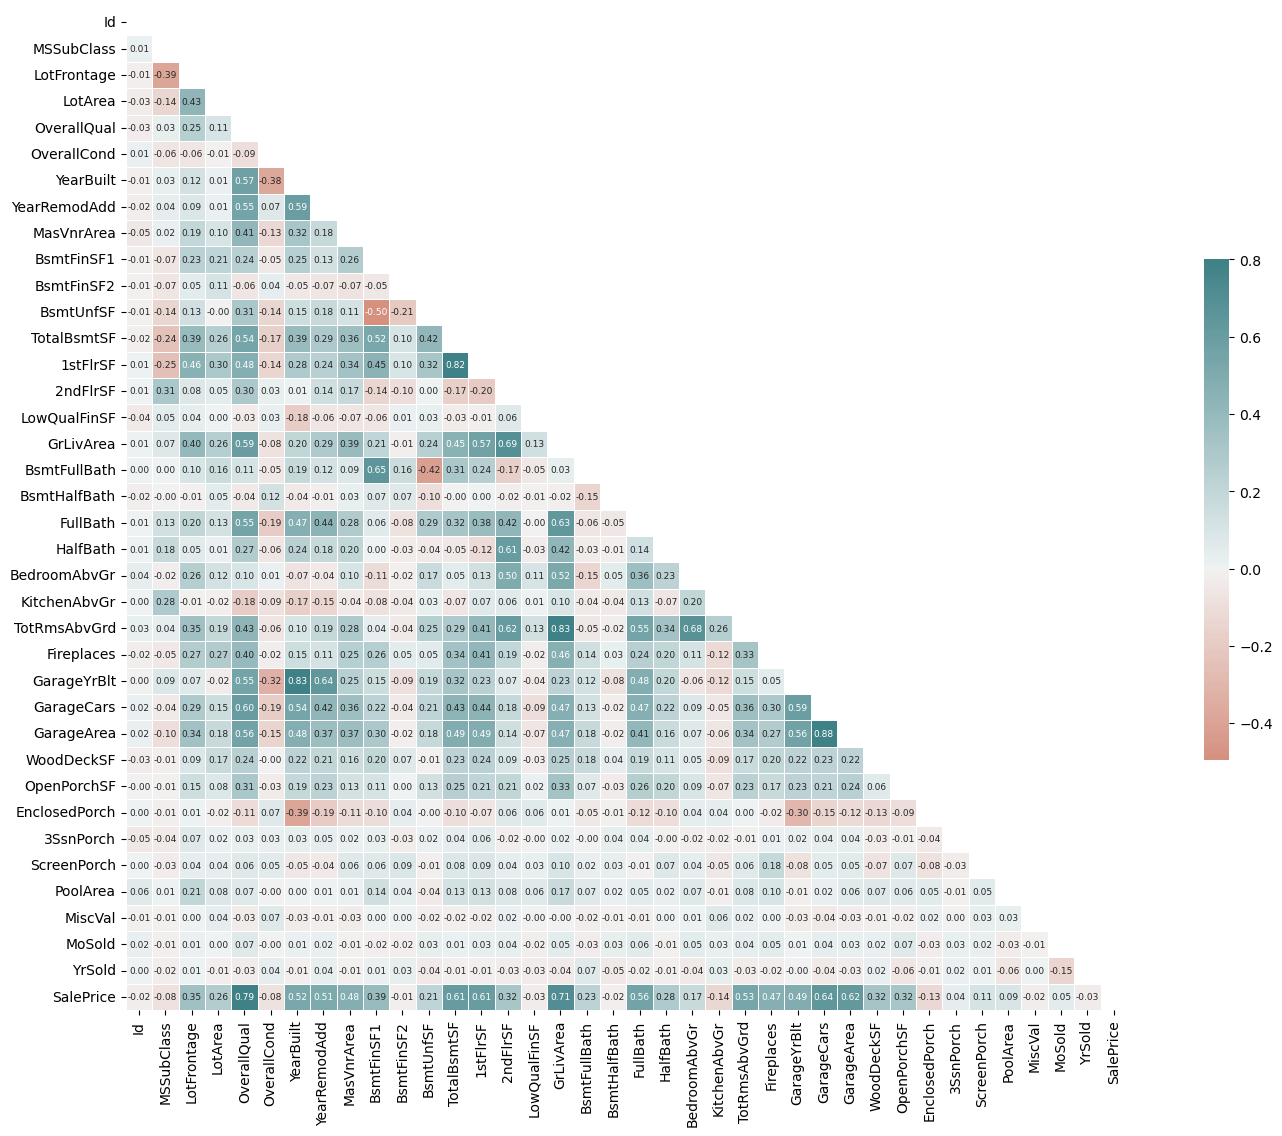

In [9]:
# Correlation Matrix using pearson correlation
# ดู correlation ของ features กับ target(saleprice)

f, ax = plt.subplots(figsize=(20, 13))
mat = train.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(20, 200, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=.8, center=0, annot = True,
            fmt=".2f", annot_kws={'fontsize': 6.5},
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

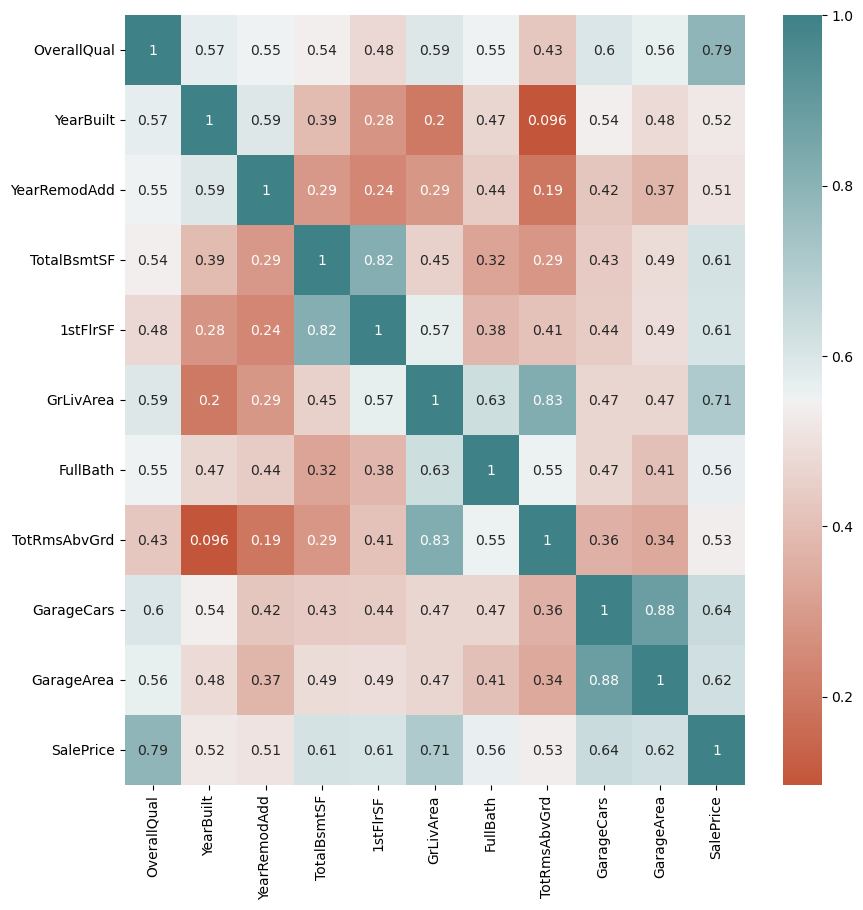

In [10]:
# most correlation features which more than 0.5 using spearman due to nonlinear features
# ดูว่า features ไหนบ้างที่มี correlation กับ saleprice มากกว่า 0.5

corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap=cmap)

In [11]:
# most correlation features (>0.5)
# รายชื่อ feature ที่มี correlation มากกว่า 0.5
# มีบาง features ที่ correlate กับ features อื่นสูง ซึ่งอาจจะเกิดจากเป็น features ที่คล้ายกัน เช่น GarageCars กับ GarageArea 

most_corr = top_corr_features.drop('SalePrice')
print(most_corr)

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea'],
      dtype='object')


In [12]:
# Detecting Multicollinearity using VIF
# ดู Multicollinearity หรือ features ที่มีความสัมพันธ์กันสูง จาก VIF และจากลักษณะของ features ที่อาจจะซ้ำซ้อนกัน

# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [13]:
# top correlation feature VIF
top_corr_df = train[most_corr]
print('Top correlation feature VIF')
print(calc_vif(top_corr_df).sort_values(by='VIF',ascending=False).reset_index(drop=True),'\n'*2,'*'*30)

## drop 'yearRemodAdd' due to very high VIF along with 'YearBuilt'
print('drop \'yearRemodAdd\'','\n', '*'*30)
top_corr_df.drop(['YearRemodAdd'], axis = 1, inplace = True)
print(calc_vif(top_corr_df).sort_values(by='VIF',ascending=False).reset_index(drop=True),'\n'*2,'*'*30)

## drop 'TotRmsAbvGrd' because it has a correlation with 'GrLivArea'
print('drop \'TotRmsAbvGrd\'','\n', '*'*30)
top_corr_df.drop(['TotRmsAbvGrd'], axis = 1, inplace = True)
print(calc_vif(top_corr_df).sort_values(by='VIF',ascending=False).reset_index(drop=True),'\n'*2,'*'*30)

## drop 'GarageCars' because it has a correlation with 'GarageArea'
print('drop \'GarageCars\'','\n', '*'*30)
top_corr_df.drop(['GarageCars'], axis = 1, inplace = True)
print(calc_vif(top_corr_df).sort_values(by='VIF',ascending=False).reset_index(drop=True),'\n'*2,'*'*30)

## drop 'TotalBsmtSF' because it has a correlation with '1stFlrSF'
print('drop \'TotalBsmtSF\'','\n', '*'*30)
top_corr_df.drop(['TotalBsmtSF'], axis = 1, inplace = True)
print(calc_vif(top_corr_df).sort_values(by='VIF',ascending=False).reset_index(drop=True),'\n'*2,'*'*30)


Top correlation feature VIF
       features          VIF
0     YearBuilt  8160.729383
1  YearRemodAdd  8011.544572
2  TotRmsAbvGrd    56.699800
3   OverallQual    48.259362
4     GrLivArea    46.000994
5      1stFlrSF    36.834107
6    GarageCars    34.022038
7    GarageArea    29.078616
8   TotalBsmtSF    24.318006
9      FullBath    17.882539 

 ******************************
drop 'yearRemodAdd' 
 ******************************
       features        VIF
0  TotRmsAbvGrd  56.365797
1   OverallQual  48.155854
2     GrLivArea  45.131462
3     YearBuilt  37.183284
4      1stFlrSF  36.699405
5    GarageCars  33.584270
6    GarageArea  29.069732
7   TotalBsmtSF  23.825037
8      FullBath  17.236831 

 ******************************
drop 'TotRmsAbvGrd' 
 ******************************
      features        VIF
0  OverallQual  47.546890
1     1stFlrSF  36.690685
2   GarageCars  33.455460
3   GarageArea  28.918895
4    YearBuilt  25.188884
5  TotalBsmtSF  23.612790
6    GrLivArea  21.589030
7

In [14]:
# most correlate features after eliminated Multicollinearity
# features ที่มี correlation สูงหลังจากตัด Multicollinearity features ออกแล้ว

most_corr_features = top_corr_df.columns
most_corr_features

Index(['OverallQual', 'YearBuilt', '1stFlrSF', 'GrLivArea', 'FullBath',
       'GarageArea'],
      dtype='object')

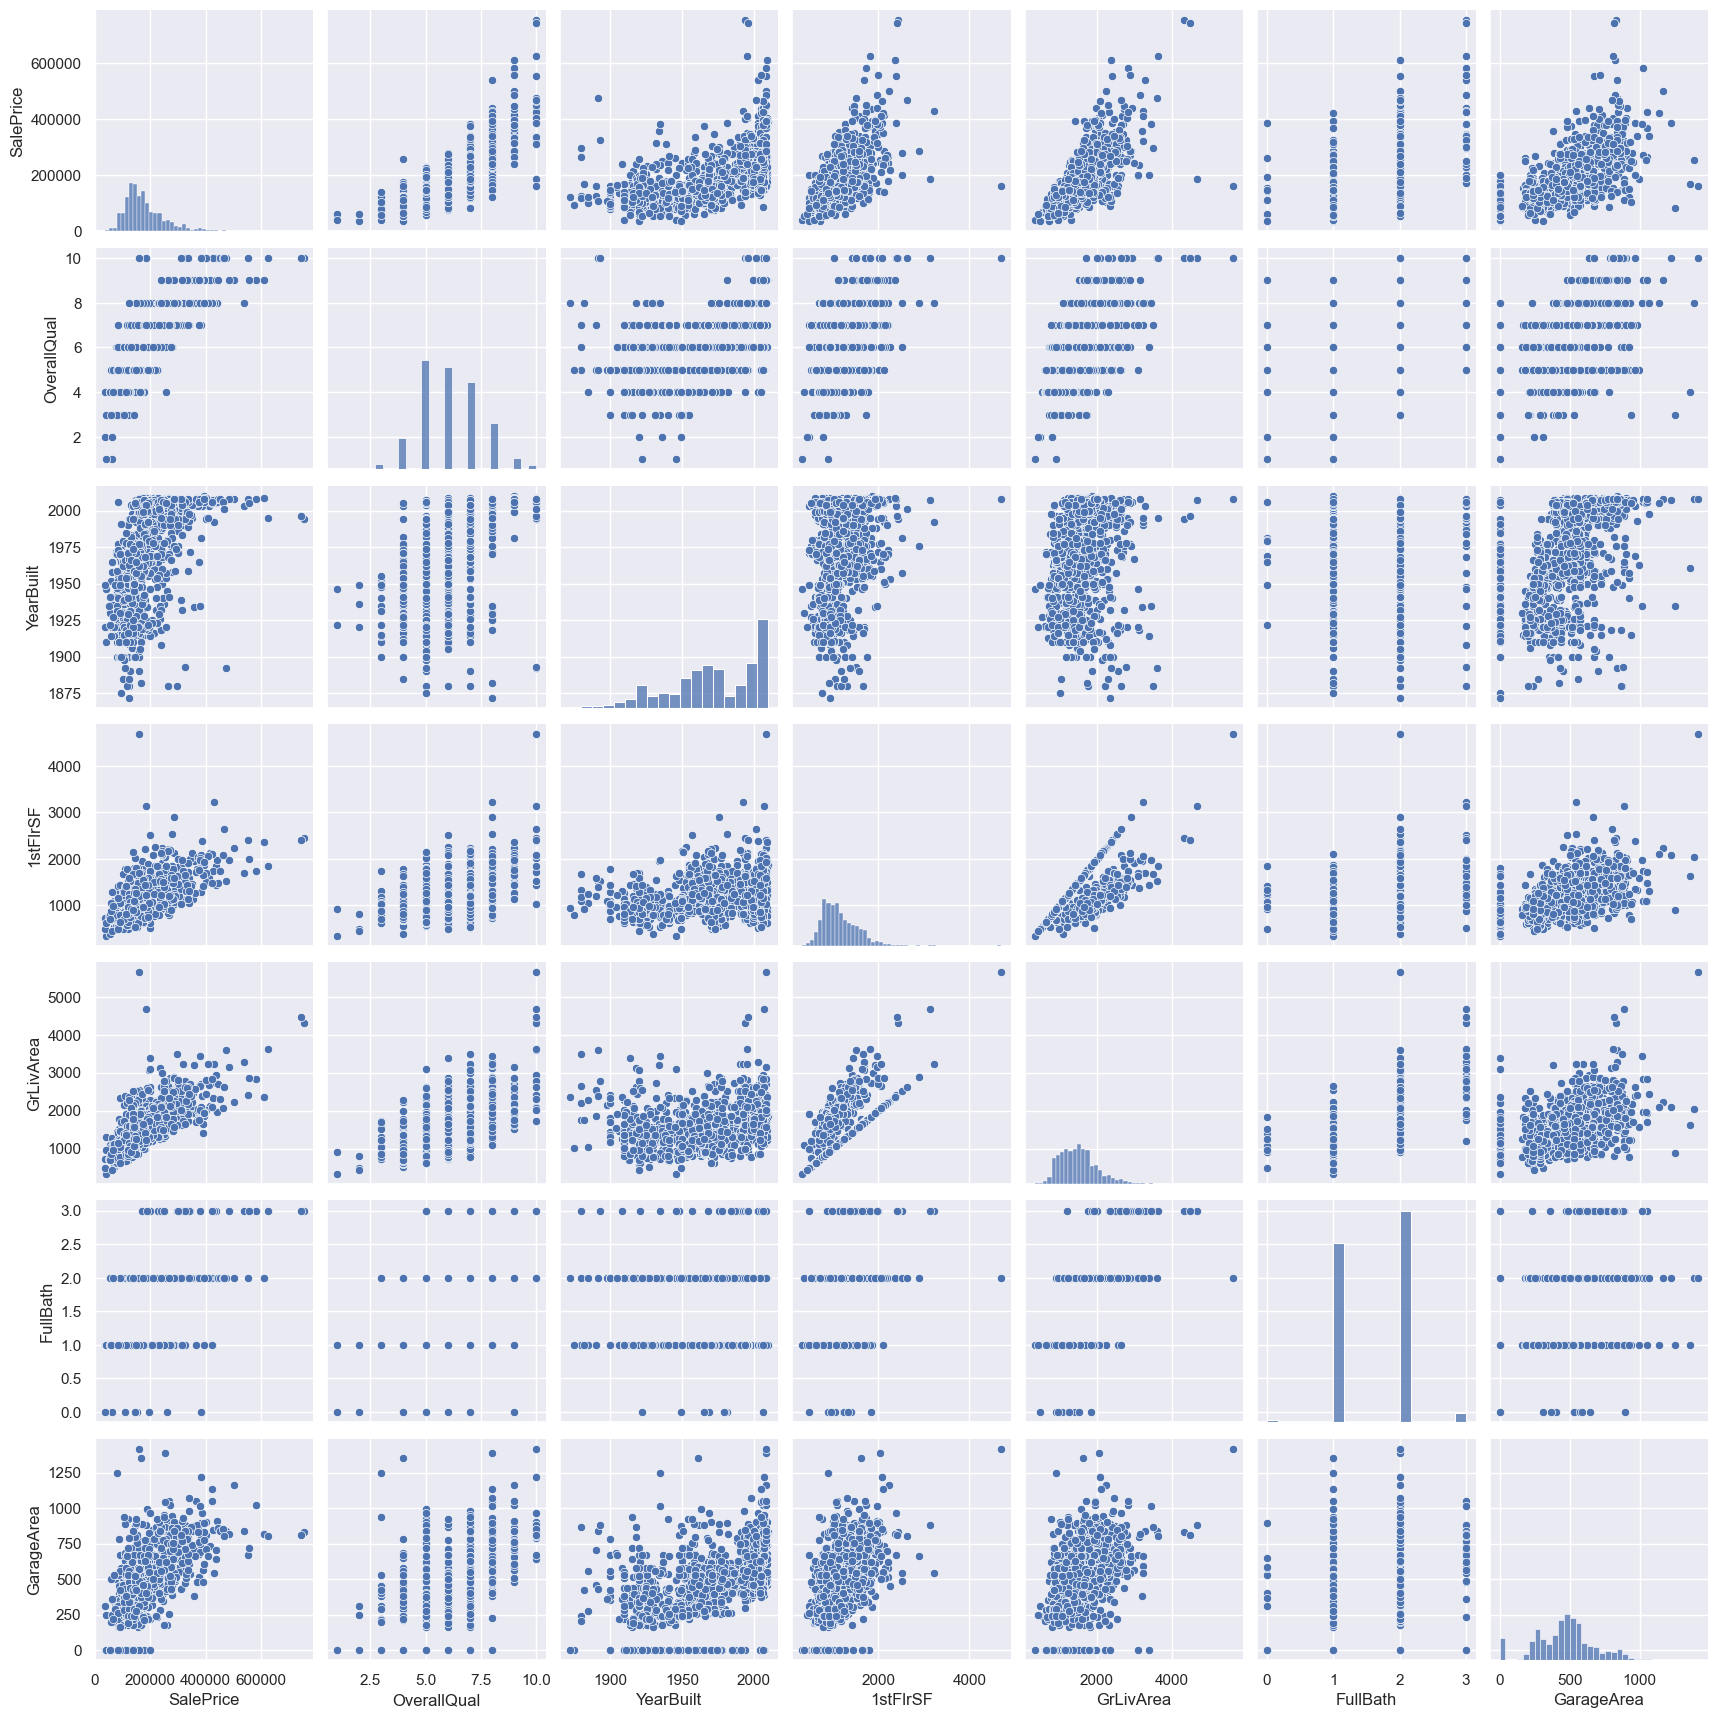

In [15]:
# see how each top feature correlated with sales price

most_corr = [str(x) for x in most_corr_features.to_list()]

sns.set()
cols = ['SalePrice']
cols += most_corr
sns.pairplot(train[cols], size = 2.5)
plt.show();


 mu = 180921.20 and sigma = 79415.29



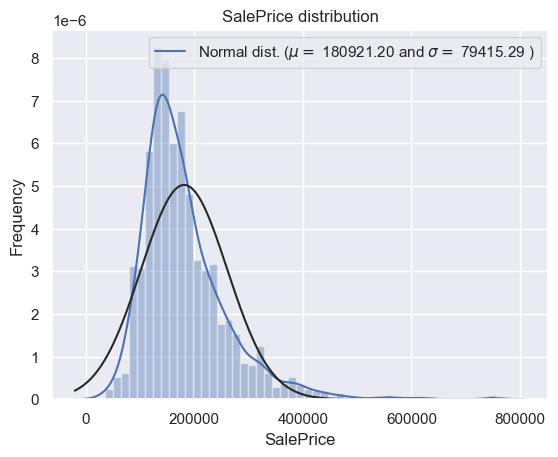

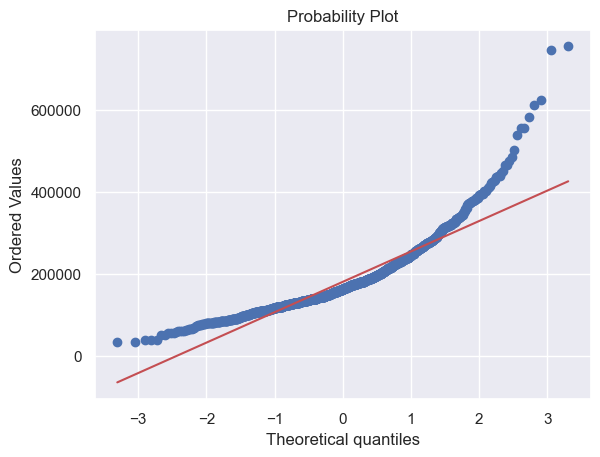

In [16]:
# investigate target variable (SalePrice)
    # target variable is right skew
    # Sale price เป็นกราฟเบ้ขวา ใช้ log transformation ในการเปลี่ยนให้เป็น normal distribution มากขึ้น

sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [17]:
# make the data more normal distribution with log transformation
# ใช้ log transformation เพื่อให้ data เป็น normal distribution มากขึ้น

target_log = np.log1p(train["SalePrice"])
y = target_log.reset_index(drop=True)

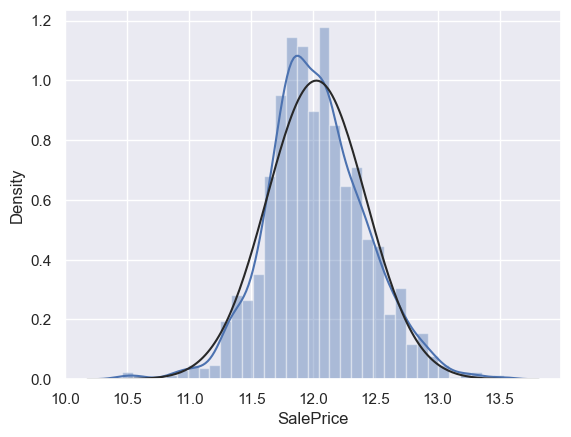

In [18]:
# plot SalePrice after apply log tranformation

sns.distplot(y, fit=norm);

## 3. Data processing

### Looking for missing data

- concat train and test data to preprocess
- find missing value in each features
- filling missing data
    - investigate and filling NAN from column description
    - filling remaining by knn model
    - drop unnessary features

In [19]:
# concat concat train and test data to preprocess
# รวม train กับ test เข้าด้วยกันเพื่อ preprocess ทั้งคู่พร้อมกันไป
    # note บางคนใน kaggle บอกว่าวิธีนี้อาจจะทำให้เกิด overfitting ได้ เพราะ data จาก test มารวมกับ train 

target = train['SalePrice']
test_id = test['Id']
train_test = pd.concat([train, test], axis=0, sort=False)
train_test = train_test.drop(['Id', 'SalePrice'], axis=1)

In [20]:
# missing value in features
# ดูว่ามี missing value ที่ features ไหนเท่าไรบ้าง โดยคิดว่าจะ drop features ที่มี missing values มากกว่า 20% ของ missing value ทั้งหมดทิ้งไป

Total = train_test.isnull().sum().sort_values(ascending=False)
percent = (train_test.isnull().sum() / train_test.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([Total, percent], axis=1, keys=['Total', 'Percent'])
missing_data['drop'] = np.where(missing_data['Percent'] > 20, 'Y', 'N')
missing_data.head(25)

,Total,Percent,drop
PoolQC,2909,99.657417,Y
MiscFeature,2814,96.402878,Y
Alley,2721,93.216855,Y
Fence,2348,80.438506,Y
FireplaceQu,1420,48.646797,Y
LotFrontage,486,16.649538,N
GarageYrBlt,159,5.447071,N
GarageFinish,159,5.447071,N
GarageQual,159,5.447071,N
GarageCond,159,5.447071,N


In [21]:
# drop useless features

useless = ['GarageYrBlt','YearRemodAdd'] 
train_test = train_test.drop(useless, axis = 1)

# drop the features which have more than 20% missing

train_test.drop((missing_data[missing_data['drop'] == 'Y']).index, axis=1, inplace=True)
total = train_test.isnull().sum().sort_values(ascending=False)
print('Remaining features which still having an missing value')
print(total[total != 0])

Remaining features which still having an missing value
LotFrontage     486
GarageCond      159
GarageFinish    159
GarageQual      159
GarageType      157
BsmtExposure     82
BsmtCond         82
BsmtQual         81
BsmtFinType2     80
BsmtFinType1     79
MasVnrType       24
MasVnrArea       23
MSZoning          4
Functional        2
BsmtHalfBath      2
BsmtFullBath      2
Utilities         2
Electrical        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFinSF1        1
GarageArea        1
SaleType          1
KitchenQual       1
BsmtFinSF2        1
Exterior2nd       1
Exterior1st       1
GarageCars        1
dtype: int64


### filling the missing Data

In [22]:
# Converting non-numeric predictors stored as numbers into string
# แปลง category features ที่อยู่ในรูป numeric เป็น string 

train_test['MSSubClass'] = train_test['MSSubClass'].apply(str)
train_test['YrSold'] = train_test['YrSold'].apply(str)
train_test['MoSold'] = train_test['MoSold'].apply(str)

In [23]:
# Filling Categorical NaN (from the description file )

# ใส่ missing value อิงตาม description ของ data
    # functional แทนด้วย 'Typ' = ระบบภายในบ้านใช้งานได้ปกติ
    # Electrical แทนด้วย 'SBrkr' = ระบบป้องกันไฟฟ้าในบ้านเป็นระดับมาตรฐาน
    # KitchenQual แทนด้วย 'TA' = คุณภาพห้องครัวเป็นระดับมาตรฐาน
    # Exterior1st, Exterior2nd, SaleType แทนด้วย Mode เพราะไม่มีค่ามาตรฐานในตัวเลือก
    # feature garage ที่เป็น missing values ถือว่าไม่มีที่จอดรถ
        # numeric แทนด้วย 0 เพราะ 
        # catagorical แทนด้วย 'none'
    # feature Bmst(basement) แทนที่ทำนองเดียวกับ garage
    
train_test['Functional'] = train_test['Functional'].fillna('Typ')
train_test['Electrical'] = train_test['Electrical'].fillna('SBrkr')
train_test['KitchenQual'] = train_test['KitchenQual'].fillna('TA')
train_test['Exterior1st'] = train_test['Exterior1st'].fillna(train_test['Exterior1st'].mode()[0])
train_test['Exterior2nd'] = train_test['Exterior2nd'].fillna(train_test['Exterior2nd'].mode()[0])
train_test['SaleType'] = train_test['SaleType'].fillna(train_test['SaleType'].mode()[0])

for col in ('GarageArea', 'GarageCars'):
    train_test[col] = train_test[col].fillna(0)
        
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    train_test[col] = train_test[col].fillna('None')
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train_test[col] = train_test[col].fillna('None')

In [24]:
# Checking the features with NaN remained out

for col in train_test:
    if train_test[col].isna().sum() > 0:
        print(train_test[col][0])
else :
    print('No remaining missing value')

0    RL
0    RH
Name: MSZoning, dtype: object
0    65.0
0    80.0
Name: LotFrontage, dtype: float64
0    AllPub
0    AllPub
Name: Utilities, dtype: object
0    BrkFace
0       None
Name: MasVnrType, dtype: object
0    196.0
0      0.0
Name: MasVnrArea, dtype: float64
0    706.0
0    468.0
Name: BsmtFinSF1, dtype: float64
0      0.0
0    144.0
Name: BsmtFinSF2, dtype: float64
0    150.0
0    270.0
Name: BsmtUnfSF, dtype: float64
0    856.0
0    882.0
Name: TotalBsmtSF, dtype: float64
0    1.0
0    0.0
Name: BsmtFullBath, dtype: float64
0    0.0
0    0.0
Name: BsmtHalfBath, dtype: float64
No remaining missing value


In [25]:
# Imputing with KnnRegressor (filling the missing value)
# ใช้ Knn ในการ fill missing value ที่เหลือ โดยให้จำนวนเพื่อนบ้านเป็น 5

def impute_knn(df):
    ttn = train_test.select_dtypes(include=[np.number])
    ttc = train_test.select_dtypes(exclude=[np.number])

    cols_nan = ttn.columns[ttn.isna().any()].tolist()         # columns w/ nan 
    cols_no_nan = ttn.columns.difference(cols_nan).values     # columns w/n nan

    for col in cols_nan:
        imp_test = ttn[ttn[col].isna()]   # indicies which have missing data will become our test set
        imp_train = ttn.dropna()          # all indicies which which have no missing data 
        model = KNeighborsRegressor(n_neighbors=5)  # KNR Unsupervised Approach
        knr = model.fit(imp_train[cols_no_nan], imp_train[col])
        ttn.loc[ttn[col].isna(), col] = knr.predict(imp_test[cols_no_nan])
    
    return pd.concat([ttn,ttc],axis=1)

train_test = impute_knn(train_test)


objects = []
for i in train_test.columns:
    if train_test[i].dtype == object:
        objects.append(i)
train_test.update(train_test[objects].fillna('None'))

In [26]:
# Checking the features with NaN remained out

for col in train_test:
    if train_test[col].isna().sum() > 0:
        print(train_test[col][0])
else :
    print('No remaining missing value')

No remaining missing value


In [27]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    2919 non-null   float64
 1   LotArea        2919 non-null   int64  
 2   OverallQual    2919 non-null   int64  
 3   OverallCond    2919 non-null   int64  
 4   YearBuilt      2919 non-null   int64  
 5   MasVnrArea     2919 non-null   float64
 6   BsmtFinSF1     2919 non-null   float64
 7   BsmtFinSF2     2919 non-null   float64
 8   BsmtUnfSF      2919 non-null   float64
 9   TotalBsmtSF    2919 non-null   float64
 10  1stFlrSF       2919 non-null   int64  
 11  2ndFlrSF       2919 non-null   int64  
 12  LowQualFinSF   2919 non-null   int64  
 13  GrLivArea      2919 non-null   int64  
 14  BsmtFullBath   2919 non-null   float64
 15  BsmtHalfBath   2919 non-null   float64
 16  FullBath       2919 non-null   int64  
 17  HalfBath       2919 non-null   int64  
 18  BedroomA

### Feature Engineering

#### convert the categorical to numerical

In [28]:
# Creating dummy variables from categorical features
# แปลง categorical features เป็น dummies variable ด้วย one-hot encoding

train_test_dummy = pd.get_dummies(train_test)

train_test_dummy.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,196.0,706.0,0.0,150.0,856.0,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,6,8,1976,0.0,978.0,0.0,284.0,1262.0,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,7,5,2001,162.0,486.0,0.0,434.0,920.0,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,7,5,1915,0.0,216.0,0.0,540.0,756.0,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,8,5,2000,350.0,655.0,0.0,490.0,1145.0,...,0,0,0,1,0,0,0,0,1,0


#### Fixing skewness

In [29]:
# Fetch all numeric features
# เลือก columns ที่ skew มากกว่า 0.5


numeric_features = train_test_dummy.dtypes[train_test_dummy.dtypes != object].index
skewed_features = train_test_dummy[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[skewed_features > 0.5]
skew_index = high_skew.index

high_skew[:20]

MSSubClass_150         54.000003
RoofMatl_Membran       54.000003
Exterior1st_ImStucc    54.000003
Condition2_RRAn        54.000003
RoofMatl_Metal         54.000003
Condition2_RRAe        54.000003
RoofMatl_ClyTile       54.000003
RoofMatl_Roll          54.000003
Electrical_Mix         54.000003
Utilities_NoSeWa       54.000003
Heating_Floor          54.000003
Exterior2nd_Other      54.000003
Exterior1st_AsphShn    38.164128
Functional_Sev         38.164128
Condition2_RRNn        38.164128
Exterior1st_CBlock     38.164128
Exterior1st_Stone      38.164128
Utilities_None         38.164128
Heating_OthW           38.164128
GarageQual_Ex          31.144840
dtype: float64

In [30]:
# Normalize skewed features using log_transformation
# Apply log transformation กับ function ที่ skew มากกว่า 0.5 เพื่อทำให้เป็น normal distribution

for i in skew_index:
    train_test_dummy[i] = np.log1p(train_test_dummy[i])

#### split data to train and test

In [31]:
# Train-Test separation

train = train_test_dummy[0:1460]
test = train_test_dummy[1460:]
test['Id'] = test_id

In [32]:
train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.189655,9.042040,7,1.791759,2003,5.283204,6.561031,0.0,5.017280,6.753438,...,0.0,0.0,0.0,1,0.000000,0.0,0.0,0.0,1,0.0
1,4.394449,9.169623,6,2.197225,1976,0.000000,6.886532,0.0,5.652489,7.141245,...,0.0,0.0,0.0,1,0.000000,0.0,0.0,0.0,1,0.0
2,4.234107,9.328212,7,1.791759,2001,5.093750,6.188264,0.0,6.075346,6.825460,...,0.0,0.0,0.0,1,0.000000,0.0,0.0,0.0,1,0.0
3,4.110874,9.164401,7,1.791759,1915,0.000000,5.379897,0.0,6.293419,6.629363,...,0.0,0.0,0.0,1,0.693359,0.0,0.0,0.0,0,0.0
4,4.442651,9.565284,8,1.791759,2000,5.860786,6.486161,0.0,6.196444,7.044033,...,0.0,0.0,0.0,1,0.000000,0.0,0.0,0.0,1,0.0


In [33]:
test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Id
0,4.394449,9.360741,5,1.945910,1961,0.000000,6.150603,4.976734,5.602119,6.783325,...,0.0,0.0,1,0.0,0.0,0.0,0.0,1,0.0,1461
1,4.406719,9.565775,6,1.945910,1958,4.691348,6.828712,0.000000,6.008813,7.192934,...,0.0,0.0,1,0.0,0.0,0.0,0.0,1,0.0,1462
2,4.317488,9.534668,5,1.791759,1997,0.000000,6.674561,0.000000,4.927254,6.834109,...,0.0,0.0,1,0.0,0.0,0.0,0.0,1,0.0,1463
3,4.369448,9.208238,6,1.945910,1998,3.044522,6.401917,0.000000,5.783825,6.831954,...,0.0,0.0,1,0.0,0.0,0.0,0.0,1,0.0,1464
4,3.784190,8.518392,8,1.791759,1992,0.000000,5.575949,0.000000,6.925595,7.155396,...,0.0,0.0,1,0.0,0.0,0.0,0.0,1,0.0,1465


## 4. Apply ML model

In [34]:
import shap
import xgboost as xgb
from catboost import Pool
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

In [35]:
# Creation of the RMSE metric:
# สร้างฟังก์ชั่นดู rmse กับ cv_rmse

def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, train, target_log, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [36]:
# ลอง ใช้ model หลายๆแบบ เพื่อดู rmse ที่ได้ โดยใช้วิธีการแบ่งข้อมูลเพื่อ แบบ k-fold cross validation โดยให้ k = 10

# 10 Fold Cross validation
kf = KFold(n_splits=10, random_state=42, shuffle=True)

cv_scores = []
cv_std = []

baseline_models = ['Linear_Reg.','Bayesian_Ridge_Reg.','LGBM_Reg.','SVR',
                   'Dec_Tree_Reg.','Random_Forest_Reg.', 'XGB_Reg.',
                   'Grad_Boost_Reg.','Cat_Boost_Reg.','Stacked_Reg.']

# Linear Regression
lreg = LinearRegression()
score_lreg = cv_rmse(lreg)
cv_scores.append(score_lreg.mean())
cv_std.append(score_lreg.std())

# Bayesian Ridge Regression
brr = BayesianRidge(compute_score=True)
score_brr = cv_rmse(brr)
cv_scores.append(score_brr.mean())
cv_std.append(score_brr.std())

# Light Gradient Boost Regressor
l_gbm = LGBMRegressor(objective='regression')
score_l_gbm = cv_rmse(l_gbm)
cv_scores.append(score_l_gbm.mean())
cv_std.append(score_l_gbm.std())

# Support Vector Regression
svr = SVR()
score_svr = cv_rmse(svr)
cv_scores.append(score_svr.mean())
cv_std.append(score_svr.std())

# Decision Tree Regressor
dtr = DecisionTreeRegressor()
score_dtr = cv_rmse(dtr)
cv_scores.append(score_dtr.mean())
cv_std.append(score_dtr.std())

# Random Forest Regressor
rfr = RandomForestRegressor()
score_rfr = cv_rmse(rfr)
cv_scores.append(score_rfr.mean())
cv_std.append(score_rfr.std())

# XGB Regressor
xgb = xgb.XGBRegressor()
score_xgb = cv_rmse(xgb)
cv_scores.append(score_xgb.mean())
cv_std.append(score_xgb.std())

# Gradient Boost Regressor
gbr = GradientBoostingRegressor()
score_gbr = cv_rmse(gbr)
cv_scores.append(score_gbr.mean())
cv_std.append(score_gbr.std())

# Cat Boost Regressor
catb = CatBoostRegressor()
score_catb = cv_rmse(catb)
cv_scores.append(score_catb.mean())
cv_std.append(score_catb.std())

# Stacked Regressor
stack_gen = StackingRegressor(regressors=(CatBoostRegressor(),
                                          LinearRegression(),
                                          BayesianRidge(),
                                          GradientBoostingRegressor()),
                              meta_regressor = CatBoostRegressor(),
                              use_features_in_secondary = True)

score_stack_gen = cv_rmse(stack_gen)
cv_scores.append(score_stack_gen.mean())
cv_std.append(score_stack_gen.std())

final_cv_score = pd.DataFrame(baseline_models, columns = ['Regressors'])
final_cv_score['RMSE_mean'] = cv_scores
final_cv_score['RMSE_std'] = cv_std

final_cv_score

Learning rate set to 0.042748
0:	learn: 0.3834523	total: 139ms	remaining: 2m 18s
1:	learn: 0.3732128	total: 142ms	remaining: 1m 10s
2:	learn: 0.3634805	total: 146ms	remaining: 48.4s
3:	learn: 0.3536380	total: 149ms	remaining: 37.2s
4:	learn: 0.3444958	total: 153ms	remaining: 30.5s
5:	learn: 0.3356424	total: 157ms	remaining: 26s
6:	learn: 0.3277050	total: 161ms	remaining: 22.8s
7:	learn: 0.3194883	total: 164ms	remaining: 20.3s
8:	learn: 0.3115280	total: 168ms	remaining: 18.5s
9:	learn: 0.3036085	total: 171ms	remaining: 16.9s
10:	learn: 0.2959630	total: 175ms	remaining: 15.7s
11:	learn: 0.2889831	total: 179ms	remaining: 14.7s
12:	learn: 0.2828200	total: 184ms	remaining: 14s
13:	learn: 0.2763010	total: 188ms	remaining: 13.2s
14:	learn: 0.2703996	total: 192ms	remaining: 12.6s
15:	learn: 0.2648500	total: 196ms	remaining: 12s
16:	learn: 0.2587389	total: 199ms	remaining: 11.5s
17:	learn: 0.2533158	total: 203ms	remaining: 11.1s
18:	learn: 0.2478233	total: 207ms	remaining: 10.7s
19:	learn: 0.24

210:	learn: 0.0923968	total: 916ms	remaining: 3.42s
211:	learn: 0.0923045	total: 920ms	remaining: 3.42s
212:	learn: 0.0921653	total: 923ms	remaining: 3.41s
213:	learn: 0.0919153	total: 927ms	remaining: 3.4s
214:	learn: 0.0917049	total: 931ms	remaining: 3.4s
215:	learn: 0.0916124	total: 934ms	remaining: 3.39s
216:	learn: 0.0914855	total: 938ms	remaining: 3.38s
217:	learn: 0.0913153	total: 942ms	remaining: 3.38s
218:	learn: 0.0911962	total: 945ms	remaining: 3.37s
219:	learn: 0.0909888	total: 949ms	remaining: 3.36s
220:	learn: 0.0907915	total: 952ms	remaining: 3.36s
221:	learn: 0.0905918	total: 956ms	remaining: 3.35s
222:	learn: 0.0904266	total: 959ms	remaining: 3.34s
223:	learn: 0.0903354	total: 963ms	remaining: 3.33s
224:	learn: 0.0901435	total: 966ms	remaining: 3.33s
225:	learn: 0.0900976	total: 970ms	remaining: 3.32s
226:	learn: 0.0899009	total: 973ms	remaining: 3.31s
227:	learn: 0.0897193	total: 977ms	remaining: 3.31s
228:	learn: 0.0895762	total: 980ms	remaining: 3.3s
229:	learn: 0.0

417:	learn: 0.0692649	total: 1.65s	remaining: 2.3s
418:	learn: 0.0692102	total: 1.65s	remaining: 2.29s
419:	learn: 0.0690936	total: 1.66s	remaining: 2.29s
420:	learn: 0.0690032	total: 1.66s	remaining: 2.29s
421:	learn: 0.0689439	total: 1.67s	remaining: 2.28s
422:	learn: 0.0689281	total: 1.67s	remaining: 2.28s
423:	learn: 0.0688246	total: 1.67s	remaining: 2.27s
424:	learn: 0.0687840	total: 1.68s	remaining: 2.27s
425:	learn: 0.0687073	total: 1.68s	remaining: 2.26s
426:	learn: 0.0685794	total: 1.68s	remaining: 2.26s
427:	learn: 0.0684839	total: 1.69s	remaining: 2.25s
428:	learn: 0.0683142	total: 1.69s	remaining: 2.25s
429:	learn: 0.0682156	total: 1.69s	remaining: 2.25s
430:	learn: 0.0681064	total: 1.7s	remaining: 2.24s
431:	learn: 0.0679843	total: 1.7s	remaining: 2.24s
432:	learn: 0.0678544	total: 1.7s	remaining: 2.23s
433:	learn: 0.0677282	total: 1.71s	remaining: 2.23s
434:	learn: 0.0676527	total: 1.71s	remaining: 2.22s
435:	learn: 0.0675095	total: 1.71s	remaining: 2.22s
436:	learn: 0.06

622:	learn: 0.0547114	total: 2.38s	remaining: 1.44s
623:	learn: 0.0546416	total: 2.39s	remaining: 1.44s
624:	learn: 0.0545590	total: 2.39s	remaining: 1.43s
625:	learn: 0.0545515	total: 2.4s	remaining: 1.43s
626:	learn: 0.0544880	total: 2.4s	remaining: 1.43s
627:	learn: 0.0544393	total: 2.4s	remaining: 1.42s
628:	learn: 0.0543753	total: 2.4s	remaining: 1.42s
629:	learn: 0.0543258	total: 2.41s	remaining: 1.41s
630:	learn: 0.0542631	total: 2.41s	remaining: 1.41s
631:	learn: 0.0541877	total: 2.42s	remaining: 1.41s
632:	learn: 0.0541568	total: 2.42s	remaining: 1.4s
633:	learn: 0.0541496	total: 2.42s	remaining: 1.4s
634:	learn: 0.0540580	total: 2.43s	remaining: 1.4s
635:	learn: 0.0539871	total: 2.43s	remaining: 1.39s
636:	learn: 0.0539078	total: 2.43s	remaining: 1.39s
637:	learn: 0.0538025	total: 2.44s	remaining: 1.38s
638:	learn: 0.0537197	total: 2.44s	remaining: 1.38s
639:	learn: 0.0536114	total: 2.45s	remaining: 1.38s
640:	learn: 0.0535436	total: 2.45s	remaining: 1.37s
641:	learn: 0.05346

820:	learn: 0.0437228	total: 3.13s	remaining: 682ms
821:	learn: 0.0436786	total: 3.13s	remaining: 678ms
822:	learn: 0.0436352	total: 3.14s	remaining: 675ms
823:	learn: 0.0435673	total: 3.14s	remaining: 671ms
824:	learn: 0.0435157	total: 3.15s	remaining: 667ms
825:	learn: 0.0434518	total: 3.15s	remaining: 663ms
826:	learn: 0.0433869	total: 3.15s	remaining: 659ms
827:	learn: 0.0433461	total: 3.16s	remaining: 656ms
828:	learn: 0.0433061	total: 3.16s	remaining: 652ms
829:	learn: 0.0432878	total: 3.16s	remaining: 648ms
830:	learn: 0.0432592	total: 3.17s	remaining: 644ms
831:	learn: 0.0432030	total: 3.17s	remaining: 640ms
832:	learn: 0.0431661	total: 3.17s	remaining: 636ms
833:	learn: 0.0431030	total: 3.18s	remaining: 633ms
834:	learn: 0.0430688	total: 3.18s	remaining: 629ms
835:	learn: 0.0430295	total: 3.19s	remaining: 625ms
836:	learn: 0.0429763	total: 3.19s	remaining: 621ms
837:	learn: 0.0429717	total: 3.19s	remaining: 617ms
838:	learn: 0.0429299	total: 3.2s	remaining: 613ms
839:	learn: 0

Learning rate set to 0.042748
0:	learn: 0.3858283	total: 3.98ms	remaining: 3.98s
1:	learn: 0.3752033	total: 7.9ms	remaining: 3.94s
2:	learn: 0.3649706	total: 11.7ms	remaining: 3.88s
3:	learn: 0.3550706	total: 15.7ms	remaining: 3.91s
4:	learn: 0.3459975	total: 19.4ms	remaining: 3.87s
5:	learn: 0.3369635	total: 23.4ms	remaining: 3.88s
6:	learn: 0.3278481	total: 27.8ms	remaining: 3.94s
7:	learn: 0.3197370	total: 32ms	remaining: 3.96s
8:	learn: 0.3117200	total: 35.9ms	remaining: 3.95s
9:	learn: 0.3040174	total: 39.6ms	remaining: 3.92s
10:	learn: 0.2966634	total: 43.4ms	remaining: 3.9s
11:	learn: 0.2895264	total: 47.4ms	remaining: 3.9s
12:	learn: 0.2837719	total: 51.3ms	remaining: 3.9s
13:	learn: 0.2771390	total: 55.1ms	remaining: 3.88s
14:	learn: 0.2714724	total: 58.8ms	remaining: 3.86s
15:	learn: 0.2656935	total: 62.6ms	remaining: 3.85s
16:	learn: 0.2596691	total: 66.3ms	remaining: 3.83s
17:	learn: 0.2543038	total: 70.7ms	remaining: 3.85s
18:	learn: 0.2487331	total: 74.6ms	remaining: 3.85

173:	learn: 0.0964786	total: 699ms	remaining: 3.32s
174:	learn: 0.0963058	total: 734ms	remaining: 3.46s
175:	learn: 0.0961209	total: 738ms	remaining: 3.46s
176:	learn: 0.0959967	total: 742ms	remaining: 3.45s
177:	learn: 0.0959250	total: 745ms	remaining: 3.44s
178:	learn: 0.0958104	total: 749ms	remaining: 3.44s
179:	learn: 0.0957157	total: 752ms	remaining: 3.43s
180:	learn: 0.0955719	total: 756ms	remaining: 3.42s
181:	learn: 0.0953479	total: 760ms	remaining: 3.41s
182:	learn: 0.0950813	total: 763ms	remaining: 3.41s
183:	learn: 0.0948724	total: 767ms	remaining: 3.4s
184:	learn: 0.0947178	total: 771ms	remaining: 3.39s
185:	learn: 0.0945962	total: 774ms	remaining: 3.39s
186:	learn: 0.0944513	total: 778ms	remaining: 3.38s
187:	learn: 0.0942807	total: 781ms	remaining: 3.37s
188:	learn: 0.0940572	total: 785ms	remaining: 3.37s
189:	learn: 0.0938195	total: 788ms	remaining: 3.36s
190:	learn: 0.0935291	total: 792ms	remaining: 3.35s
191:	learn: 0.0934136	total: 796ms	remaining: 3.35s
192:	learn: 0

348:	learn: 0.0729554	total: 1.42s	remaining: 2.66s
349:	learn: 0.0727905	total: 1.43s	remaining: 2.65s
350:	learn: 0.0726867	total: 1.43s	remaining: 2.65s
351:	learn: 0.0725366	total: 1.44s	remaining: 2.65s
352:	learn: 0.0724562	total: 1.44s	remaining: 2.64s
353:	learn: 0.0723565	total: 1.45s	remaining: 2.64s
354:	learn: 0.0722429	total: 1.45s	remaining: 2.63s
355:	learn: 0.0721861	total: 1.45s	remaining: 2.63s
356:	learn: 0.0720674	total: 1.46s	remaining: 2.63s
357:	learn: 0.0719888	total: 1.46s	remaining: 2.62s
358:	learn: 0.0718556	total: 1.47s	remaining: 2.62s
359:	learn: 0.0717592	total: 1.47s	remaining: 2.61s
360:	learn: 0.0716836	total: 1.47s	remaining: 2.61s
361:	learn: 0.0716182	total: 1.48s	remaining: 2.6s
362:	learn: 0.0715257	total: 1.48s	remaining: 2.6s
363:	learn: 0.0714781	total: 1.49s	remaining: 2.6s
364:	learn: 0.0713621	total: 1.49s	remaining: 2.59s
365:	learn: 0.0712520	total: 1.5s	remaining: 2.59s
366:	learn: 0.0712006	total: 1.5s	remaining: 2.58s
367:	learn: 0.071

524:	learn: 0.0590700	total: 2.14s	remaining: 1.94s
525:	learn: 0.0590198	total: 2.14s	remaining: 1.93s
526:	learn: 0.0589746	total: 2.15s	remaining: 1.93s
527:	learn: 0.0588771	total: 2.15s	remaining: 1.92s
528:	learn: 0.0588663	total: 2.16s	remaining: 1.92s
529:	learn: 0.0587903	total: 2.16s	remaining: 1.92s
530:	learn: 0.0587187	total: 2.17s	remaining: 1.91s
531:	learn: 0.0586173	total: 2.17s	remaining: 1.91s
532:	learn: 0.0585758	total: 2.17s	remaining: 1.9s
533:	learn: 0.0585041	total: 2.18s	remaining: 1.9s
534:	learn: 0.0584519	total: 2.18s	remaining: 1.9s
535:	learn: 0.0583446	total: 2.18s	remaining: 1.89s
536:	learn: 0.0582987	total: 2.19s	remaining: 1.89s
537:	learn: 0.0582769	total: 2.19s	remaining: 1.88s
538:	learn: 0.0581963	total: 2.2s	remaining: 1.88s
539:	learn: 0.0581184	total: 2.2s	remaining: 1.88s
540:	learn: 0.0580548	total: 2.21s	remaining: 1.87s
541:	learn: 0.0579772	total: 2.21s	remaining: 1.87s
542:	learn: 0.0579185	total: 2.21s	remaining: 1.86s
543:	learn: 0.057

695:	learn: 0.0489465	total: 2.85s	remaining: 1.25s
696:	learn: 0.0488874	total: 2.85s	remaining: 1.24s
697:	learn: 0.0488433	total: 2.86s	remaining: 1.24s
698:	learn: 0.0487509	total: 2.86s	remaining: 1.23s
699:	learn: 0.0487355	total: 2.87s	remaining: 1.23s
700:	learn: 0.0486642	total: 2.87s	remaining: 1.22s
701:	learn: 0.0486301	total: 2.87s	remaining: 1.22s
702:	learn: 0.0485988	total: 2.88s	remaining: 1.22s
703:	learn: 0.0485918	total: 2.88s	remaining: 1.21s
704:	learn: 0.0485355	total: 2.88s	remaining: 1.21s
705:	learn: 0.0484774	total: 2.89s	remaining: 1.2s
706:	learn: 0.0484606	total: 2.89s	remaining: 1.2s
707:	learn: 0.0484398	total: 2.89s	remaining: 1.19s
708:	learn: 0.0484101	total: 2.9s	remaining: 1.19s
709:	learn: 0.0483579	total: 2.9s	remaining: 1.18s
710:	learn: 0.0482938	total: 2.9s	remaining: 1.18s
711:	learn: 0.0482829	total: 2.91s	remaining: 1.18s
712:	learn: 0.0482794	total: 2.91s	remaining: 1.17s
713:	learn: 0.0482721	total: 2.91s	remaining: 1.17s
714:	learn: 0.048

891:	learn: 0.0406526	total: 3.57s	remaining: 432ms
892:	learn: 0.0406128	total: 3.57s	remaining: 428ms
893:	learn: 0.0405713	total: 3.58s	remaining: 424ms
894:	learn: 0.0405315	total: 3.58s	remaining: 420ms
895:	learn: 0.0404668	total: 3.58s	remaining: 416ms
896:	learn: 0.0404301	total: 3.59s	remaining: 412ms
897:	learn: 0.0404037	total: 3.59s	remaining: 408ms
898:	learn: 0.0403409	total: 3.6s	remaining: 404ms
899:	learn: 0.0402937	total: 3.6s	remaining: 400ms
900:	learn: 0.0402314	total: 3.6s	remaining: 396ms
901:	learn: 0.0401939	total: 3.61s	remaining: 392ms
902:	learn: 0.0401602	total: 3.61s	remaining: 388ms
903:	learn: 0.0401219	total: 3.61s	remaining: 384ms
904:	learn: 0.0400935	total: 3.62s	remaining: 380ms
905:	learn: 0.0400737	total: 3.62s	remaining: 376ms
906:	learn: 0.0400214	total: 3.62s	remaining: 372ms
907:	learn: 0.0400057	total: 3.63s	remaining: 367ms
908:	learn: 0.0399652	total: 3.63s	remaining: 363ms
909:	learn: 0.0399321	total: 3.63s	remaining: 359ms
910:	learn: 0.0

92:	learn: 0.1250431	total: 364ms	remaining: 3.55s
93:	learn: 0.1245636	total: 368ms	remaining: 3.55s
94:	learn: 0.1240280	total: 373ms	remaining: 3.55s
95:	learn: 0.1235062	total: 377ms	remaining: 3.55s
96:	learn: 0.1229896	total: 380ms	remaining: 3.54s
97:	learn: 0.1224928	total: 384ms	remaining: 3.54s
98:	learn: 0.1220018	total: 388ms	remaining: 3.53s
99:	learn: 0.1216095	total: 392ms	remaining: 3.53s
100:	learn: 0.1210570	total: 396ms	remaining: 3.53s
101:	learn: 0.1205031	total: 400ms	remaining: 3.52s
102:	learn: 0.1201026	total: 404ms	remaining: 3.52s
103:	learn: 0.1198029	total: 407ms	remaining: 3.51s
104:	learn: 0.1193305	total: 411ms	remaining: 3.5s
105:	learn: 0.1188624	total: 415ms	remaining: 3.5s
106:	learn: 0.1182524	total: 419ms	remaining: 3.5s
107:	learn: 0.1178682	total: 423ms	remaining: 3.49s
108:	learn: 0.1175893	total: 427ms	remaining: 3.49s
109:	learn: 0.1172064	total: 431ms	remaining: 3.48s
110:	learn: 0.1168210	total: 435ms	remaining: 3.48s
111:	learn: 0.1164272	t

277:	learn: 0.0831349	total: 1.08s	remaining: 2.81s
278:	learn: 0.0830214	total: 1.08s	remaining: 2.8s
279:	learn: 0.0829600	total: 1.09s	remaining: 2.8s
280:	learn: 0.0827975	total: 1.09s	remaining: 2.79s
281:	learn: 0.0827404	total: 1.09s	remaining: 2.79s
282:	learn: 0.0826602	total: 1.1s	remaining: 2.79s
283:	learn: 0.0824719	total: 1.1s	remaining: 2.78s
284:	learn: 0.0823130	total: 1.11s	remaining: 2.78s
285:	learn: 0.0821814	total: 1.11s	remaining: 2.77s
286:	learn: 0.0820768	total: 1.11s	remaining: 2.77s
287:	learn: 0.0819103	total: 1.12s	remaining: 2.76s
288:	learn: 0.0817839	total: 1.12s	remaining: 2.76s
289:	learn: 0.0816466	total: 1.13s	remaining: 2.75s
290:	learn: 0.0814938	total: 1.13s	remaining: 2.75s
291:	learn: 0.0813898	total: 1.13s	remaining: 2.75s
292:	learn: 0.0813150	total: 1.14s	remaining: 2.74s
293:	learn: 0.0811736	total: 1.14s	remaining: 2.74s
294:	learn: 0.0810477	total: 1.14s	remaining: 2.73s
295:	learn: 0.0808804	total: 1.15s	remaining: 2.73s
296:	learn: 0.08

466:	learn: 0.0653364	total: 1.79s	remaining: 2.04s
467:	learn: 0.0652618	total: 1.79s	remaining: 2.04s
468:	learn: 0.0651726	total: 1.8s	remaining: 2.03s
469:	learn: 0.0650714	total: 1.8s	remaining: 2.03s
470:	learn: 0.0649702	total: 1.8s	remaining: 2.03s
471:	learn: 0.0649052	total: 1.81s	remaining: 2.02s
472:	learn: 0.0648567	total: 1.81s	remaining: 2.02s
473:	learn: 0.0647106	total: 1.81s	remaining: 2.01s
474:	learn: 0.0646597	total: 1.82s	remaining: 2.01s
475:	learn: 0.0646167	total: 1.82s	remaining: 2.01s
476:	learn: 0.0645327	total: 1.83s	remaining: 2s
477:	learn: 0.0644652	total: 1.83s	remaining: 2s
478:	learn: 0.0643745	total: 1.83s	remaining: 1.99s
479:	learn: 0.0643006	total: 1.84s	remaining: 1.99s
480:	learn: 0.0642129	total: 1.84s	remaining: 1.99s
481:	learn: 0.0641635	total: 1.84s	remaining: 1.98s
482:	learn: 0.0640804	total: 1.85s	remaining: 1.98s
483:	learn: 0.0640156	total: 1.85s	remaining: 1.98s
484:	learn: 0.0638874	total: 1.86s	remaining: 1.97s
485:	learn: 0.0638097

658:	learn: 0.0528926	total: 2.51s	remaining: 1.3s
659:	learn: 0.0528068	total: 2.51s	remaining: 1.29s
660:	learn: 0.0528005	total: 2.52s	remaining: 1.29s
661:	learn: 0.0527959	total: 2.52s	remaining: 1.29s
662:	learn: 0.0527456	total: 2.53s	remaining: 1.28s
663:	learn: 0.0526766	total: 2.53s	remaining: 1.28s
664:	learn: 0.0526441	total: 2.53s	remaining: 1.28s
665:	learn: 0.0525795	total: 2.54s	remaining: 1.27s
666:	learn: 0.0525742	total: 2.54s	remaining: 1.27s
667:	learn: 0.0525381	total: 2.54s	remaining: 1.26s
668:	learn: 0.0524717	total: 2.55s	remaining: 1.26s
669:	learn: 0.0523958	total: 2.55s	remaining: 1.26s
670:	learn: 0.0523385	total: 2.56s	remaining: 1.25s
671:	learn: 0.0522657	total: 2.56s	remaining: 1.25s
672:	learn: 0.0521836	total: 2.56s	remaining: 1.25s
673:	learn: 0.0521676	total: 2.57s	remaining: 1.24s
674:	learn: 0.0521416	total: 2.57s	remaining: 1.24s
675:	learn: 0.0520412	total: 2.57s	remaining: 1.23s
676:	learn: 0.0519840	total: 2.58s	remaining: 1.23s
677:	learn: 0

843:	learn: 0.0435812	total: 3.23s	remaining: 598ms
844:	learn: 0.0435170	total: 3.24s	remaining: 594ms
845:	learn: 0.0434797	total: 3.24s	remaining: 590ms
846:	learn: 0.0434382	total: 3.25s	remaining: 586ms
847:	learn: 0.0434021	total: 3.25s	remaining: 582ms
848:	learn: 0.0433501	total: 3.25s	remaining: 579ms
849:	learn: 0.0433062	total: 3.26s	remaining: 575ms
850:	learn: 0.0432727	total: 3.26s	remaining: 571ms
851:	learn: 0.0432166	total: 3.26s	remaining: 567ms
852:	learn: 0.0431766	total: 3.27s	remaining: 563ms
853:	learn: 0.0431390	total: 3.27s	remaining: 559ms
854:	learn: 0.0430827	total: 3.27s	remaining: 555ms
855:	learn: 0.0430297	total: 3.28s	remaining: 551ms
856:	learn: 0.0429892	total: 3.28s	remaining: 548ms
857:	learn: 0.0429550	total: 3.29s	remaining: 544ms
858:	learn: 0.0428887	total: 3.29s	remaining: 540ms
859:	learn: 0.0428389	total: 3.29s	remaining: 536ms
860:	learn: 0.0427993	total: 3.3s	remaining: 532ms
861:	learn: 0.0427693	total: 3.3s	remaining: 528ms
862:	learn: 0.

28:	learn: 0.2060737	total: 161ms	remaining: 5.37s
29:	learn: 0.2030252	total: 165ms	remaining: 5.32s
30:	learn: 0.2000899	total: 169ms	remaining: 5.28s
31:	learn: 0.1969933	total: 173ms	remaining: 5.23s
32:	learn: 0.1940016	total: 177ms	remaining: 5.18s
33:	learn: 0.1912826	total: 180ms	remaining: 5.12s
34:	learn: 0.1885367	total: 184ms	remaining: 5.07s
35:	learn: 0.1857108	total: 188ms	remaining: 5.04s
36:	learn: 0.1833086	total: 192ms	remaining: 5s
37:	learn: 0.1811588	total: 196ms	remaining: 4.97s
38:	learn: 0.1789709	total: 200ms	remaining: 4.93s
39:	learn: 0.1768358	total: 204ms	remaining: 4.89s
40:	learn: 0.1743632	total: 207ms	remaining: 4.85s
41:	learn: 0.1724972	total: 211ms	remaining: 4.82s
42:	learn: 0.1706672	total: 215ms	remaining: 4.79s
43:	learn: 0.1687801	total: 219ms	remaining: 4.75s
44:	learn: 0.1670705	total: 223ms	remaining: 4.73s
45:	learn: 0.1653696	total: 227ms	remaining: 4.7s
46:	learn: 0.1637951	total: 231ms	remaining: 4.68s
47:	learn: 0.1624624	total: 234ms	r

214:	learn: 0.0906651	total: 893ms	remaining: 3.26s
215:	learn: 0.0905654	total: 897ms	remaining: 3.25s
216:	learn: 0.0903399	total: 900ms	remaining: 3.25s
217:	learn: 0.0902013	total: 904ms	remaining: 3.24s
218:	learn: 0.0900533	total: 907ms	remaining: 3.23s
219:	learn: 0.0898793	total: 911ms	remaining: 3.23s
220:	learn: 0.0898283	total: 915ms	remaining: 3.22s
221:	learn: 0.0897007	total: 918ms	remaining: 3.22s
222:	learn: 0.0896226	total: 921ms	remaining: 3.21s
223:	learn: 0.0894422	total: 925ms	remaining: 3.2s
224:	learn: 0.0892141	total: 929ms	remaining: 3.2s
225:	learn: 0.0890886	total: 932ms	remaining: 3.19s
226:	learn: 0.0888735	total: 936ms	remaining: 3.19s
227:	learn: 0.0886554	total: 940ms	remaining: 3.18s
228:	learn: 0.0886102	total: 944ms	remaining: 3.18s
229:	learn: 0.0885724	total: 947ms	remaining: 3.17s
230:	learn: 0.0883736	total: 951ms	remaining: 3.17s
231:	learn: 0.0881754	total: 955ms	remaining: 3.16s
232:	learn: 0.0879846	total: 958ms	remaining: 3.15s
233:	learn: 0.

419:	learn: 0.0684909	total: 1.63s	remaining: 2.25s
420:	learn: 0.0683557	total: 1.63s	remaining: 2.25s
421:	learn: 0.0683393	total: 1.64s	remaining: 2.24s
422:	learn: 0.0682011	total: 1.64s	remaining: 2.24s
423:	learn: 0.0681528	total: 1.65s	remaining: 2.23s
424:	learn: 0.0681399	total: 1.65s	remaining: 2.23s
425:	learn: 0.0680884	total: 1.65s	remaining: 2.23s
426:	learn: 0.0680148	total: 1.66s	remaining: 2.22s
427:	learn: 0.0679121	total: 1.66s	remaining: 2.22s
428:	learn: 0.0677950	total: 1.66s	remaining: 2.21s
429:	learn: 0.0677129	total: 1.67s	remaining: 2.21s
430:	learn: 0.0676356	total: 1.67s	remaining: 2.2s
431:	learn: 0.0675621	total: 1.67s	remaining: 2.2s
432:	learn: 0.0675177	total: 1.68s	remaining: 2.19s
433:	learn: 0.0675054	total: 1.68s	remaining: 2.19s
434:	learn: 0.0674137	total: 1.68s	remaining: 2.19s
435:	learn: 0.0673500	total: 1.69s	remaining: 2.18s
436:	learn: 0.0672710	total: 1.69s	remaining: 2.18s
437:	learn: 0.0672552	total: 1.69s	remaining: 2.17s
438:	learn: 0.

617:	learn: 0.0548293	total: 2.34s	remaining: 1.45s
618:	learn: 0.0547692	total: 2.34s	remaining: 1.44s
619:	learn: 0.0547450	total: 2.35s	remaining: 1.44s
620:	learn: 0.0546984	total: 2.35s	remaining: 1.43s
621:	learn: 0.0546338	total: 2.35s	remaining: 1.43s
622:	learn: 0.0545296	total: 2.36s	remaining: 1.43s
623:	learn: 0.0544399	total: 2.36s	remaining: 1.42s
624:	learn: 0.0544036	total: 2.37s	remaining: 1.42s
625:	learn: 0.0543004	total: 2.37s	remaining: 1.42s
626:	learn: 0.0542491	total: 2.37s	remaining: 1.41s
627:	learn: 0.0541931	total: 2.38s	remaining: 1.41s
628:	learn: 0.0540811	total: 2.38s	remaining: 1.4s
629:	learn: 0.0539958	total: 2.38s	remaining: 1.4s
630:	learn: 0.0539497	total: 2.39s	remaining: 1.4s
631:	learn: 0.0538957	total: 2.39s	remaining: 1.39s
632:	learn: 0.0538279	total: 2.4s	remaining: 1.39s
633:	learn: 0.0537618	total: 2.4s	remaining: 1.38s
634:	learn: 0.0536879	total: 2.4s	remaining: 1.38s
635:	learn: 0.0536105	total: 2.4s	remaining: 1.38s
636:	learn: 0.05354

806:	learn: 0.0447910	total: 3.08s	remaining: 738ms
807:	learn: 0.0447531	total: 3.09s	remaining: 734ms
808:	learn: 0.0447404	total: 3.09s	remaining: 730ms
809:	learn: 0.0446810	total: 3.1s	remaining: 726ms
810:	learn: 0.0446262	total: 3.1s	remaining: 723ms
811:	learn: 0.0445643	total: 3.1s	remaining: 719ms
812:	learn: 0.0444996	total: 3.11s	remaining: 715ms
813:	learn: 0.0444501	total: 3.11s	remaining: 711ms
814:	learn: 0.0444010	total: 3.11s	remaining: 707ms
815:	learn: 0.0443516	total: 3.12s	remaining: 703ms
816:	learn: 0.0442864	total: 3.12s	remaining: 699ms
817:	learn: 0.0441971	total: 3.13s	remaining: 696ms
818:	learn: 0.0441829	total: 3.13s	remaining: 692ms
819:	learn: 0.0441249	total: 3.13s	remaining: 688ms
820:	learn: 0.0440887	total: 3.14s	remaining: 684ms
821:	learn: 0.0440462	total: 3.14s	remaining: 680ms
822:	learn: 0.0439681	total: 3.14s	remaining: 676ms
823:	learn: 0.0439226	total: 3.15s	remaining: 672ms
824:	learn: 0.0439177	total: 3.15s	remaining: 669ms
825:	learn: 0.0

Learning rate set to 0.042748
0:	learn: 0.3896652	total: 3.59ms	remaining: 3.59s
1:	learn: 0.3790764	total: 7.58ms	remaining: 3.78s
2:	learn: 0.3688023	total: 11.4ms	remaining: 3.81s
3:	learn: 0.3592205	total: 15.3ms	remaining: 3.81s
4:	learn: 0.3509445	total: 19.1ms	remaining: 3.79s
5:	learn: 0.3425157	total: 22.9ms	remaining: 3.79s
6:	learn: 0.3335542	total: 27ms	remaining: 3.83s
7:	learn: 0.3254170	total: 30.8ms	remaining: 3.82s
8:	learn: 0.3173528	total: 35ms	remaining: 3.85s
9:	learn: 0.3094623	total: 38.6ms	remaining: 3.82s
10:	learn: 0.3018160	total: 42.4ms	remaining: 3.81s
11:	learn: 0.2944817	total: 46ms	remaining: 3.79s
12:	learn: 0.2873836	total: 49.9ms	remaining: 3.79s
13:	learn: 0.2809534	total: 53.8ms	remaining: 3.79s
14:	learn: 0.2744475	total: 57.9ms	remaining: 3.8s
15:	learn: 0.2686456	total: 61.6ms	remaining: 3.79s
16:	learn: 0.2631179	total: 65.3ms	remaining: 3.77s
17:	learn: 0.2577371	total: 69.1ms	remaining: 3.77s
18:	learn: 0.2529473	total: 72.8ms	remaining: 3.76s

188:	learn: 0.0959232	total: 718ms	remaining: 3.08s
189:	learn: 0.0957227	total: 722ms	remaining: 3.08s
190:	learn: 0.0954900	total: 726ms	remaining: 3.08s
191:	learn: 0.0954199	total: 730ms	remaining: 3.07s
192:	learn: 0.0953152	total: 734ms	remaining: 3.07s
193:	learn: 0.0951119	total: 739ms	remaining: 3.07s
194:	learn: 0.0949746	total: 743ms	remaining: 3.07s
195:	learn: 0.0947453	total: 747ms	remaining: 3.06s
196:	learn: 0.0946715	total: 751ms	remaining: 3.06s
197:	learn: 0.0945237	total: 754ms	remaining: 3.05s
198:	learn: 0.0943442	total: 758ms	remaining: 3.05s
199:	learn: 0.0941979	total: 762ms	remaining: 3.05s
200:	learn: 0.0940251	total: 765ms	remaining: 3.04s
201:	learn: 0.0938571	total: 769ms	remaining: 3.04s
202:	learn: 0.0937243	total: 773ms	remaining: 3.03s
203:	learn: 0.0935631	total: 776ms	remaining: 3.03s
204:	learn: 0.0934133	total: 780ms	remaining: 3.02s
205:	learn: 0.0933205	total: 783ms	remaining: 3.02s
206:	learn: 0.0932546	total: 786ms	remaining: 3.01s
207:	learn: 

388:	learn: 0.0708096	total: 1.45s	remaining: 2.27s
389:	learn: 0.0706968	total: 1.45s	remaining: 2.27s
390:	learn: 0.0706750	total: 1.46s	remaining: 2.27s
391:	learn: 0.0705612	total: 1.46s	remaining: 2.26s
392:	learn: 0.0704746	total: 1.46s	remaining: 2.26s
393:	learn: 0.0702502	total: 1.47s	remaining: 2.26s
394:	learn: 0.0701576	total: 1.47s	remaining: 2.25s
395:	learn: 0.0700274	total: 1.48s	remaining: 2.25s
396:	learn: 0.0699017	total: 1.48s	remaining: 2.25s
397:	learn: 0.0697766	total: 1.48s	remaining: 2.24s
398:	learn: 0.0697010	total: 1.49s	remaining: 2.24s
399:	learn: 0.0696327	total: 1.49s	remaining: 2.23s
400:	learn: 0.0695544	total: 1.49s	remaining: 2.23s
401:	learn: 0.0694884	total: 1.5s	remaining: 2.23s
402:	learn: 0.0693925	total: 1.5s	remaining: 2.22s
403:	learn: 0.0692961	total: 1.5s	remaining: 2.22s
404:	learn: 0.0692183	total: 1.51s	remaining: 2.21s
405:	learn: 0.0690875	total: 1.51s	remaining: 2.21s
406:	learn: 0.0690190	total: 1.51s	remaining: 2.21s
407:	learn: 0.0

583:	learn: 0.0560341	total: 2.18s	remaining: 1.55s
584:	learn: 0.0559497	total: 2.19s	remaining: 1.55s
585:	learn: 0.0558747	total: 2.19s	remaining: 1.55s
586:	learn: 0.0558033	total: 2.19s	remaining: 1.54s
587:	learn: 0.0557117	total: 2.2s	remaining: 1.54s
588:	learn: 0.0556718	total: 2.2s	remaining: 1.53s
589:	learn: 0.0556355	total: 2.2s	remaining: 1.53s
590:	learn: 0.0555844	total: 2.21s	remaining: 1.53s
591:	learn: 0.0555212	total: 2.21s	remaining: 1.52s
592:	learn: 0.0554769	total: 2.21s	remaining: 1.52s
593:	learn: 0.0554388	total: 2.22s	remaining: 1.52s
594:	learn: 0.0553578	total: 2.22s	remaining: 1.51s
595:	learn: 0.0553354	total: 2.23s	remaining: 1.51s
596:	learn: 0.0552511	total: 2.23s	remaining: 1.5s
597:	learn: 0.0552062	total: 2.23s	remaining: 1.5s
598:	learn: 0.0551106	total: 2.23s	remaining: 1.5s
599:	learn: 0.0550749	total: 2.24s	remaining: 1.49s
600:	learn: 0.0550364	total: 2.24s	remaining: 1.49s
601:	learn: 0.0549689	total: 2.25s	remaining: 1.49s
602:	learn: 0.0548

778:	learn: 0.0454096	total: 2.91s	remaining: 825ms
779:	learn: 0.0453622	total: 2.91s	remaining: 821ms
780:	learn: 0.0453319	total: 2.92s	remaining: 818ms
781:	learn: 0.0452952	total: 2.92s	remaining: 814ms
782:	learn: 0.0452473	total: 2.92s	remaining: 811ms
783:	learn: 0.0452232	total: 2.93s	remaining: 807ms
784:	learn: 0.0452012	total: 2.93s	remaining: 803ms
785:	learn: 0.0451463	total: 2.94s	remaining: 800ms
786:	learn: 0.0450896	total: 2.94s	remaining: 796ms
787:	learn: 0.0450211	total: 2.94s	remaining: 792ms
788:	learn: 0.0449712	total: 2.95s	remaining: 788ms
789:	learn: 0.0449283	total: 2.95s	remaining: 785ms
790:	learn: 0.0449131	total: 2.96s	remaining: 781ms
791:	learn: 0.0448745	total: 2.96s	remaining: 777ms
792:	learn: 0.0448217	total: 2.96s	remaining: 774ms
793:	learn: 0.0447875	total: 2.97s	remaining: 770ms
794:	learn: 0.0447544	total: 2.97s	remaining: 766ms
795:	learn: 0.0447281	total: 2.98s	remaining: 763ms
796:	learn: 0.0447131	total: 2.98s	remaining: 759ms
797:	learn: 

958:	learn: 0.0379229	total: 3.64s	remaining: 155ms
959:	learn: 0.0379111	total: 3.64s	remaining: 152ms
960:	learn: 0.0378758	total: 3.64s	remaining: 148ms
961:	learn: 0.0378257	total: 3.65s	remaining: 144ms
962:	learn: 0.0377923	total: 3.65s	remaining: 140ms
963:	learn: 0.0377620	total: 3.66s	remaining: 137ms
964:	learn: 0.0377052	total: 3.66s	remaining: 133ms
965:	learn: 0.0376465	total: 3.66s	remaining: 129ms
966:	learn: 0.0376145	total: 3.67s	remaining: 125ms
967:	learn: 0.0375802	total: 3.67s	remaining: 121ms
968:	learn: 0.0375518	total: 3.68s	remaining: 118ms
969:	learn: 0.0374991	total: 3.68s	remaining: 114ms
970:	learn: 0.0374682	total: 3.69s	remaining: 110ms
971:	learn: 0.0374307	total: 3.69s	remaining: 106ms
972:	learn: 0.0373994	total: 3.69s	remaining: 102ms
973:	learn: 0.0373718	total: 3.7s	remaining: 98.7ms
974:	learn: 0.0373382	total: 3.7s	remaining: 94.9ms
975:	learn: 0.0372909	total: 3.71s	remaining: 91.1ms
976:	learn: 0.0372815	total: 3.71s	remaining: 87.3ms
977:	learn

121:	learn: 0.1108643	total: 521ms	remaining: 3.75s
122:	learn: 0.1105733	total: 525ms	remaining: 3.75s
123:	learn: 0.1102982	total: 530ms	remaining: 3.74s
124:	learn: 0.1099089	total: 533ms	remaining: 3.73s
125:	learn: 0.1096024	total: 537ms	remaining: 3.73s
126:	learn: 0.1091689	total: 541ms	remaining: 3.72s
127:	learn: 0.1089032	total: 545ms	remaining: 3.71s
128:	learn: 0.1087033	total: 548ms	remaining: 3.7s
129:	learn: 0.1083700	total: 552ms	remaining: 3.7s
130:	learn: 0.1081020	total: 556ms	remaining: 3.69s
131:	learn: 0.1078899	total: 560ms	remaining: 3.68s
132:	learn: 0.1076288	total: 564ms	remaining: 3.68s
133:	learn: 0.1074726	total: 568ms	remaining: 3.67s
134:	learn: 0.1072153	total: 571ms	remaining: 3.66s
135:	learn: 0.1070266	total: 575ms	remaining: 3.65s
136:	learn: 0.1069423	total: 579ms	remaining: 3.65s
137:	learn: 0.1067207	total: 583ms	remaining: 3.64s
138:	learn: 0.1065139	total: 586ms	remaining: 3.63s
139:	learn: 0.1062349	total: 590ms	remaining: 3.63s
140:	learn: 0.

321:	learn: 0.0818882	total: 1.25s	remaining: 2.63s
322:	learn: 0.0818707	total: 1.25s	remaining: 2.63s
323:	learn: 0.0817745	total: 1.26s	remaining: 2.63s
324:	learn: 0.0816687	total: 1.26s	remaining: 2.62s
325:	learn: 0.0815806	total: 1.27s	remaining: 2.62s
326:	learn: 0.0815398	total: 1.27s	remaining: 2.61s
327:	learn: 0.0814322	total: 1.27s	remaining: 2.61s
328:	learn: 0.0814063	total: 1.28s	remaining: 2.6s
329:	learn: 0.0813771	total: 1.28s	remaining: 2.6s
330:	learn: 0.0812052	total: 1.28s	remaining: 2.59s
331:	learn: 0.0810404	total: 1.29s	remaining: 2.59s
332:	learn: 0.0808538	total: 1.29s	remaining: 2.58s
333:	learn: 0.0807244	total: 1.29s	remaining: 2.58s
334:	learn: 0.0806001	total: 1.3s	remaining: 2.58s
335:	learn: 0.0804365	total: 1.3s	remaining: 2.57s
336:	learn: 0.0803438	total: 1.3s	remaining: 2.57s
337:	learn: 0.0802445	total: 1.31s	remaining: 2.56s
338:	learn: 0.0801278	total: 1.31s	remaining: 2.56s
339:	learn: 0.0800369	total: 1.31s	remaining: 2.55s
340:	learn: 0.080

528:	learn: 0.0638304	total: 1.99s	remaining: 1.77s
529:	learn: 0.0638237	total: 1.99s	remaining: 1.76s
530:	learn: 0.0637580	total: 1.99s	remaining: 1.76s
531:	learn: 0.0636606	total: 2s	remaining: 1.76s
532:	learn: 0.0636105	total: 2s	remaining: 1.75s
533:	learn: 0.0635738	total: 2s	remaining: 1.75s
534:	learn: 0.0634906	total: 2.01s	remaining: 1.75s
535:	learn: 0.0633407	total: 2.01s	remaining: 1.74s
536:	learn: 0.0632340	total: 2.02s	remaining: 1.74s
537:	learn: 0.0631306	total: 2.02s	remaining: 1.73s
538:	learn: 0.0630072	total: 2.02s	remaining: 1.73s
539:	learn: 0.0628924	total: 2.02s	remaining: 1.73s
540:	learn: 0.0627951	total: 2.03s	remaining: 1.72s
541:	learn: 0.0627463	total: 2.03s	remaining: 1.72s
542:	learn: 0.0626853	total: 2.04s	remaining: 1.71s
543:	learn: 0.0626516	total: 2.04s	remaining: 1.71s
544:	learn: 0.0625724	total: 2.04s	remaining: 1.71s
545:	learn: 0.0625611	total: 2.05s	remaining: 1.7s
546:	learn: 0.0624921	total: 2.05s	remaining: 1.7s
547:	learn: 0.0624111	t

728:	learn: 0.0515279	total: 2.7s	remaining: 1s
729:	learn: 0.0514724	total: 2.71s	remaining: 1s
730:	learn: 0.0514211	total: 2.71s	remaining: 998ms
731:	learn: 0.0514092	total: 2.71s	remaining: 994ms
732:	learn: 0.0513920	total: 2.72s	remaining: 991ms
733:	learn: 0.0513276	total: 2.72s	remaining: 987ms
734:	learn: 0.0513000	total: 2.73s	remaining: 984ms
735:	learn: 0.0512372	total: 2.73s	remaining: 980ms
736:	learn: 0.0512027	total: 2.74s	remaining: 976ms
737:	learn: 0.0511235	total: 2.76s	remaining: 979ms
738:	learn: 0.0510728	total: 2.77s	remaining: 977ms
739:	learn: 0.0509474	total: 2.77s	remaining: 973ms
740:	learn: 0.0509420	total: 2.78s	remaining: 970ms
741:	learn: 0.0508878	total: 2.78s	remaining: 967ms
742:	learn: 0.0508401	total: 2.78s	remaining: 963ms
743:	learn: 0.0508096	total: 2.79s	remaining: 960ms
744:	learn: 0.0508054	total: 2.79s	remaining: 957ms
745:	learn: 0.0507704	total: 2.8s	remaining: 953ms
746:	learn: 0.0507393	total: 2.8s	remaining: 950ms
747:	learn: 0.0506692

907:	learn: 0.0429368	total: 3.43s	remaining: 347ms
908:	learn: 0.0429180	total: 3.43s	remaining: 344ms
909:	learn: 0.0428886	total: 3.43s	remaining: 340ms
910:	learn: 0.0428586	total: 3.44s	remaining: 336ms
911:	learn: 0.0428338	total: 3.44s	remaining: 332ms
912:	learn: 0.0427993	total: 3.45s	remaining: 328ms
913:	learn: 0.0427647	total: 3.45s	remaining: 325ms
914:	learn: 0.0427340	total: 3.45s	remaining: 321ms
915:	learn: 0.0426779	total: 3.46s	remaining: 317ms
916:	learn: 0.0425979	total: 3.46s	remaining: 313ms
917:	learn: 0.0425353	total: 3.46s	remaining: 309ms
918:	learn: 0.0424772	total: 3.47s	remaining: 306ms
919:	learn: 0.0424307	total: 3.47s	remaining: 302ms
920:	learn: 0.0424192	total: 3.47s	remaining: 298ms
921:	learn: 0.0423735	total: 3.48s	remaining: 294ms
922:	learn: 0.0423237	total: 3.48s	remaining: 290ms
923:	learn: 0.0422823	total: 3.48s	remaining: 287ms
924:	learn: 0.0422338	total: 3.49s	remaining: 283ms
925:	learn: 0.0422296	total: 3.49s	remaining: 279ms
926:	learn: 

94:	learn: 0.1197112	total: 342ms	remaining: 3.26s
95:	learn: 0.1192305	total: 346ms	remaining: 3.26s
96:	learn: 0.1187960	total: 350ms	remaining: 3.26s
97:	learn: 0.1184559	total: 354ms	remaining: 3.26s
98:	learn: 0.1179060	total: 357ms	remaining: 3.25s
99:	learn: 0.1175191	total: 361ms	remaining: 3.25s
100:	learn: 0.1171783	total: 364ms	remaining: 3.24s
101:	learn: 0.1166758	total: 368ms	remaining: 3.24s
102:	learn: 0.1163831	total: 371ms	remaining: 3.23s
103:	learn: 0.1158974	total: 375ms	remaining: 3.23s
104:	learn: 0.1155941	total: 378ms	remaining: 3.22s
105:	learn: 0.1151295	total: 382ms	remaining: 3.22s
106:	learn: 0.1147471	total: 385ms	remaining: 3.21s
107:	learn: 0.1143708	total: 389ms	remaining: 3.21s
108:	learn: 0.1139910	total: 393ms	remaining: 3.21s
109:	learn: 0.1136314	total: 396ms	remaining: 3.21s
110:	learn: 0.1133342	total: 399ms	remaining: 3.2s
111:	learn: 0.1130375	total: 403ms	remaining: 3.19s
112:	learn: 0.1127222	total: 406ms	remaining: 3.19s
113:	learn: 0.11224

293:	learn: 0.0803188	total: 1.06s	remaining: 2.54s
294:	learn: 0.0801816	total: 1.06s	remaining: 2.54s
295:	learn: 0.0800386	total: 1.06s	remaining: 2.53s
296:	learn: 0.0799319	total: 1.07s	remaining: 2.53s
297:	learn: 0.0797891	total: 1.07s	remaining: 2.52s
298:	learn: 0.0796606	total: 1.07s	remaining: 2.52s
299:	learn: 0.0795817	total: 1.08s	remaining: 2.52s
300:	learn: 0.0794357	total: 1.08s	remaining: 2.51s
301:	learn: 0.0793369	total: 1.08s	remaining: 2.51s
302:	learn: 0.0792120	total: 1.09s	remaining: 2.5s
303:	learn: 0.0790591	total: 1.09s	remaining: 2.5s
304:	learn: 0.0788652	total: 1.1s	remaining: 2.5s
305:	learn: 0.0787326	total: 1.1s	remaining: 2.49s
306:	learn: 0.0786506	total: 1.1s	remaining: 2.49s
307:	learn: 0.0785396	total: 1.11s	remaining: 2.49s
308:	learn: 0.0784571	total: 1.11s	remaining: 2.48s
309:	learn: 0.0783135	total: 1.11s	remaining: 2.48s
310:	learn: 0.0781586	total: 1.12s	remaining: 2.47s
311:	learn: 0.0780474	total: 1.12s	remaining: 2.47s
312:	learn: 0.0779

482:	learn: 0.0623284	total: 1.76s	remaining: 1.88s
483:	learn: 0.0622508	total: 1.76s	remaining: 1.88s
484:	learn: 0.0621617	total: 1.77s	remaining: 1.88s
485:	learn: 0.0620789	total: 1.77s	remaining: 1.87s
486:	learn: 0.0619789	total: 1.77s	remaining: 1.87s
487:	learn: 0.0619638	total: 1.78s	remaining: 1.86s
488:	learn: 0.0618671	total: 1.78s	remaining: 1.86s
489:	learn: 0.0617849	total: 1.78s	remaining: 1.86s
490:	learn: 0.0617551	total: 1.79s	remaining: 1.85s
491:	learn: 0.0616848	total: 1.79s	remaining: 1.85s
492:	learn: 0.0615830	total: 1.8s	remaining: 1.85s
493:	learn: 0.0614811	total: 1.8s	remaining: 1.84s
494:	learn: 0.0614074	total: 1.8s	remaining: 1.84s
495:	learn: 0.0613482	total: 1.81s	remaining: 1.84s
496:	learn: 0.0612739	total: 1.81s	remaining: 1.83s
497:	learn: 0.0612149	total: 1.81s	remaining: 1.83s
498:	learn: 0.0611649	total: 1.82s	remaining: 1.82s
499:	learn: 0.0611489	total: 1.82s	remaining: 1.82s
500:	learn: 0.0611157	total: 1.82s	remaining: 1.82s
501:	learn: 0.0

682:	learn: 0.0496810	total: 2.48s	remaining: 1.15s
683:	learn: 0.0495835	total: 2.49s	remaining: 1.15s
684:	learn: 0.0495287	total: 2.49s	remaining: 1.15s
685:	learn: 0.0494627	total: 2.5s	remaining: 1.14s
686:	learn: 0.0494394	total: 2.5s	remaining: 1.14s
687:	learn: 0.0493776	total: 2.5s	remaining: 1.14s
688:	learn: 0.0493128	total: 2.51s	remaining: 1.13s
689:	learn: 0.0492652	total: 2.51s	remaining: 1.13s
690:	learn: 0.0491895	total: 2.51s	remaining: 1.12s
691:	learn: 0.0491547	total: 2.52s	remaining: 1.12s
692:	learn: 0.0490958	total: 2.52s	remaining: 1.12s
693:	learn: 0.0490394	total: 2.52s	remaining: 1.11s
694:	learn: 0.0490111	total: 2.53s	remaining: 1.11s
695:	learn: 0.0489903	total: 2.53s	remaining: 1.1s
696:	learn: 0.0489462	total: 2.54s	remaining: 1.1s
697:	learn: 0.0488671	total: 2.54s	remaining: 1.1s
698:	learn: 0.0487982	total: 2.54s	remaining: 1.09s
699:	learn: 0.0487277	total: 2.54s	remaining: 1.09s
700:	learn: 0.0486693	total: 2.55s	remaining: 1.09s
701:	learn: 0.0486

886:	learn: 0.0399789	total: 3.21s	remaining: 409ms
887:	learn: 0.0399545	total: 3.22s	remaining: 406ms
888:	learn: 0.0399252	total: 3.22s	remaining: 402ms
889:	learn: 0.0399012	total: 3.22s	remaining: 398ms
890:	learn: 0.0398714	total: 3.23s	remaining: 395ms
891:	learn: 0.0398315	total: 3.23s	remaining: 391ms
892:	learn: 0.0398102	total: 3.24s	remaining: 388ms
893:	learn: 0.0397607	total: 3.24s	remaining: 385ms
894:	learn: 0.0397133	total: 3.25s	remaining: 381ms
895:	learn: 0.0397106	total: 3.25s	remaining: 377ms
896:	learn: 0.0396687	total: 3.25s	remaining: 374ms
897:	learn: 0.0396202	total: 3.26s	remaining: 370ms
898:	learn: 0.0395677	total: 3.26s	remaining: 366ms
899:	learn: 0.0395184	total: 3.27s	remaining: 363ms
900:	learn: 0.0394833	total: 3.27s	remaining: 359ms
901:	learn: 0.0394348	total: 3.27s	remaining: 356ms
902:	learn: 0.0394126	total: 3.27s	remaining: 352ms
903:	learn: 0.0393734	total: 3.28s	remaining: 348ms
904:	learn: 0.0393323	total: 3.28s	remaining: 345ms
905:	learn: 

44:	learn: 0.1700279	total: 171ms	remaining: 3.62s
45:	learn: 0.1682428	total: 175ms	remaining: 3.62s
46:	learn: 0.1664858	total: 179ms	remaining: 3.63s
47:	learn: 0.1649247	total: 183ms	remaining: 3.62s
48:	learn: 0.1632800	total: 186ms	remaining: 3.62s
49:	learn: 0.1618817	total: 190ms	remaining: 3.61s
50:	learn: 0.1602506	total: 194ms	remaining: 3.6s
51:	learn: 0.1587069	total: 197ms	remaining: 3.6s
52:	learn: 0.1573734	total: 201ms	remaining: 3.6s
53:	learn: 0.1560401	total: 205ms	remaining: 3.59s
54:	learn: 0.1547803	total: 209ms	remaining: 3.58s
55:	learn: 0.1533639	total: 212ms	remaining: 3.58s
56:	learn: 0.1520756	total: 216ms	remaining: 3.57s
57:	learn: 0.1509261	total: 219ms	remaining: 3.56s
58:	learn: 0.1499287	total: 223ms	remaining: 3.56s
59:	learn: 0.1489210	total: 227ms	remaining: 3.55s
60:	learn: 0.1479392	total: 231ms	remaining: 3.55s
61:	learn: 0.1466769	total: 234ms	remaining: 3.55s
62:	learn: 0.1455299	total: 238ms	remaining: 3.54s
63:	learn: 0.1445443	total: 242ms	

230:	learn: 0.0906581	total: 892ms	remaining: 2.97s
231:	learn: 0.0905670	total: 897ms	remaining: 2.97s
232:	learn: 0.0904078	total: 900ms	remaining: 2.96s
233:	learn: 0.0901858	total: 904ms	remaining: 2.96s
234:	learn: 0.0900909	total: 908ms	remaining: 2.96s
235:	learn: 0.0899102	total: 912ms	remaining: 2.95s
236:	learn: 0.0897720	total: 915ms	remaining: 2.95s
237:	learn: 0.0896677	total: 919ms	remaining: 2.94s
238:	learn: 0.0896059	total: 923ms	remaining: 2.94s
239:	learn: 0.0895240	total: 926ms	remaining: 2.93s
240:	learn: 0.0893494	total: 930ms	remaining: 2.93s
241:	learn: 0.0892025	total: 933ms	remaining: 2.92s
242:	learn: 0.0890291	total: 937ms	remaining: 2.92s
243:	learn: 0.0888829	total: 940ms	remaining: 2.91s
244:	learn: 0.0887174	total: 944ms	remaining: 2.91s
245:	learn: 0.0886241	total: 948ms	remaining: 2.91s
246:	learn: 0.0885302	total: 952ms	remaining: 2.9s
247:	learn: 0.0883757	total: 955ms	remaining: 2.9s
248:	learn: 0.0883318	total: 959ms	remaining: 2.89s
249:	learn: 0.

417:	learn: 0.0699632	total: 1.6s	remaining: 2.23s
418:	learn: 0.0698788	total: 1.6s	remaining: 2.22s
419:	learn: 0.0697870	total: 1.61s	remaining: 2.22s
420:	learn: 0.0696909	total: 1.61s	remaining: 2.22s
421:	learn: 0.0695809	total: 1.61s	remaining: 2.21s
422:	learn: 0.0694887	total: 1.62s	remaining: 2.21s
423:	learn: 0.0693977	total: 1.62s	remaining: 2.2s
424:	learn: 0.0692602	total: 1.63s	remaining: 2.2s
425:	learn: 0.0691346	total: 1.63s	remaining: 2.19s
426:	learn: 0.0690352	total: 1.63s	remaining: 2.19s
427:	learn: 0.0689535	total: 1.64s	remaining: 2.19s
428:	learn: 0.0688987	total: 1.64s	remaining: 2.18s
429:	learn: 0.0688153	total: 1.64s	remaining: 2.18s
430:	learn: 0.0687233	total: 1.65s	remaining: 2.17s
431:	learn: 0.0686113	total: 1.65s	remaining: 2.17s
432:	learn: 0.0684987	total: 1.66s	remaining: 2.17s
433:	learn: 0.0684397	total: 1.66s	remaining: 2.16s
434:	learn: 0.0683132	total: 1.66s	remaining: 2.16s
435:	learn: 0.0682620	total: 1.67s	remaining: 2.15s
436:	learn: 0.06

608:	learn: 0.0561464	total: 2.33s	remaining: 1.5s
609:	learn: 0.0561003	total: 2.34s	remaining: 1.49s
610:	learn: 0.0560542	total: 2.34s	remaining: 1.49s
611:	learn: 0.0559948	total: 2.35s	remaining: 1.49s
612:	learn: 0.0559284	total: 2.36s	remaining: 1.49s
613:	learn: 0.0558424	total: 2.37s	remaining: 1.49s
614:	learn: 0.0557984	total: 2.37s	remaining: 1.48s
615:	learn: 0.0557731	total: 2.37s	remaining: 1.48s
616:	learn: 0.0557202	total: 2.38s	remaining: 1.48s
617:	learn: 0.0556647	total: 2.38s	remaining: 1.47s
618:	learn: 0.0556527	total: 2.38s	remaining: 1.47s
619:	learn: 0.0555855	total: 2.39s	remaining: 1.46s
620:	learn: 0.0554980	total: 2.39s	remaining: 1.46s
621:	learn: 0.0554486	total: 2.4s	remaining: 1.46s
622:	learn: 0.0553886	total: 2.4s	remaining: 1.45s
623:	learn: 0.0553522	total: 2.4s	remaining: 1.45s
624:	learn: 0.0552959	total: 2.41s	remaining: 1.44s
625:	learn: 0.0552396	total: 2.41s	remaining: 1.44s
626:	learn: 0.0552282	total: 2.42s	remaining: 1.44s
627:	learn: 0.05

794:	learn: 0.0465060	total: 3.04s	remaining: 784ms
795:	learn: 0.0464486	total: 3.04s	remaining: 780ms
796:	learn: 0.0463755	total: 3.05s	remaining: 776ms
797:	learn: 0.0463693	total: 3.05s	remaining: 772ms
798:	learn: 0.0462853	total: 3.05s	remaining: 768ms
799:	learn: 0.0462414	total: 3.06s	remaining: 764ms
800:	learn: 0.0462291	total: 3.06s	remaining: 761ms
801:	learn: 0.0461637	total: 3.06s	remaining: 757ms
802:	learn: 0.0461157	total: 3.07s	remaining: 753ms
803:	learn: 0.0460813	total: 3.07s	remaining: 749ms
804:	learn: 0.0460337	total: 3.08s	remaining: 745ms
805:	learn: 0.0459703	total: 3.08s	remaining: 741ms
806:	learn: 0.0459040	total: 3.08s	remaining: 737ms
807:	learn: 0.0458638	total: 3.09s	remaining: 733ms
808:	learn: 0.0458115	total: 3.09s	remaining: 730ms
809:	learn: 0.0457661	total: 3.09s	remaining: 726ms
810:	learn: 0.0457008	total: 3.1s	remaining: 722ms
811:	learn: 0.0456188	total: 3.1s	remaining: 718ms
812:	learn: 0.0456144	total: 3.1s	remaining: 714ms
813:	learn: 0.0

979:	learn: 0.0388003	total: 3.77s	remaining: 77ms
980:	learn: 0.0387793	total: 3.78s	remaining: 73.2ms
981:	learn: 0.0387376	total: 3.78s	remaining: 69.3ms
982:	learn: 0.0386903	total: 3.79s	remaining: 65.5ms
983:	learn: 0.0386558	total: 3.79s	remaining: 61.6ms
984:	learn: 0.0385945	total: 3.8s	remaining: 57.9ms
985:	learn: 0.0385836	total: 3.8s	remaining: 54ms
986:	learn: 0.0385328	total: 3.81s	remaining: 50.1ms
987:	learn: 0.0384638	total: 3.81s	remaining: 46.3ms
988:	learn: 0.0384014	total: 3.81s	remaining: 42.4ms
989:	learn: 0.0383699	total: 3.82s	remaining: 38.6ms
990:	learn: 0.0382929	total: 3.82s	remaining: 34.7ms
991:	learn: 0.0382418	total: 3.83s	remaining: 30.9ms
992:	learn: 0.0381875	total: 3.83s	remaining: 27ms
993:	learn: 0.0381461	total: 3.83s	remaining: 23.1ms
994:	learn: 0.0381194	total: 3.84s	remaining: 19.3ms
995:	learn: 0.0381156	total: 3.84s	remaining: 15.4ms
996:	learn: 0.0380812	total: 3.85s	remaining: 11.6ms
997:	learn: 0.0380344	total: 3.85s	remaining: 7.72ms
9

180:	learn: 0.0964676	total: 687ms	remaining: 3.11s
181:	learn: 0.0963649	total: 691ms	remaining: 3.1s
182:	learn: 0.0963098	total: 694ms	remaining: 3.1s
183:	learn: 0.0960793	total: 698ms	remaining: 3.1s
184:	learn: 0.0960364	total: 702ms	remaining: 3.09s
185:	learn: 0.0958297	total: 705ms	remaining: 3.09s
186:	learn: 0.0956685	total: 709ms	remaining: 3.08s
187:	learn: 0.0955173	total: 712ms	remaining: 3.08s
188:	learn: 0.0953936	total: 716ms	remaining: 3.07s
189:	learn: 0.0952022	total: 720ms	remaining: 3.07s
190:	learn: 0.0949753	total: 723ms	remaining: 3.06s
191:	learn: 0.0947639	total: 727ms	remaining: 3.06s
192:	learn: 0.0946744	total: 730ms	remaining: 3.05s
193:	learn: 0.0945254	total: 734ms	remaining: 3.05s
194:	learn: 0.0943643	total: 737ms	remaining: 3.04s
195:	learn: 0.0941213	total: 741ms	remaining: 3.04s
196:	learn: 0.0939288	total: 770ms	remaining: 3.14s
197:	learn: 0.0937784	total: 774ms	remaining: 3.14s
198:	learn: 0.0936326	total: 778ms	remaining: 3.13s
199:	learn: 0.0

365:	learn: 0.0737424	total: 1.41s	remaining: 2.44s
366:	learn: 0.0736171	total: 1.41s	remaining: 2.43s
367:	learn: 0.0735039	total: 1.42s	remaining: 2.43s
368:	learn: 0.0734817	total: 1.42s	remaining: 2.43s
369:	learn: 0.0733805	total: 1.42s	remaining: 2.42s
370:	learn: 0.0733591	total: 1.43s	remaining: 2.42s
371:	learn: 0.0732843	total: 1.43s	remaining: 2.42s
372:	learn: 0.0731756	total: 1.44s	remaining: 2.41s
373:	learn: 0.0731014	total: 1.44s	remaining: 2.41s
374:	learn: 0.0729592	total: 1.44s	remaining: 2.4s
375:	learn: 0.0728798	total: 1.45s	remaining: 2.4s
376:	learn: 0.0727265	total: 1.45s	remaining: 2.4s
377:	learn: 0.0726638	total: 1.45s	remaining: 2.39s
378:	learn: 0.0724919	total: 1.46s	remaining: 2.39s
379:	learn: 0.0723719	total: 1.46s	remaining: 2.38s
380:	learn: 0.0722802	total: 1.47s	remaining: 2.38s
381:	learn: 0.0721912	total: 1.47s	remaining: 2.38s
382:	learn: 0.0720799	total: 1.47s	remaining: 2.37s
383:	learn: 0.0719906	total: 1.48s	remaining: 2.37s
384:	learn: 0.0

546:	learn: 0.0582847	total: 2.13s	remaining: 1.76s
547:	learn: 0.0582703	total: 2.13s	remaining: 1.76s
548:	learn: 0.0581980	total: 2.14s	remaining: 1.76s
549:	learn: 0.0581123	total: 2.14s	remaining: 1.75s
550:	learn: 0.0580159	total: 2.15s	remaining: 1.75s
551:	learn: 0.0579008	total: 2.15s	remaining: 1.75s
552:	learn: 0.0578772	total: 2.15s	remaining: 1.74s
553:	learn: 0.0578310	total: 2.16s	remaining: 1.74s
554:	learn: 0.0577296	total: 2.16s	remaining: 1.73s
555:	learn: 0.0576853	total: 2.17s	remaining: 1.73s
556:	learn: 0.0576102	total: 2.17s	remaining: 1.73s
557:	learn: 0.0575474	total: 2.17s	remaining: 1.72s
558:	learn: 0.0574649	total: 2.18s	remaining: 1.72s
559:	learn: 0.0573417	total: 2.18s	remaining: 1.71s
560:	learn: 0.0572729	total: 2.19s	remaining: 1.71s
561:	learn: 0.0571957	total: 2.19s	remaining: 1.71s
562:	learn: 0.0571139	total: 2.19s	remaining: 1.7s
563:	learn: 0.0570743	total: 2.2s	remaining: 1.7s
564:	learn: 0.0569965	total: 2.2s	remaining: 1.7s
565:	learn: 0.056

737:	learn: 0.0472197	total: 2.85s	remaining: 1.01s
738:	learn: 0.0471737	total: 2.86s	remaining: 1.01s
739:	learn: 0.0471295	total: 2.86s	remaining: 1s
740:	learn: 0.0470474	total: 2.87s	remaining: 1s
741:	learn: 0.0469982	total: 2.87s	remaining: 998ms
742:	learn: 0.0469439	total: 2.87s	remaining: 994ms
743:	learn: 0.0469015	total: 2.88s	remaining: 990ms
744:	learn: 0.0468385	total: 2.88s	remaining: 986ms
745:	learn: 0.0467693	total: 2.88s	remaining: 982ms
746:	learn: 0.0467130	total: 2.89s	remaining: 978ms
747:	learn: 0.0466432	total: 2.89s	remaining: 974ms
748:	learn: 0.0465884	total: 2.9s	remaining: 970ms
749:	learn: 0.0465315	total: 2.9s	remaining: 966ms
750:	learn: 0.0464884	total: 2.9s	remaining: 962ms
751:	learn: 0.0464334	total: 2.9s	remaining: 958ms
752:	learn: 0.0463704	total: 2.91s	remaining: 954ms
753:	learn: 0.0463475	total: 2.91s	remaining: 950ms
754:	learn: 0.0462838	total: 2.92s	remaining: 947ms
755:	learn: 0.0462469	total: 2.92s	remaining: 943ms
756:	learn: 0.0461732	

941:	learn: 0.0376939	total: 3.59s	remaining: 221ms
942:	learn: 0.0376643	total: 3.59s	remaining: 217ms
943:	learn: 0.0376118	total: 3.6s	remaining: 213ms
944:	learn: 0.0375688	total: 3.6s	remaining: 209ms
945:	learn: 0.0375332	total: 3.6s	remaining: 206ms
946:	learn: 0.0374721	total: 3.61s	remaining: 202ms
947:	learn: 0.0374624	total: 3.61s	remaining: 198ms
948:	learn: 0.0374197	total: 3.61s	remaining: 194ms
949:	learn: 0.0373638	total: 3.62s	remaining: 190ms
950:	learn: 0.0373059	total: 3.62s	remaining: 187ms
951:	learn: 0.0372813	total: 3.62s	remaining: 183ms
952:	learn: 0.0372791	total: 3.63s	remaining: 179ms
953:	learn: 0.0372271	total: 3.63s	remaining: 175ms
954:	learn: 0.0371629	total: 3.63s	remaining: 171ms
955:	learn: 0.0371186	total: 3.64s	remaining: 167ms
956:	learn: 0.0370503	total: 3.64s	remaining: 164ms
957:	learn: 0.0370029	total: 3.64s	remaining: 160ms
958:	learn: 0.0369942	total: 3.65s	remaining: 156ms
959:	learn: 0.0369417	total: 3.65s	remaining: 152ms
960:	learn: 0.0

111:	learn: 0.1174716	total: 337ms	remaining: 2.67s
112:	learn: 0.1169048	total: 340ms	remaining: 2.67s
113:	learn: 0.1165572	total: 343ms	remaining: 2.67s
114:	learn: 0.1161829	total: 346ms	remaining: 2.67s
115:	learn: 0.1159316	total: 349ms	remaining: 2.66s
116:	learn: 0.1155705	total: 352ms	remaining: 2.66s
117:	learn: 0.1152459	total: 355ms	remaining: 2.65s
118:	learn: 0.1148965	total: 358ms	remaining: 2.65s
119:	learn: 0.1145345	total: 361ms	remaining: 2.65s
120:	learn: 0.1142142	total: 364ms	remaining: 2.64s
121:	learn: 0.1138577	total: 367ms	remaining: 2.64s
122:	learn: 0.1135941	total: 370ms	remaining: 2.64s
123:	learn: 0.1132139	total: 373ms	remaining: 2.63s
124:	learn: 0.1129957	total: 376ms	remaining: 2.63s
125:	learn: 0.1127567	total: 379ms	remaining: 2.63s
126:	learn: 0.1124516	total: 382ms	remaining: 2.62s
127:	learn: 0.1120558	total: 385ms	remaining: 2.62s
128:	learn: 0.1117570	total: 388ms	remaining: 2.62s
129:	learn: 0.1114604	total: 391ms	remaining: 2.61s
130:	learn: 

278:	learn: 0.0858504	total: 862ms	remaining: 2.23s
279:	learn: 0.0856948	total: 865ms	remaining: 2.22s
280:	learn: 0.0856633	total: 868ms	remaining: 2.22s
281:	learn: 0.0855271	total: 871ms	remaining: 2.22s
282:	learn: 0.0853484	total: 874ms	remaining: 2.21s
283:	learn: 0.0852338	total: 877ms	remaining: 2.21s
284:	learn: 0.0851171	total: 880ms	remaining: 2.21s
285:	learn: 0.0849832	total: 883ms	remaining: 2.2s
286:	learn: 0.0849144	total: 886ms	remaining: 2.2s
287:	learn: 0.0847791	total: 889ms	remaining: 2.2s
288:	learn: 0.0846233	total: 891ms	remaining: 2.19s
289:	learn: 0.0844880	total: 894ms	remaining: 2.19s
290:	learn: 0.0843050	total: 897ms	remaining: 2.19s
291:	learn: 0.0842393	total: 900ms	remaining: 2.18s
292:	learn: 0.0841751	total: 903ms	remaining: 2.18s
293:	learn: 0.0840109	total: 905ms	remaining: 2.17s
294:	learn: 0.0838978	total: 908ms	remaining: 2.17s
295:	learn: 0.0838663	total: 911ms	remaining: 2.17s
296:	learn: 0.0836857	total: 914ms	remaining: 2.16s
297:	learn: 0.0

459:	learn: 0.0673374	total: 1.4s	remaining: 1.64s
460:	learn: 0.0672591	total: 1.4s	remaining: 1.64s
461:	learn: 0.0672489	total: 1.41s	remaining: 1.64s
462:	learn: 0.0671699	total: 1.41s	remaining: 1.64s
463:	learn: 0.0670724	total: 1.41s	remaining: 1.63s
464:	learn: 0.0669839	total: 1.42s	remaining: 1.63s
465:	learn: 0.0669328	total: 1.42s	remaining: 1.63s
466:	learn: 0.0667950	total: 1.42s	remaining: 1.62s
467:	learn: 0.0667497	total: 1.42s	remaining: 1.62s
468:	learn: 0.0666752	total: 1.43s	remaining: 1.62s
469:	learn: 0.0665863	total: 1.43s	remaining: 1.61s
470:	learn: 0.0664847	total: 1.43s	remaining: 1.61s
471:	learn: 0.0664022	total: 1.44s	remaining: 1.61s
472:	learn: 0.0662686	total: 1.44s	remaining: 1.6s
473:	learn: 0.0661684	total: 1.44s	remaining: 1.6s
474:	learn: 0.0660826	total: 1.45s	remaining: 1.6s
475:	learn: 0.0660631	total: 1.45s	remaining: 1.59s
476:	learn: 0.0659608	total: 1.45s	remaining: 1.59s
477:	learn: 0.0658883	total: 1.45s	remaining: 1.59s
478:	learn: 0.065

633:	learn: 0.0550406	total: 1.91s	remaining: 1.1s
634:	learn: 0.0549733	total: 1.92s	remaining: 1.1s
635:	learn: 0.0548935	total: 1.92s	remaining: 1.1s
636:	learn: 0.0548124	total: 1.92s	remaining: 1.1s
637:	learn: 0.0547900	total: 1.93s	remaining: 1.09s
638:	learn: 0.0547175	total: 1.93s	remaining: 1.09s
639:	learn: 0.0546941	total: 1.93s	remaining: 1.09s
640:	learn: 0.0546216	total: 1.93s	remaining: 1.08s
641:	learn: 0.0545562	total: 1.94s	remaining: 1.08s
642:	learn: 0.0544688	total: 1.94s	remaining: 1.08s
643:	learn: 0.0544241	total: 1.94s	remaining: 1.07s
644:	learn: 0.0543676	total: 1.95s	remaining: 1.07s
645:	learn: 0.0543157	total: 1.95s	remaining: 1.07s
646:	learn: 0.0542777	total: 1.95s	remaining: 1.06s
647:	learn: 0.0542156	total: 1.96s	remaining: 1.06s
648:	learn: 0.0541626	total: 1.96s	remaining: 1.06s
649:	learn: 0.0541041	total: 1.96s	remaining: 1.05s
650:	learn: 0.0539806	total: 1.96s	remaining: 1.05s
651:	learn: 0.0539156	total: 1.97s	remaining: 1.05s
652:	learn: 0.05

815:	learn: 0.0453745	total: 2.45s	remaining: 552ms
816:	learn: 0.0453550	total: 2.45s	remaining: 550ms
817:	learn: 0.0453191	total: 2.46s	remaining: 547ms
818:	learn: 0.0452643	total: 2.46s	remaining: 544ms
819:	learn: 0.0452415	total: 2.46s	remaining: 541ms
820:	learn: 0.0452135	total: 2.47s	remaining: 538ms
821:	learn: 0.0451413	total: 2.47s	remaining: 535ms
822:	learn: 0.0450732	total: 2.47s	remaining: 532ms
823:	learn: 0.0450202	total: 2.47s	remaining: 529ms
824:	learn: 0.0449820	total: 2.48s	remaining: 525ms
825:	learn: 0.0449102	total: 2.48s	remaining: 523ms
826:	learn: 0.0448565	total: 2.48s	remaining: 520ms
827:	learn: 0.0447882	total: 2.49s	remaining: 516ms
828:	learn: 0.0447397	total: 2.49s	remaining: 513ms
829:	learn: 0.0446878	total: 2.49s	remaining: 510ms
830:	learn: 0.0446261	total: 2.49s	remaining: 507ms
831:	learn: 0.0445521	total: 2.5s	remaining: 504ms
832:	learn: 0.0445457	total: 2.5s	remaining: 501ms
833:	learn: 0.0445399	total: 2.5s	remaining: 498ms
834:	learn: 0.0

993:	learn: 0.0380486	total: 2.97s	remaining: 17.9ms
994:	learn: 0.0379952	total: 2.97s	remaining: 14.9ms
995:	learn: 0.0379440	total: 2.98s	remaining: 12ms
996:	learn: 0.0378973	total: 2.98s	remaining: 8.97ms
997:	learn: 0.0378790	total: 2.98s	remaining: 5.98ms
998:	learn: 0.0378519	total: 2.99s	remaining: 2.99ms
999:	learn: 0.0378322	total: 2.99s	remaining: 0us
Learning rate set to 0.042748
0:	learn: 0.3834523	total: 3.4ms	remaining: 3.4s
1:	learn: 0.3732128	total: 7.24ms	remaining: 3.61s
2:	learn: 0.3634805	total: 11.1ms	remaining: 3.69s
3:	learn: 0.3536380	total: 14.6ms	remaining: 3.64s
4:	learn: 0.3444958	total: 18.1ms	remaining: 3.61s
5:	learn: 0.3356424	total: 21.7ms	remaining: 3.59s
6:	learn: 0.3277050	total: 25.3ms	remaining: 3.58s
7:	learn: 0.3194883	total: 28.8ms	remaining: 3.57s
8:	learn: 0.3115280	total: 33ms	remaining: 3.63s
9:	learn: 0.3036085	total: 36.5ms	remaining: 3.61s
10:	learn: 0.2959630	total: 40.1ms	remaining: 3.6s
11:	learn: 0.2889831	total: 43.8ms	remaining: 3

189:	learn: 0.0959322	total: 761ms	remaining: 3.24s
190:	learn: 0.0958380	total: 763ms	remaining: 3.23s
191:	learn: 0.0956233	total: 767ms	remaining: 3.23s
192:	learn: 0.0954100	total: 771ms	remaining: 3.22s
193:	learn: 0.0952888	total: 775ms	remaining: 3.22s
194:	learn: 0.0950281	total: 778ms	remaining: 3.21s
195:	learn: 0.0948903	total: 782ms	remaining: 3.21s
196:	learn: 0.0947436	total: 786ms	remaining: 3.2s
197:	learn: 0.0945355	total: 789ms	remaining: 3.2s
198:	learn: 0.0943349	total: 793ms	remaining: 3.19s
199:	learn: 0.0941230	total: 797ms	remaining: 3.19s
200:	learn: 0.0939452	total: 800ms	remaining: 3.18s
201:	learn: 0.0938935	total: 802ms	remaining: 3.17s
202:	learn: 0.0938047	total: 806ms	remaining: 3.16s
203:	learn: 0.0936560	total: 809ms	remaining: 3.16s
204:	learn: 0.0934523	total: 813ms	remaining: 3.15s
205:	learn: 0.0932527	total: 816ms	remaining: 3.15s
206:	learn: 0.0930521	total: 820ms	remaining: 3.14s
207:	learn: 0.0928656	total: 824ms	remaining: 3.14s
208:	learn: 0.

398:	learn: 0.0709006	total: 1.5s	remaining: 2.27s
399:	learn: 0.0708016	total: 1.51s	remaining: 2.26s
400:	learn: 0.0707143	total: 1.51s	remaining: 2.26s
401:	learn: 0.0706503	total: 1.52s	remaining: 2.26s
402:	learn: 0.0705161	total: 1.52s	remaining: 2.25s
403:	learn: 0.0704257	total: 1.52s	remaining: 2.25s
404:	learn: 0.0702940	total: 1.53s	remaining: 2.24s
405:	learn: 0.0702203	total: 1.53s	remaining: 2.24s
406:	learn: 0.0702075	total: 1.53s	remaining: 2.24s
407:	learn: 0.0701298	total: 1.54s	remaining: 2.23s
408:	learn: 0.0700328	total: 1.54s	remaining: 2.23s
409:	learn: 0.0699516	total: 1.54s	remaining: 2.22s
410:	learn: 0.0698656	total: 1.55s	remaining: 2.22s
411:	learn: 0.0697217	total: 1.55s	remaining: 2.21s
412:	learn: 0.0696189	total: 1.55s	remaining: 2.21s
413:	learn: 0.0695110	total: 1.56s	remaining: 2.21s
414:	learn: 0.0694897	total: 1.56s	remaining: 2.2s
415:	learn: 0.0693620	total: 1.57s	remaining: 2.2s
416:	learn: 0.0692813	total: 1.57s	remaining: 2.19s
417:	learn: 0.0

597:	learn: 0.0561762	total: 2.22s	remaining: 1.49s
598:	learn: 0.0561203	total: 2.22s	remaining: 1.49s
599:	learn: 0.0560529	total: 2.23s	remaining: 1.48s
600:	learn: 0.0560120	total: 2.23s	remaining: 1.48s
601:	learn: 0.0560037	total: 2.23s	remaining: 1.48s
602:	learn: 0.0559198	total: 2.24s	remaining: 1.47s
603:	learn: 0.0558641	total: 2.24s	remaining: 1.47s
604:	learn: 0.0558133	total: 2.25s	remaining: 1.47s
605:	learn: 0.0557547	total: 2.25s	remaining: 1.46s
606:	learn: 0.0556538	total: 2.25s	remaining: 1.46s
607:	learn: 0.0555658	total: 2.25s	remaining: 1.45s
608:	learn: 0.0555302	total: 2.26s	remaining: 1.45s
609:	learn: 0.0554646	total: 2.26s	remaining: 1.45s
610:	learn: 0.0554429	total: 2.27s	remaining: 1.44s
611:	learn: 0.0553718	total: 2.27s	remaining: 1.44s
612:	learn: 0.0553421	total: 2.27s	remaining: 1.43s
613:	learn: 0.0553295	total: 2.28s	remaining: 1.43s
614:	learn: 0.0552836	total: 2.28s	remaining: 1.43s
615:	learn: 0.0552070	total: 2.28s	remaining: 1.42s
616:	learn: 

804:	learn: 0.0445154	total: 2.96s	remaining: 718ms
805:	learn: 0.0444920	total: 2.97s	remaining: 714ms
806:	learn: 0.0444331	total: 2.97s	remaining: 711ms
807:	learn: 0.0443807	total: 2.97s	remaining: 707ms
808:	learn: 0.0443302	total: 2.98s	remaining: 703ms
809:	learn: 0.0442802	total: 2.98s	remaining: 700ms
810:	learn: 0.0441819	total: 2.99s	remaining: 696ms
811:	learn: 0.0441316	total: 2.99s	remaining: 692ms
812:	learn: 0.0440598	total: 2.99s	remaining: 689ms
813:	learn: 0.0440306	total: 3s	remaining: 685ms
814:	learn: 0.0439698	total: 3s	remaining: 681ms
815:	learn: 0.0439176	total: 3s	remaining: 678ms
816:	learn: 0.0439010	total: 3.01s	remaining: 674ms
817:	learn: 0.0438565	total: 3.01s	remaining: 670ms
818:	learn: 0.0438002	total: 3.02s	remaining: 667ms
819:	learn: 0.0437564	total: 3.02s	remaining: 663ms
820:	learn: 0.0437228	total: 3.02s	remaining: 659ms
821:	learn: 0.0436786	total: 3.03s	remaining: 655ms
822:	learn: 0.0436352	total: 3.03s	remaining: 652ms
823:	learn: 0.0435673

Learning rate set to 0.042748
0:	learn: 0.3803207	total: 3.72ms	remaining: 3.72s
1:	learn: 0.3676322	total: 7ms	remaining: 3.49s
2:	learn: 0.3557032	total: 10.4ms	remaining: 3.47s
3:	learn: 0.3430884	total: 13.8ms	remaining: 3.45s
4:	learn: 0.3307589	total: 17.9ms	remaining: 3.55s
5:	learn: 0.3202120	total: 21.3ms	remaining: 3.53s
6:	learn: 0.3097676	total: 24.4ms	remaining: 3.47s
7:	learn: 0.3002418	total: 28ms	remaining: 3.47s
8:	learn: 0.2905912	total: 32ms	remaining: 3.52s
9:	learn: 0.2812555	total: 35.9ms	remaining: 3.55s
10:	learn: 0.2722855	total: 39.5ms	remaining: 3.55s
11:	learn: 0.2639121	total: 43ms	remaining: 3.54s
12:	learn: 0.2556621	total: 46.5ms	remaining: 3.53s
13:	learn: 0.2476213	total: 50.2ms	remaining: 3.53s
14:	learn: 0.2401872	total: 53.7ms	remaining: 3.52s
15:	learn: 0.2320762	total: 57.2ms	remaining: 3.52s
16:	learn: 0.2251422	total: 60.3ms	remaining: 3.49s
17:	learn: 0.2182051	total: 63.3ms	remaining: 3.45s
18:	learn: 0.2118706	total: 66.3ms	remaining: 3.42s
1

162:	learn: 0.0522558	total: 535ms	remaining: 2.75s
163:	learn: 0.0521493	total: 539ms	remaining: 2.75s
164:	learn: 0.0520519	total: 542ms	remaining: 2.74s
165:	learn: 0.0519724	total: 545ms	remaining: 2.74s
166:	learn: 0.0518279	total: 549ms	remaining: 2.74s
167:	learn: 0.0517399	total: 552ms	remaining: 2.73s
168:	learn: 0.0516449	total: 555ms	remaining: 2.73s
169:	learn: 0.0514994	total: 558ms	remaining: 2.72s
170:	learn: 0.0514383	total: 561ms	remaining: 2.72s
171:	learn: 0.0514019	total: 564ms	remaining: 2.72s
172:	learn: 0.0513590	total: 567ms	remaining: 2.71s
173:	learn: 0.0512287	total: 571ms	remaining: 2.71s
174:	learn: 0.0511350	total: 575ms	remaining: 2.71s
175:	learn: 0.0510671	total: 578ms	remaining: 2.71s
176:	learn: 0.0509834	total: 582ms	remaining: 2.7s
177:	learn: 0.0508530	total: 585ms	remaining: 2.7s
178:	learn: 0.0507426	total: 588ms	remaining: 2.7s
179:	learn: 0.0506570	total: 592ms	remaining: 2.7s
180:	learn: 0.0506168	total: 595ms	remaining: 2.69s
181:	learn: 0.05

328:	learn: 0.0382025	total: 1.07s	remaining: 2.17s
329:	learn: 0.0381223	total: 1.07s	remaining: 2.17s
330:	learn: 0.0380821	total: 1.07s	remaining: 2.17s
331:	learn: 0.0380066	total: 1.08s	remaining: 2.17s
332:	learn: 0.0379473	total: 1.08s	remaining: 2.16s
333:	learn: 0.0378952	total: 1.08s	remaining: 2.16s
334:	learn: 0.0378118	total: 1.09s	remaining: 2.16s
335:	learn: 0.0377464	total: 1.09s	remaining: 2.15s
336:	learn: 0.0377069	total: 1.09s	remaining: 2.15s
337:	learn: 0.0376464	total: 1.09s	remaining: 2.15s
338:	learn: 0.0375602	total: 1.1s	remaining: 2.14s
339:	learn: 0.0374692	total: 1.1s	remaining: 2.14s
340:	learn: 0.0373722	total: 1.1s	remaining: 2.13s
341:	learn: 0.0373364	total: 1.11s	remaining: 2.13s
342:	learn: 0.0372846	total: 1.11s	remaining: 2.13s
343:	learn: 0.0372505	total: 1.11s	remaining: 2.12s
344:	learn: 0.0372033	total: 1.12s	remaining: 2.12s
345:	learn: 0.0371217	total: 1.12s	remaining: 2.12s
346:	learn: 0.0370487	total: 1.12s	remaining: 2.11s
347:	learn: 0.0

534:	learn: 0.0277786	total: 1.75s	remaining: 1.52s
535:	learn: 0.0277138	total: 1.75s	remaining: 1.52s
536:	learn: 0.0276835	total: 1.76s	remaining: 1.52s
537:	learn: 0.0276560	total: 1.76s	remaining: 1.51s
538:	learn: 0.0276439	total: 1.76s	remaining: 1.51s
539:	learn: 0.0275960	total: 1.77s	remaining: 1.51s
540:	learn: 0.0275545	total: 1.77s	remaining: 1.5s
541:	learn: 0.0275237	total: 1.77s	remaining: 1.5s
542:	learn: 0.0274937	total: 1.78s	remaining: 1.5s
543:	learn: 0.0274762	total: 1.78s	remaining: 1.49s
544:	learn: 0.0274257	total: 1.78s	remaining: 1.49s
545:	learn: 0.0273774	total: 1.79s	remaining: 1.49s
546:	learn: 0.0273396	total: 1.79s	remaining: 1.48s
547:	learn: 0.0273340	total: 1.79s	remaining: 1.48s
548:	learn: 0.0273110	total: 1.8s	remaining: 1.48s
549:	learn: 0.0272855	total: 1.8s	remaining: 1.47s
550:	learn: 0.0272653	total: 1.8s	remaining: 1.47s
551:	learn: 0.0272130	total: 1.81s	remaining: 1.47s
552:	learn: 0.0271742	total: 1.81s	remaining: 1.46s
553:	learn: 0.0271

742:	learn: 0.0214847	total: 2.45s	remaining: 848ms
743:	learn: 0.0214350	total: 2.46s	remaining: 845ms
744:	learn: 0.0213959	total: 2.46s	remaining: 842ms
745:	learn: 0.0213843	total: 2.46s	remaining: 839ms
746:	learn: 0.0213565	total: 2.47s	remaining: 835ms
747:	learn: 0.0213292	total: 2.47s	remaining: 832ms
748:	learn: 0.0213205	total: 2.47s	remaining: 828ms
749:	learn: 0.0213054	total: 2.48s	remaining: 825ms
750:	learn: 0.0212942	total: 2.48s	remaining: 822ms
751:	learn: 0.0212632	total: 2.48s	remaining: 818ms
752:	learn: 0.0212450	total: 2.48s	remaining: 815ms
753:	learn: 0.0212323	total: 2.49s	remaining: 812ms
754:	learn: 0.0211951	total: 2.49s	remaining: 809ms
755:	learn: 0.0211714	total: 2.5s	remaining: 805ms
756:	learn: 0.0211395	total: 2.5s	remaining: 802ms
757:	learn: 0.0211133	total: 2.5s	remaining: 799ms
758:	learn: 0.0210855	total: 2.5s	remaining: 795ms
759:	learn: 0.0210650	total: 2.51s	remaining: 792ms
760:	learn: 0.0210357	total: 2.51s	remaining: 789ms
761:	learn: 0.02

914:	learn: 0.0177817	total: 3s	remaining: 278ms
915:	learn: 0.0177591	total: 3s	remaining: 275ms
916:	learn: 0.0177445	total: 3s	remaining: 272ms
917:	learn: 0.0177276	total: 3.01s	remaining: 269ms
918:	learn: 0.0177073	total: 3.01s	remaining: 265ms
919:	learn: 0.0177057	total: 3.01s	remaining: 262ms
920:	learn: 0.0176775	total: 3.02s	remaining: 259ms
921:	learn: 0.0176590	total: 3.02s	remaining: 255ms
922:	learn: 0.0176394	total: 3.02s	remaining: 252ms
923:	learn: 0.0176175	total: 3.02s	remaining: 249ms
924:	learn: 0.0175894	total: 3.03s	remaining: 245ms
925:	learn: 0.0175623	total: 3.03s	remaining: 242ms
926:	learn: 0.0175430	total: 3.03s	remaining: 239ms
927:	learn: 0.0175179	total: 3.04s	remaining: 236ms
928:	learn: 0.0175026	total: 3.04s	remaining: 232ms
929:	learn: 0.0174727	total: 3.04s	remaining: 229ms
930:	learn: 0.0174568	total: 3.05s	remaining: 226ms
931:	learn: 0.0174236	total: 3.05s	remaining: 223ms
932:	learn: 0.0174097	total: 3.05s	remaining: 219ms
933:	learn: 0.0173926

80:	learn: 0.1266671	total: 336ms	remaining: 3.81s
81:	learn: 0.1258461	total: 340ms	remaining: 3.8s
82:	learn: 0.1253283	total: 344ms	remaining: 3.8s
83:	learn: 0.1247677	total: 348ms	remaining: 3.79s
84:	learn: 0.1242217	total: 352ms	remaining: 3.79s
85:	learn: 0.1235918	total: 356ms	remaining: 3.78s
86:	learn: 0.1232429	total: 360ms	remaining: 3.78s
87:	learn: 0.1227674	total: 364ms	remaining: 3.77s
88:	learn: 0.1222177	total: 368ms	remaining: 3.77s
89:	learn: 0.1216355	total: 372ms	remaining: 3.76s
90:	learn: 0.1211675	total: 376ms	remaining: 3.76s
91:	learn: 0.1206349	total: 381ms	remaining: 3.76s
92:	learn: 0.1200940	total: 385ms	remaining: 3.75s
93:	learn: 0.1195832	total: 388ms	remaining: 3.74s
94:	learn: 0.1190019	total: 393ms	remaining: 3.74s
95:	learn: 0.1186528	total: 397ms	remaining: 3.73s
96:	learn: 0.1183231	total: 401ms	remaining: 3.73s
97:	learn: 0.1177554	total: 405ms	remaining: 3.72s
98:	learn: 0.1172189	total: 409ms	remaining: 3.72s
99:	learn: 0.1166847	total: 413ms

253:	learn: 0.0836614	total: 1.04s	remaining: 3.05s
254:	learn: 0.0834965	total: 1.04s	remaining: 3.05s
255:	learn: 0.0833376	total: 1.05s	remaining: 3.04s
256:	learn: 0.0831439	total: 1.05s	remaining: 3.04s
257:	learn: 0.0829658	total: 1.05s	remaining: 3.04s
258:	learn: 0.0829043	total: 1.06s	remaining: 3.03s
259:	learn: 0.0827601	total: 1.06s	remaining: 3.02s
260:	learn: 0.0826490	total: 1.07s	remaining: 3.02s
261:	learn: 0.0826009	total: 1.07s	remaining: 3.01s
262:	learn: 0.0824662	total: 1.07s	remaining: 3.01s
263:	learn: 0.0823306	total: 1.08s	remaining: 3.01s
264:	learn: 0.0821824	total: 1.08s	remaining: 3s
265:	learn: 0.0820416	total: 1.08s	remaining: 3s
266:	learn: 0.0819631	total: 1.09s	remaining: 2.99s
267:	learn: 0.0817640	total: 1.09s	remaining: 2.98s
268:	learn: 0.0816479	total: 1.1s	remaining: 2.98s
269:	learn: 0.0814686	total: 1.1s	remaining: 2.98s
270:	learn: 0.0813306	total: 1.1s	remaining: 2.97s
271:	learn: 0.0812926	total: 1.11s	remaining: 2.96s
272:	learn: 0.0811458

443:	learn: 0.0646960	total: 1.77s	remaining: 2.21s
444:	learn: 0.0646048	total: 1.77s	remaining: 2.21s
445:	learn: 0.0644557	total: 1.77s	remaining: 2.2s
446:	learn: 0.0643947	total: 1.78s	remaining: 2.2s
447:	learn: 0.0643183	total: 1.78s	remaining: 2.2s
448:	learn: 0.0642044	total: 1.79s	remaining: 2.19s
449:	learn: 0.0641113	total: 1.79s	remaining: 2.19s
450:	learn: 0.0640379	total: 1.79s	remaining: 2.18s
451:	learn: 0.0639370	total: 1.8s	remaining: 2.18s
452:	learn: 0.0638565	total: 1.8s	remaining: 2.17s
453:	learn: 0.0637724	total: 1.8s	remaining: 2.17s
454:	learn: 0.0637601	total: 1.81s	remaining: 2.17s
455:	learn: 0.0636672	total: 1.81s	remaining: 2.16s
456:	learn: 0.0636589	total: 1.81s	remaining: 2.16s
457:	learn: 0.0635837	total: 1.82s	remaining: 2.15s
458:	learn: 0.0635443	total: 1.82s	remaining: 2.15s
459:	learn: 0.0634912	total: 1.82s	remaining: 2.14s
460:	learn: 0.0634817	total: 1.83s	remaining: 2.14s
461:	learn: 0.0634408	total: 1.83s	remaining: 2.13s
462:	learn: 0.0633

628:	learn: 0.0527632	total: 2.47s	remaining: 1.46s
629:	learn: 0.0527592	total: 2.48s	remaining: 1.45s
630:	learn: 0.0526904	total: 2.48s	remaining: 1.45s
631:	learn: 0.0526482	total: 2.48s	remaining: 1.45s
632:	learn: 0.0525890	total: 2.49s	remaining: 1.44s
633:	learn: 0.0525843	total: 2.49s	remaining: 1.44s
634:	learn: 0.0524985	total: 2.5s	remaining: 1.43s
635:	learn: 0.0524309	total: 2.5s	remaining: 1.43s
636:	learn: 0.0523894	total: 2.5s	remaining: 1.43s
637:	learn: 0.0523680	total: 2.5s	remaining: 1.42s
638:	learn: 0.0522880	total: 2.51s	remaining: 1.42s
639:	learn: 0.0522147	total: 2.51s	remaining: 1.41s
640:	learn: 0.0521438	total: 2.52s	remaining: 1.41s
641:	learn: 0.0521166	total: 2.52s	remaining: 1.41s
642:	learn: 0.0519984	total: 2.52s	remaining: 1.4s
643:	learn: 0.0519295	total: 2.53s	remaining: 1.4s
644:	learn: 0.0518873	total: 2.53s	remaining: 1.39s
645:	learn: 0.0518249	total: 2.53s	remaining: 1.39s
646:	learn: 0.0517637	total: 2.54s	remaining: 1.38s
647:	learn: 0.0516

832:	learn: 0.0429326	total: 3.2s	remaining: 642ms
833:	learn: 0.0428977	total: 3.21s	remaining: 638ms
834:	learn: 0.0428382	total: 3.21s	remaining: 634ms
835:	learn: 0.0428074	total: 3.21s	remaining: 631ms
836:	learn: 0.0427575	total: 3.22s	remaining: 627ms
837:	learn: 0.0426989	total: 3.22s	remaining: 623ms
838:	learn: 0.0426475	total: 3.22s	remaining: 619ms
839:	learn: 0.0426228	total: 3.23s	remaining: 615ms
840:	learn: 0.0425581	total: 3.23s	remaining: 611ms
841:	learn: 0.0425213	total: 3.23s	remaining: 607ms
842:	learn: 0.0425104	total: 3.24s	remaining: 603ms
843:	learn: 0.0424982	total: 3.24s	remaining: 599ms
844:	learn: 0.0424597	total: 3.25s	remaining: 595ms
845:	learn: 0.0424281	total: 3.25s	remaining: 591ms
846:	learn: 0.0423905	total: 3.25s	remaining: 588ms
847:	learn: 0.0423550	total: 3.26s	remaining: 584ms
848:	learn: 0.0423001	total: 3.26s	remaining: 580ms
849:	learn: 0.0422814	total: 3.26s	remaining: 576ms
850:	learn: 0.0422024	total: 3.27s	remaining: 572ms
851:	learn: 0

Learning rate set to 0.042748
0:	learn: 0.3833038	total: 3.76ms	remaining: 3.75s
1:	learn: 0.3706978	total: 7.13ms	remaining: 3.56s
2:	learn: 0.3579831	total: 10.6ms	remaining: 3.52s
3:	learn: 0.3455539	total: 14.2ms	remaining: 3.54s
4:	learn: 0.3341223	total: 17.7ms	remaining: 3.53s
5:	learn: 0.3238331	total: 21.2ms	remaining: 3.52s
6:	learn: 0.3133346	total: 25.1ms	remaining: 3.56s
7:	learn: 0.3035897	total: 28.9ms	remaining: 3.58s
8:	learn: 0.2931217	total: 32.3ms	remaining: 3.56s
9:	learn: 0.2838819	total: 35.8ms	remaining: 3.55s
10:	learn: 0.2750644	total: 39.2ms	remaining: 3.52s
11:	learn: 0.2663508	total: 42.2ms	remaining: 3.48s
12:	learn: 0.2579162	total: 45.2ms	remaining: 3.43s
13:	learn: 0.2506001	total: 48.4ms	remaining: 3.41s
14:	learn: 0.2429768	total: 65.6ms	remaining: 4.31s
15:	learn: 0.2354415	total: 68.5ms	remaining: 4.21s
16:	learn: 0.2289632	total: 71.8ms	remaining: 4.15s
17:	learn: 0.2224019	total: 79.3ms	remaining: 4.32s
18:	learn: 0.2155688	total: 82.5ms	remaining

207:	learn: 0.0488702	total: 682ms	remaining: 2.6s
208:	learn: 0.0487712	total: 686ms	remaining: 2.6s
209:	learn: 0.0486446	total: 689ms	remaining: 2.59s
210:	learn: 0.0485887	total: 692ms	remaining: 2.59s
211:	learn: 0.0484989	total: 695ms	remaining: 2.58s
212:	learn: 0.0484492	total: 699ms	remaining: 2.58s
213:	learn: 0.0483050	total: 703ms	remaining: 2.58s
214:	learn: 0.0482388	total: 706ms	remaining: 2.58s
215:	learn: 0.0481803	total: 709ms	remaining: 2.57s
216:	learn: 0.0480847	total: 712ms	remaining: 2.57s
217:	learn: 0.0479711	total: 715ms	remaining: 2.56s
218:	learn: 0.0478566	total: 718ms	remaining: 2.56s
219:	learn: 0.0477581	total: 721ms	remaining: 2.56s
220:	learn: 0.0476589	total: 725ms	remaining: 2.55s
221:	learn: 0.0475579	total: 729ms	remaining: 2.55s
222:	learn: 0.0474535	total: 732ms	remaining: 2.55s
223:	learn: 0.0473054	total: 735ms	remaining: 2.55s
224:	learn: 0.0472084	total: 738ms	remaining: 2.54s
225:	learn: 0.0471199	total: 741ms	remaining: 2.54s
226:	learn: 0.

370:	learn: 0.0359301	total: 1.2s	remaining: 2.04s
371:	learn: 0.0358503	total: 1.21s	remaining: 2.04s
372:	learn: 0.0358044	total: 1.21s	remaining: 2.04s
373:	learn: 0.0357425	total: 1.21s	remaining: 2.03s
374:	learn: 0.0356886	total: 1.22s	remaining: 2.03s
375:	learn: 0.0356573	total: 1.22s	remaining: 2.03s
376:	learn: 0.0355847	total: 1.22s	remaining: 2.02s
377:	learn: 0.0355230	total: 1.23s	remaining: 2.02s
378:	learn: 0.0354497	total: 1.23s	remaining: 2.02s
379:	learn: 0.0353343	total: 1.23s	remaining: 2.01s
380:	learn: 0.0352898	total: 1.24s	remaining: 2.01s
381:	learn: 0.0352206	total: 1.24s	remaining: 2.01s
382:	learn: 0.0351742	total: 1.24s	remaining: 2s
383:	learn: 0.0351161	total: 1.25s	remaining: 2s
384:	learn: 0.0350849	total: 1.25s	remaining: 2s
385:	learn: 0.0350207	total: 1.25s	remaining: 1.99s
386:	learn: 0.0349916	total: 1.26s	remaining: 1.99s
387:	learn: 0.0349155	total: 1.26s	remaining: 1.99s
388:	learn: 0.0349082	total: 1.26s	remaining: 1.99s
389:	learn: 0.0348445	

529:	learn: 0.0288448	total: 1.74s	remaining: 1.54s
530:	learn: 0.0287993	total: 1.74s	remaining: 1.54s
531:	learn: 0.0287799	total: 1.74s	remaining: 1.53s
532:	learn: 0.0287421	total: 1.75s	remaining: 1.53s
533:	learn: 0.0286932	total: 1.75s	remaining: 1.53s
534:	learn: 0.0286675	total: 1.75s	remaining: 1.52s
535:	learn: 0.0286309	total: 1.76s	remaining: 1.52s
536:	learn: 0.0285864	total: 1.76s	remaining: 1.52s
537:	learn: 0.0285585	total: 1.76s	remaining: 1.51s
538:	learn: 0.0285230	total: 1.77s	remaining: 1.51s
539:	learn: 0.0285210	total: 1.77s	remaining: 1.51s
540:	learn: 0.0285175	total: 1.77s	remaining: 1.5s
541:	learn: 0.0285152	total: 1.78s	remaining: 1.5s
542:	learn: 0.0284728	total: 1.78s	remaining: 1.5s
543:	learn: 0.0284213	total: 1.78s	remaining: 1.5s
544:	learn: 0.0283879	total: 1.79s	remaining: 1.49s
545:	learn: 0.0283511	total: 1.79s	remaining: 1.49s
546:	learn: 0.0282983	total: 1.79s	remaining: 1.49s
547:	learn: 0.0282713	total: 1.8s	remaining: 1.48s
548:	learn: 0.028

696:	learn: 0.0239630	total: 2.27s	remaining: 989ms
697:	learn: 0.0239491	total: 2.28s	remaining: 986ms
698:	learn: 0.0239172	total: 2.28s	remaining: 983ms
699:	learn: 0.0239114	total: 2.29s	remaining: 980ms
700:	learn: 0.0238758	total: 2.29s	remaining: 976ms
701:	learn: 0.0238671	total: 2.29s	remaining: 973ms
702:	learn: 0.0238535	total: 2.29s	remaining: 970ms
703:	learn: 0.0238130	total: 2.3s	remaining: 966ms
704:	learn: 0.0237722	total: 2.3s	remaining: 963ms
705:	learn: 0.0237421	total: 2.31s	remaining: 960ms
706:	learn: 0.0237155	total: 2.31s	remaining: 957ms
707:	learn: 0.0236920	total: 2.31s	remaining: 953ms
708:	learn: 0.0236812	total: 2.31s	remaining: 950ms
709:	learn: 0.0236486	total: 2.32s	remaining: 947ms
710:	learn: 0.0236066	total: 2.32s	remaining: 943ms
711:	learn: 0.0235763	total: 2.32s	remaining: 940ms
712:	learn: 0.0235453	total: 2.33s	remaining: 937ms
713:	learn: 0.0235099	total: 2.33s	remaining: 933ms
714:	learn: 0.0234859	total: 2.33s	remaining: 930ms
715:	learn: 0.

863:	learn: 0.0200571	total: 2.81s	remaining: 442ms
864:	learn: 0.0200296	total: 2.81s	remaining: 439ms
865:	learn: 0.0200164	total: 2.82s	remaining: 436ms
866:	learn: 0.0199937	total: 2.82s	remaining: 433ms
867:	learn: 0.0199589	total: 2.82s	remaining: 429ms
868:	learn: 0.0199433	total: 2.83s	remaining: 426ms
869:	learn: 0.0199245	total: 2.83s	remaining: 423ms
870:	learn: 0.0198936	total: 2.83s	remaining: 420ms
871:	learn: 0.0198824	total: 2.83s	remaining: 416ms
872:	learn: 0.0198743	total: 2.84s	remaining: 413ms
873:	learn: 0.0198463	total: 2.84s	remaining: 410ms
874:	learn: 0.0198315	total: 2.85s	remaining: 406ms
875:	learn: 0.0198063	total: 2.85s	remaining: 403ms
876:	learn: 0.0197936	total: 2.85s	remaining: 400ms
877:	learn: 0.0197700	total: 2.85s	remaining: 397ms
878:	learn: 0.0197419	total: 2.86s	remaining: 393ms
879:	learn: 0.0197273	total: 2.86s	remaining: 390ms
880:	learn: 0.0197121	total: 2.86s	remaining: 387ms
881:	learn: 0.0196800	total: 2.87s	remaining: 384ms
882:	learn: 

45:	learn: 0.1701824	total: 180ms	remaining: 3.73s
46:	learn: 0.1684027	total: 184ms	remaining: 3.74s
47:	learn: 0.1667801	total: 188ms	remaining: 3.74s
48:	learn: 0.1652589	total: 193ms	remaining: 3.74s
49:	learn: 0.1635022	total: 197ms	remaining: 3.73s
50:	learn: 0.1620602	total: 201ms	remaining: 3.73s
51:	learn: 0.1604283	total: 204ms	remaining: 3.73s
52:	learn: 0.1590489	total: 208ms	remaining: 3.72s
53:	learn: 0.1577948	total: 212ms	remaining: 3.71s
54:	learn: 0.1565736	total: 216ms	remaining: 3.71s
55:	learn: 0.1553179	total: 220ms	remaining: 3.71s
56:	learn: 0.1541174	total: 224ms	remaining: 3.7s
57:	learn: 0.1530033	total: 228ms	remaining: 3.69s
58:	learn: 0.1517682	total: 232ms	remaining: 3.7s
59:	learn: 0.1503307	total: 236ms	remaining: 3.69s
60:	learn: 0.1491182	total: 240ms	remaining: 3.69s
61:	learn: 0.1478361	total: 244ms	remaining: 3.68s
62:	learn: 0.1467825	total: 247ms	remaining: 3.68s
63:	learn: 0.1459181	total: 251ms	remaining: 3.67s
64:	learn: 0.1448210	total: 255ms

224:	learn: 0.0909725	total: 891ms	remaining: 3.07s
225:	learn: 0.0908166	total: 895ms	remaining: 3.06s
226:	learn: 0.0906387	total: 899ms	remaining: 3.06s
227:	learn: 0.0904281	total: 903ms	remaining: 3.06s
228:	learn: 0.0902822	total: 907ms	remaining: 3.05s
229:	learn: 0.0900776	total: 910ms	remaining: 3.05s
230:	learn: 0.0899930	total: 914ms	remaining: 3.04s
231:	learn: 0.0897617	total: 918ms	remaining: 3.04s
232:	learn: 0.0895939	total: 922ms	remaining: 3.03s
233:	learn: 0.0894949	total: 925ms	remaining: 3.03s
234:	learn: 0.0893266	total: 929ms	remaining: 3.02s
235:	learn: 0.0892199	total: 933ms	remaining: 3.02s
236:	learn: 0.0890261	total: 936ms	remaining: 3.01s
237:	learn: 0.0888999	total: 940ms	remaining: 3.01s
238:	learn: 0.0887445	total: 943ms	remaining: 3s
239:	learn: 0.0886548	total: 947ms	remaining: 3s
240:	learn: 0.0884556	total: 951ms	remaining: 2.99s
241:	learn: 0.0882755	total: 954ms	remaining: 2.99s
242:	learn: 0.0881143	total: 958ms	remaining: 2.98s
243:	learn: 0.0879

404:	learn: 0.0699546	total: 1.6s	remaining: 2.35s
405:	learn: 0.0698872	total: 1.61s	remaining: 2.35s
406:	learn: 0.0697816	total: 1.61s	remaining: 2.35s
407:	learn: 0.0696787	total: 1.61s	remaining: 2.34s
408:	learn: 0.0695806	total: 1.62s	remaining: 2.34s
409:	learn: 0.0694589	total: 1.62s	remaining: 2.33s
410:	learn: 0.0694427	total: 1.63s	remaining: 2.33s
411:	learn: 0.0693199	total: 1.63s	remaining: 2.32s
412:	learn: 0.0693006	total: 1.63s	remaining: 2.32s
413:	learn: 0.0692892	total: 1.66s	remaining: 2.35s
414:	learn: 0.0691624	total: 1.66s	remaining: 2.35s
415:	learn: 0.0690860	total: 1.67s	remaining: 2.34s
416:	learn: 0.0690712	total: 1.67s	remaining: 2.34s
417:	learn: 0.0690122	total: 1.68s	remaining: 2.33s
418:	learn: 0.0689956	total: 1.68s	remaining: 2.33s
419:	learn: 0.0689450	total: 1.68s	remaining: 2.32s
420:	learn: 0.0688501	total: 1.69s	remaining: 2.32s
421:	learn: 0.0687693	total: 1.69s	remaining: 2.31s
422:	learn: 0.0686850	total: 1.69s	remaining: 2.31s
423:	learn: 0

589:	learn: 0.0568913	total: 2.34s	remaining: 1.62s
590:	learn: 0.0568337	total: 2.34s	remaining: 1.62s
591:	learn: 0.0567668	total: 2.35s	remaining: 1.62s
592:	learn: 0.0566972	total: 2.35s	remaining: 1.61s
593:	learn: 0.0566336	total: 2.37s	remaining: 1.62s
594:	learn: 0.0564983	total: 2.37s	remaining: 1.61s
595:	learn: 0.0564162	total: 2.37s	remaining: 1.61s
596:	learn: 0.0563162	total: 2.38s	remaining: 1.6s
597:	learn: 0.0563089	total: 2.41s	remaining: 1.62s
598:	learn: 0.0562369	total: 2.41s	remaining: 1.61s
599:	learn: 0.0561786	total: 2.42s	remaining: 1.61s
600:	learn: 0.0561283	total: 2.42s	remaining: 1.61s
601:	learn: 0.0560655	total: 2.42s	remaining: 1.6s
602:	learn: 0.0559839	total: 2.43s	remaining: 1.6s
603:	learn: 0.0559293	total: 2.43s	remaining: 1.59s
604:	learn: 0.0559239	total: 2.44s	remaining: 1.59s
605:	learn: 0.0558430	total: 2.44s	remaining: 1.59s
606:	learn: 0.0558157	total: 2.44s	remaining: 1.58s
607:	learn: 0.0557252	total: 2.45s	remaining: 1.58s
608:	learn: 0.0

769:	learn: 0.0471912	total: 3.08s	remaining: 920ms
770:	learn: 0.0471276	total: 3.08s	remaining: 916ms
771:	learn: 0.0470970	total: 3.09s	remaining: 912ms
772:	learn: 0.0470476	total: 3.09s	remaining: 908ms
773:	learn: 0.0470433	total: 3.1s	remaining: 904ms
774:	learn: 0.0469543	total: 3.1s	remaining: 900ms
775:	learn: 0.0469214	total: 3.1s	remaining: 896ms
776:	learn: 0.0468886	total: 3.1s	remaining: 891ms
777:	learn: 0.0468326	total: 3.11s	remaining: 887ms
778:	learn: 0.0467498	total: 3.11s	remaining: 883ms
779:	learn: 0.0466972	total: 3.12s	remaining: 879ms
780:	learn: 0.0466372	total: 3.12s	remaining: 875ms
781:	learn: 0.0465689	total: 3.12s	remaining: 871ms
782:	learn: 0.0465087	total: 3.13s	remaining: 867ms
783:	learn: 0.0464701	total: 3.13s	remaining: 863ms
784:	learn: 0.0464229	total: 3.13s	remaining: 859ms
785:	learn: 0.0463936	total: 3.14s	remaining: 855ms
786:	learn: 0.0463260	total: 3.14s	remaining: 850ms
787:	learn: 0.0462851	total: 3.15s	remaining: 846ms
788:	learn: 0.04

962:	learn: 0.0386331	total: 3.82s	remaining: 147ms
963:	learn: 0.0385922	total: 3.82s	remaining: 143ms
964:	learn: 0.0385334	total: 3.83s	remaining: 139ms
965:	learn: 0.0385040	total: 3.83s	remaining: 135ms
966:	learn: 0.0384740	total: 3.84s	remaining: 131ms
967:	learn: 0.0384687	total: 3.84s	remaining: 127ms
968:	learn: 0.0384069	total: 3.84s	remaining: 123ms
969:	learn: 0.0383954	total: 3.85s	remaining: 119ms
970:	learn: 0.0383831	total: 3.85s	remaining: 115ms
971:	learn: 0.0383306	total: 3.85s	remaining: 111ms
972:	learn: 0.0383283	total: 3.86s	remaining: 107ms
973:	learn: 0.0383070	total: 3.86s	remaining: 103ms
974:	learn: 0.0382474	total: 3.87s	remaining: 99.1ms
975:	learn: 0.0382084	total: 3.87s	remaining: 95.1ms
976:	learn: 0.0381594	total: 3.87s	remaining: 91.2ms
977:	learn: 0.0381391	total: 3.88s	remaining: 87.2ms
978:	learn: 0.0381033	total: 3.88s	remaining: 83.2ms
979:	learn: 0.0380750	total: 3.88s	remaining: 79.3ms
980:	learn: 0.0380213	total: 3.89s	remaining: 75.3ms
981:	

155:	learn: 0.0540845	total: 516ms	remaining: 2.79s
156:	learn: 0.0539877	total: 520ms	remaining: 2.79s
157:	learn: 0.0538081	total: 523ms	remaining: 2.79s
158:	learn: 0.0537167	total: 526ms	remaining: 2.78s
159:	learn: 0.0536143	total: 530ms	remaining: 2.78s
160:	learn: 0.0535116	total: 533ms	remaining: 2.78s
161:	learn: 0.0534037	total: 536ms	remaining: 2.77s
162:	learn: 0.0533174	total: 539ms	remaining: 2.77s
163:	learn: 0.0531762	total: 542ms	remaining: 2.76s
164:	learn: 0.0530865	total: 545ms	remaining: 2.76s
165:	learn: 0.0529482	total: 548ms	remaining: 2.75s
166:	learn: 0.0528500	total: 551ms	remaining: 2.75s
167:	learn: 0.0527621	total: 554ms	remaining: 2.74s
168:	learn: 0.0527183	total: 558ms	remaining: 2.74s
169:	learn: 0.0526763	total: 561ms	remaining: 2.74s
170:	learn: 0.0525731	total: 564ms	remaining: 2.73s
171:	learn: 0.0524703	total: 567ms	remaining: 2.73s
172:	learn: 0.0523079	total: 570ms	remaining: 2.73s
173:	learn: 0.0522270	total: 573ms	remaining: 2.72s
174:	learn: 

313:	learn: 0.0391349	total: 1.05s	remaining: 2.29s
314:	learn: 0.0390439	total: 1.05s	remaining: 2.29s
315:	learn: 0.0389692	total: 1.06s	remaining: 2.29s
316:	learn: 0.0389283	total: 1.06s	remaining: 2.29s
317:	learn: 0.0388976	total: 1.06s	remaining: 2.29s
318:	learn: 0.0388404	total: 1.07s	remaining: 2.28s
319:	learn: 0.0387844	total: 1.07s	remaining: 2.28s
320:	learn: 0.0387139	total: 1.08s	remaining: 2.28s
321:	learn: 0.0386581	total: 1.08s	remaining: 2.27s
322:	learn: 0.0385868	total: 1.08s	remaining: 2.27s
323:	learn: 0.0385324	total: 1.09s	remaining: 2.27s
324:	learn: 0.0385003	total: 1.09s	remaining: 2.26s
325:	learn: 0.0384356	total: 1.09s	remaining: 2.26s
326:	learn: 0.0383809	total: 1.1s	remaining: 2.26s
327:	learn: 0.0382769	total: 1.1s	remaining: 2.25s
328:	learn: 0.0382437	total: 1.1s	remaining: 2.25s
329:	learn: 0.0381564	total: 1.11s	remaining: 2.25s
330:	learn: 0.0380811	total: 1.11s	remaining: 2.25s
331:	learn: 0.0379826	total: 1.11s	remaining: 2.24s
332:	learn: 0.0

518:	learn: 0.0287555	total: 1.75s	remaining: 1.63s
519:	learn: 0.0287506	total: 1.76s	remaining: 1.62s
520:	learn: 0.0287093	total: 1.76s	remaining: 1.62s
521:	learn: 0.0286502	total: 1.76s	remaining: 1.61s
522:	learn: 0.0286136	total: 1.77s	remaining: 1.61s
523:	learn: 0.0285817	total: 1.78s	remaining: 1.62s
524:	learn: 0.0285557	total: 1.78s	remaining: 1.61s
525:	learn: 0.0285151	total: 1.79s	remaining: 1.61s
526:	learn: 0.0284775	total: 1.79s	remaining: 1.61s
527:	learn: 0.0284421	total: 1.79s	remaining: 1.6s
528:	learn: 0.0284069	total: 1.8s	remaining: 1.6s
529:	learn: 0.0283691	total: 1.8s	remaining: 1.6s
530:	learn: 0.0283286	total: 1.8s	remaining: 1.59s
531:	learn: 0.0282848	total: 1.81s	remaining: 1.59s
532:	learn: 0.0282685	total: 1.81s	remaining: 1.59s
533:	learn: 0.0282402	total: 1.81s	remaining: 1.58s
534:	learn: 0.0281942	total: 1.82s	remaining: 1.58s
535:	learn: 0.0281518	total: 1.82s	remaining: 1.58s
536:	learn: 0.0281192	total: 1.82s	remaining: 1.57s
537:	learn: 0.0280

735:	learn: 0.0221595	total: 2.48s	remaining: 891ms
736:	learn: 0.0221190	total: 2.49s	remaining: 887ms
737:	learn: 0.0221052	total: 2.49s	remaining: 884ms
738:	learn: 0.0220955	total: 2.49s	remaining: 881ms
739:	learn: 0.0220665	total: 2.5s	remaining: 877ms
740:	learn: 0.0220503	total: 2.5s	remaining: 874ms
741:	learn: 0.0220286	total: 2.5s	remaining: 870ms
742:	learn: 0.0220039	total: 2.5s	remaining: 867ms
743:	learn: 0.0219843	total: 2.51s	remaining: 863ms
744:	learn: 0.0219647	total: 2.51s	remaining: 860ms
745:	learn: 0.0219321	total: 2.51s	remaining: 856ms
746:	learn: 0.0219001	total: 2.52s	remaining: 853ms
747:	learn: 0.0218652	total: 2.52s	remaining: 849ms
748:	learn: 0.0218412	total: 2.52s	remaining: 846ms
749:	learn: 0.0218334	total: 2.53s	remaining: 842ms
750:	learn: 0.0218084	total: 2.53s	remaining: 839ms
751:	learn: 0.0218047	total: 2.53s	remaining: 835ms
752:	learn: 0.0217695	total: 2.54s	remaining: 832ms
753:	learn: 0.0217555	total: 2.54s	remaining: 828ms
754:	learn: 0.02

913:	learn: 0.0183242	total: 3.04s	remaining: 286ms
914:	learn: 0.0183006	total: 3.05s	remaining: 283ms
915:	learn: 0.0182705	total: 3.05s	remaining: 280ms
916:	learn: 0.0182693	total: 3.05s	remaining: 276ms
917:	learn: 0.0182578	total: 3.06s	remaining: 273ms
918:	learn: 0.0182243	total: 3.06s	remaining: 270ms
919:	learn: 0.0182014	total: 3.06s	remaining: 266ms
920:	learn: 0.0181961	total: 3.07s	remaining: 263ms
921:	learn: 0.0181749	total: 3.07s	remaining: 260ms
922:	learn: 0.0181594	total: 3.07s	remaining: 256ms
923:	learn: 0.0181378	total: 3.08s	remaining: 253ms
924:	learn: 0.0181156	total: 3.08s	remaining: 250ms
925:	learn: 0.0180947	total: 3.08s	remaining: 246ms
926:	learn: 0.0180899	total: 3.08s	remaining: 243ms
927:	learn: 0.0180662	total: 3.09s	remaining: 240ms
928:	learn: 0.0180585	total: 3.09s	remaining: 236ms
929:	learn: 0.0180315	total: 3.09s	remaining: 233ms
930:	learn: 0.0180211	total: 3.1s	remaining: 230ms
931:	learn: 0.0180052	total: 3.1s	remaining: 226ms
932:	learn: 0.

85:	learn: 0.1250486	total: 343ms	remaining: 3.65s
86:	learn: 0.1245544	total: 351ms	remaining: 3.68s
87:	learn: 0.1238847	total: 357ms	remaining: 3.7s
88:	learn: 0.1232025	total: 361ms	remaining: 3.7s
89:	learn: 0.1225884	total: 365ms	remaining: 3.69s
90:	learn: 0.1221677	total: 371ms	remaining: 3.7s
91:	learn: 0.1215593	total: 375ms	remaining: 3.7s
92:	learn: 0.1211120	total: 380ms	remaining: 3.7s
93:	learn: 0.1205651	total: 384ms	remaining: 3.7s
94:	learn: 0.1199438	total: 388ms	remaining: 3.69s
95:	learn: 0.1195653	total: 392ms	remaining: 3.69s
96:	learn: 0.1191124	total: 395ms	remaining: 3.68s
97:	learn: 0.1185697	total: 399ms	remaining: 3.67s
98:	learn: 0.1180764	total: 403ms	remaining: 3.67s
99:	learn: 0.1176835	total: 407ms	remaining: 3.66s
100:	learn: 0.1173549	total: 411ms	remaining: 3.66s
101:	learn: 0.1169514	total: 414ms	remaining: 3.65s
102:	learn: 0.1165011	total: 418ms	remaining: 3.64s
103:	learn: 0.1160197	total: 422ms	remaining: 3.64s
104:	learn: 0.1155610	total: 426m

277:	learn: 0.0815367	total: 1.06s	remaining: 2.76s
278:	learn: 0.0813906	total: 1.06s	remaining: 2.75s
279:	learn: 0.0813721	total: 1.07s	remaining: 2.75s
280:	learn: 0.0813541	total: 1.07s	remaining: 2.75s
281:	learn: 0.0812461	total: 1.08s	remaining: 2.74s
282:	learn: 0.0811247	total: 1.08s	remaining: 2.74s
283:	learn: 0.0809805	total: 1.08s	remaining: 2.73s
284:	learn: 0.0809108	total: 1.09s	remaining: 2.73s
285:	learn: 0.0807842	total: 1.09s	remaining: 2.72s
286:	learn: 0.0806691	total: 1.09s	remaining: 2.72s
287:	learn: 0.0805538	total: 1.1s	remaining: 2.71s
288:	learn: 0.0804593	total: 1.1s	remaining: 2.71s
289:	learn: 0.0803727	total: 1.1s	remaining: 2.71s
290:	learn: 0.0801987	total: 1.11s	remaining: 2.7s
291:	learn: 0.0800818	total: 1.11s	remaining: 2.7s
292:	learn: 0.0799489	total: 1.11s	remaining: 2.69s
293:	learn: 0.0798092	total: 1.12s	remaining: 2.69s
294:	learn: 0.0796737	total: 1.12s	remaining: 2.68s
295:	learn: 0.0796524	total: 1.13s	remaining: 2.68s
296:	learn: 0.079

481:	learn: 0.0637729	total: 1.8s	remaining: 1.93s
482:	learn: 0.0636688	total: 1.8s	remaining: 1.93s
483:	learn: 0.0635495	total: 1.8s	remaining: 1.92s
484:	learn: 0.0634580	total: 1.81s	remaining: 1.92s
485:	learn: 0.0634173	total: 1.81s	remaining: 1.92s
486:	learn: 0.0633461	total: 1.82s	remaining: 1.91s
487:	learn: 0.0633027	total: 1.82s	remaining: 1.91s
488:	learn: 0.0632928	total: 1.82s	remaining: 1.91s
489:	learn: 0.0632473	total: 1.83s	remaining: 1.9s
490:	learn: 0.0632336	total: 1.83s	remaining: 1.9s
491:	learn: 0.0631805	total: 1.83s	remaining: 1.89s
492:	learn: 0.0630909	total: 1.84s	remaining: 1.89s
493:	learn: 0.0630154	total: 1.84s	remaining: 1.89s
494:	learn: 0.0629807	total: 1.84s	remaining: 1.88s
495:	learn: 0.0628620	total: 1.85s	remaining: 1.88s
496:	learn: 0.0627275	total: 1.85s	remaining: 1.87s
497:	learn: 0.0626502	total: 1.85s	remaining: 1.87s
498:	learn: 0.0625675	total: 1.86s	remaining: 1.87s
499:	learn: 0.0624976	total: 1.86s	remaining: 1.86s
500:	learn: 0.062

677:	learn: 0.0512537	total: 2.51s	remaining: 1.19s
678:	learn: 0.0511800	total: 2.52s	remaining: 1.19s
679:	learn: 0.0511318	total: 2.52s	remaining: 1.19s
680:	learn: 0.0511050	total: 2.52s	remaining: 1.18s
681:	learn: 0.0510242	total: 2.53s	remaining: 1.18s
682:	learn: 0.0509811	total: 2.53s	remaining: 1.18s
683:	learn: 0.0509745	total: 2.54s	remaining: 1.17s
684:	learn: 0.0509237	total: 2.54s	remaining: 1.17s
685:	learn: 0.0508532	total: 2.54s	remaining: 1.16s
686:	learn: 0.0507954	total: 2.55s	remaining: 1.16s
687:	learn: 0.0507373	total: 2.55s	remaining: 1.16s
688:	learn: 0.0506876	total: 2.55s	remaining: 1.15s
689:	learn: 0.0506679	total: 2.56s	remaining: 1.15s
690:	learn: 0.0505980	total: 2.56s	remaining: 1.15s
691:	learn: 0.0505176	total: 2.56s	remaining: 1.14s
692:	learn: 0.0504589	total: 2.57s	remaining: 1.14s
693:	learn: 0.0504201	total: 2.57s	remaining: 1.13s
694:	learn: 0.0503676	total: 2.58s	remaining: 1.13s
695:	learn: 0.0503453	total: 2.58s	remaining: 1.13s
696:	learn: 

871:	learn: 0.0419299	total: 3.23s	remaining: 474ms
872:	learn: 0.0419082	total: 3.23s	remaining: 470ms
873:	learn: 0.0418652	total: 3.23s	remaining: 466ms
874:	learn: 0.0418259	total: 3.24s	remaining: 463ms
875:	learn: 0.0417797	total: 3.24s	remaining: 459ms
876:	learn: 0.0417115	total: 3.25s	remaining: 455ms
877:	learn: 0.0416655	total: 3.25s	remaining: 452ms
878:	learn: 0.0416307	total: 3.25s	remaining: 448ms
879:	learn: 0.0415974	total: 3.26s	remaining: 444ms
880:	learn: 0.0415919	total: 3.26s	remaining: 441ms
881:	learn: 0.0415778	total: 3.26s	remaining: 437ms
882:	learn: 0.0415454	total: 3.27s	remaining: 433ms
883:	learn: 0.0414769	total: 3.27s	remaining: 429ms
884:	learn: 0.0414376	total: 3.27s	remaining: 426ms
885:	learn: 0.0414108	total: 3.28s	remaining: 422ms
886:	learn: 0.0413642	total: 3.28s	remaining: 418ms
887:	learn: 0.0413221	total: 3.29s	remaining: 414ms
888:	learn: 0.0412828	total: 3.29s	remaining: 411ms
889:	learn: 0.0412457	total: 3.29s	remaining: 407ms
890:	learn: 

50:	learn: 0.0979030	total: 162ms	remaining: 3.02s
51:	learn: 0.0960278	total: 166ms	remaining: 3.02s
52:	learn: 0.0944926	total: 169ms	remaining: 3.01s
53:	learn: 0.0930305	total: 172ms	remaining: 3.02s
54:	learn: 0.0916374	total: 176ms	remaining: 3.02s
55:	learn: 0.0901926	total: 179ms	remaining: 3.02s
56:	learn: 0.0888700	total: 182ms	remaining: 3.01s
57:	learn: 0.0874661	total: 185ms	remaining: 3s
58:	learn: 0.0861747	total: 188ms	remaining: 3s
59:	learn: 0.0850210	total: 191ms	remaining: 3s
60:	learn: 0.0839534	total: 194ms	remaining: 2.99s
61:	learn: 0.0827513	total: 197ms	remaining: 2.99s
62:	learn: 0.0815841	total: 200ms	remaining: 2.98s
63:	learn: 0.0806761	total: 203ms	remaining: 2.98s
64:	learn: 0.0795684	total: 206ms	remaining: 2.97s
65:	learn: 0.0786470	total: 209ms	remaining: 2.96s
66:	learn: 0.0776820	total: 212ms	remaining: 2.96s
67:	learn: 0.0767810	total: 215ms	remaining: 2.95s
68:	learn: 0.0757908	total: 218ms	remaining: 2.95s
69:	learn: 0.0749459	total: 221ms	remain

220:	learn: 0.0461339	total: 694ms	remaining: 2.44s
221:	learn: 0.0460527	total: 697ms	remaining: 2.44s
222:	learn: 0.0459947	total: 701ms	remaining: 2.44s
223:	learn: 0.0459788	total: 704ms	remaining: 2.44s
224:	learn: 0.0458773	total: 707ms	remaining: 2.44s
225:	learn: 0.0458239	total: 710ms	remaining: 2.43s
226:	learn: 0.0457589	total: 713ms	remaining: 2.43s
227:	learn: 0.0456497	total: 716ms	remaining: 2.43s
228:	learn: 0.0455230	total: 720ms	remaining: 2.42s
229:	learn: 0.0454632	total: 724ms	remaining: 2.42s
230:	learn: 0.0453572	total: 728ms	remaining: 2.42s
231:	learn: 0.0452952	total: 731ms	remaining: 2.42s
232:	learn: 0.0452210	total: 734ms	remaining: 2.42s
233:	learn: 0.0451540	total: 738ms	remaining: 2.41s
234:	learn: 0.0451426	total: 741ms	remaining: 2.41s
235:	learn: 0.0450117	total: 744ms	remaining: 2.41s
236:	learn: 0.0449102	total: 747ms	remaining: 2.4s
237:	learn: 0.0447933	total: 750ms	remaining: 2.4s
238:	learn: 0.0446624	total: 753ms	remaining: 2.4s
239:	learn: 0.0

391:	learn: 0.0347634	total: 1.23s	remaining: 1.9s
392:	learn: 0.0347167	total: 1.23s	remaining: 1.9s
393:	learn: 0.0346745	total: 1.23s	remaining: 1.9s
394:	learn: 0.0346129	total: 1.24s	remaining: 1.9s
395:	learn: 0.0345488	total: 1.24s	remaining: 1.89s
396:	learn: 0.0344711	total: 1.24s	remaining: 1.89s
397:	learn: 0.0344273	total: 1.25s	remaining: 1.89s
398:	learn: 0.0343960	total: 1.25s	remaining: 1.88s
399:	learn: 0.0343924	total: 1.25s	remaining: 1.88s
400:	learn: 0.0343363	total: 1.26s	remaining: 1.88s
401:	learn: 0.0342901	total: 1.26s	remaining: 1.87s
402:	learn: 0.0342390	total: 1.26s	remaining: 1.87s
403:	learn: 0.0341393	total: 1.27s	remaining: 1.87s
404:	learn: 0.0341025	total: 1.27s	remaining: 1.86s
405:	learn: 0.0340612	total: 1.27s	remaining: 1.86s
406:	learn: 0.0340578	total: 1.27s	remaining: 1.86s
407:	learn: 0.0339960	total: 1.28s	remaining: 1.85s
408:	learn: 0.0339668	total: 1.28s	remaining: 1.85s
409:	learn: 0.0338971	total: 1.28s	remaining: 1.85s
410:	learn: 0.03

558:	learn: 0.0274295	total: 1.75s	remaining: 1.38s
559:	learn: 0.0273864	total: 1.75s	remaining: 1.38s
560:	learn: 0.0273581	total: 1.76s	remaining: 1.37s
561:	learn: 0.0273071	total: 1.76s	remaining: 1.37s
562:	learn: 0.0272555	total: 1.76s	remaining: 1.37s
563:	learn: 0.0272202	total: 1.76s	remaining: 1.36s
564:	learn: 0.0271764	total: 1.77s	remaining: 1.36s
565:	learn: 0.0271182	total: 1.77s	remaining: 1.36s
566:	learn: 0.0270940	total: 1.77s	remaining: 1.35s
567:	learn: 0.0270613	total: 1.78s	remaining: 1.35s
568:	learn: 0.0270596	total: 1.78s	remaining: 1.35s
569:	learn: 0.0270114	total: 1.78s	remaining: 1.35s
570:	learn: 0.0269710	total: 1.79s	remaining: 1.34s
571:	learn: 0.0269322	total: 1.79s	remaining: 1.34s
572:	learn: 0.0268771	total: 1.79s	remaining: 1.34s
573:	learn: 0.0268208	total: 1.8s	remaining: 1.33s
574:	learn: 0.0267711	total: 1.8s	remaining: 1.33s
575:	learn: 0.0267240	total: 1.8s	remaining: 1.33s
576:	learn: 0.0266831	total: 1.81s	remaining: 1.32s
577:	learn: 0.0

720:	learn: 0.0221832	total: 2.27s	remaining: 879ms
721:	learn: 0.0221720	total: 2.27s	remaining: 876ms
722:	learn: 0.0221366	total: 2.28s	remaining: 873ms
723:	learn: 0.0221244	total: 2.28s	remaining: 870ms
724:	learn: 0.0221008	total: 2.29s	remaining: 869ms
725:	learn: 0.0220830	total: 2.29s	remaining: 866ms
726:	learn: 0.0220746	total: 2.3s	remaining: 864ms
727:	learn: 0.0220352	total: 2.31s	remaining: 861ms
728:	learn: 0.0220116	total: 2.31s	remaining: 858ms
729:	learn: 0.0219810	total: 2.31s	remaining: 855ms
730:	learn: 0.0219575	total: 2.32s	remaining: 853ms
731:	learn: 0.0219230	total: 2.32s	remaining: 850ms
732:	learn: 0.0218968	total: 2.33s	remaining: 847ms
733:	learn: 0.0218742	total: 2.33s	remaining: 844ms
734:	learn: 0.0218389	total: 2.33s	remaining: 841ms
735:	learn: 0.0218124	total: 2.33s	remaining: 838ms
736:	learn: 0.0217851	total: 2.34s	remaining: 835ms
737:	learn: 0.0217625	total: 2.34s	remaining: 832ms
738:	learn: 0.0217295	total: 2.35s	remaining: 829ms
739:	learn: 0

885:	learn: 0.0184991	total: 2.81s	remaining: 362ms
886:	learn: 0.0184783	total: 2.82s	remaining: 359ms
887:	learn: 0.0184506	total: 2.82s	remaining: 356ms
888:	learn: 0.0184327	total: 2.82s	remaining: 353ms
889:	learn: 0.0184126	total: 2.83s	remaining: 349ms
890:	learn: 0.0183984	total: 2.83s	remaining: 346ms
891:	learn: 0.0183840	total: 2.83s	remaining: 343ms
892:	learn: 0.0183579	total: 2.83s	remaining: 340ms
893:	learn: 0.0183336	total: 2.84s	remaining: 337ms
894:	learn: 0.0183311	total: 2.84s	remaining: 333ms
895:	learn: 0.0183037	total: 2.84s	remaining: 330ms
896:	learn: 0.0182792	total: 2.85s	remaining: 327ms
897:	learn: 0.0182779	total: 2.85s	remaining: 324ms
898:	learn: 0.0182495	total: 2.85s	remaining: 321ms
899:	learn: 0.0182347	total: 2.86s	remaining: 317ms
900:	learn: 0.0182059	total: 2.86s	remaining: 314ms
901:	learn: 0.0181804	total: 2.86s	remaining: 311ms
902:	learn: 0.0181793	total: 2.87s	remaining: 308ms
903:	learn: 0.0181632	total: 2.87s	remaining: 305ms
904:	learn: 

57:	learn: 0.1490319	total: 227ms	remaining: 3.69s
58:	learn: 0.1477761	total: 232ms	remaining: 3.69s
59:	learn: 0.1466099	total: 236ms	remaining: 3.69s
60:	learn: 0.1453873	total: 240ms	remaining: 3.69s
61:	learn: 0.1442150	total: 243ms	remaining: 3.68s
62:	learn: 0.1431446	total: 247ms	remaining: 3.68s
63:	learn: 0.1421081	total: 251ms	remaining: 3.67s
64:	learn: 0.1410971	total: 255ms	remaining: 3.67s
65:	learn: 0.1400788	total: 259ms	remaining: 3.66s
66:	learn: 0.1393118	total: 262ms	remaining: 3.65s
67:	learn: 0.1385051	total: 266ms	remaining: 3.65s
68:	learn: 0.1375640	total: 270ms	remaining: 3.64s
69:	learn: 0.1365949	total: 273ms	remaining: 3.63s
70:	learn: 0.1358432	total: 278ms	remaining: 3.63s
71:	learn: 0.1349919	total: 281ms	remaining: 3.62s
72:	learn: 0.1342268	total: 285ms	remaining: 3.62s
73:	learn: 0.1335077	total: 296ms	remaining: 3.71s
74:	learn: 0.1328023	total: 300ms	remaining: 3.7s
75:	learn: 0.1319708	total: 304ms	remaining: 3.69s
76:	learn: 0.1313400	total: 308m

247:	learn: 0.0868557	total: 955ms	remaining: 2.9s
248:	learn: 0.0867020	total: 959ms	remaining: 2.89s
249:	learn: 0.0865500	total: 964ms	remaining: 2.89s
250:	learn: 0.0863955	total: 968ms	remaining: 2.89s
251:	learn: 0.0862588	total: 972ms	remaining: 2.88s
252:	learn: 0.0861158	total: 975ms	remaining: 2.88s
253:	learn: 0.0859770	total: 979ms	remaining: 2.87s
254:	learn: 0.0857731	total: 982ms	remaining: 2.87s
255:	learn: 0.0856514	total: 986ms	remaining: 2.87s
256:	learn: 0.0854869	total: 990ms	remaining: 2.86s
257:	learn: 0.0853501	total: 993ms	remaining: 2.86s
258:	learn: 0.0851948	total: 996ms	remaining: 2.85s
259:	learn: 0.0849988	total: 1s	remaining: 2.85s
260:	learn: 0.0847842	total: 1s	remaining: 2.84s
261:	learn: 0.0846462	total: 1.01s	remaining: 2.84s
262:	learn: 0.0844803	total: 1.01s	remaining: 2.83s
263:	learn: 0.0844135	total: 1.01s	remaining: 2.83s
264:	learn: 0.0843117	total: 1.02s	remaining: 2.82s
265:	learn: 0.0842350	total: 1.02s	remaining: 2.82s
266:	learn: 0.08412

441:	learn: 0.0659679	total: 1.68s	remaining: 2.12s
442:	learn: 0.0659028	total: 1.68s	remaining: 2.11s
443:	learn: 0.0657989	total: 1.68s	remaining: 2.11s
444:	learn: 0.0657128	total: 1.69s	remaining: 2.1s
445:	learn: 0.0656299	total: 1.69s	remaining: 2.1s
446:	learn: 0.0655231	total: 1.69s	remaining: 2.1s
447:	learn: 0.0654513	total: 1.7s	remaining: 2.09s
448:	learn: 0.0653181	total: 1.7s	remaining: 2.09s
449:	learn: 0.0652206	total: 1.71s	remaining: 2.08s
450:	learn: 0.0651344	total: 1.71s	remaining: 2.08s
451:	learn: 0.0650238	total: 1.71s	remaining: 2.08s
452:	learn: 0.0649524	total: 1.72s	remaining: 2.07s
453:	learn: 0.0649172	total: 1.72s	remaining: 2.07s
454:	learn: 0.0648780	total: 1.72s	remaining: 2.06s
455:	learn: 0.0648655	total: 1.73s	remaining: 2.06s
456:	learn: 0.0648479	total: 1.73s	remaining: 2.06s
457:	learn: 0.0647757	total: 1.73s	remaining: 2.05s
458:	learn: 0.0646913	total: 1.74s	remaining: 2.05s
459:	learn: 0.0646348	total: 1.74s	remaining: 2.04s
460:	learn: 0.064

634:	learn: 0.0530555	total: 2.37s	remaining: 1.36s
635:	learn: 0.0530128	total: 2.38s	remaining: 1.36s
636:	learn: 0.0529948	total: 2.38s	remaining: 1.36s
637:	learn: 0.0529201	total: 2.38s	remaining: 1.35s
638:	learn: 0.0528530	total: 2.39s	remaining: 1.35s
639:	learn: 0.0528438	total: 2.39s	remaining: 1.34s
640:	learn: 0.0527483	total: 2.39s	remaining: 1.34s
641:	learn: 0.0526597	total: 2.4s	remaining: 1.34s
642:	learn: 0.0525617	total: 2.4s	remaining: 1.33s
643:	learn: 0.0524655	total: 2.41s	remaining: 1.33s
644:	learn: 0.0523852	total: 2.41s	remaining: 1.33s
645:	learn: 0.0523278	total: 2.41s	remaining: 1.32s
646:	learn: 0.0522402	total: 2.42s	remaining: 1.32s
647:	learn: 0.0521778	total: 2.42s	remaining: 1.31s
648:	learn: 0.0521227	total: 2.42s	remaining: 1.31s
649:	learn: 0.0520996	total: 2.43s	remaining: 1.31s
650:	learn: 0.0520428	total: 2.43s	remaining: 1.3s
651:	learn: 0.0520182	total: 2.43s	remaining: 1.3s
652:	learn: 0.0519606	total: 2.44s	remaining: 1.29s
653:	learn: 0.05

835:	learn: 0.0429468	total: 3.09s	remaining: 606ms
836:	learn: 0.0429257	total: 3.09s	remaining: 602ms
837:	learn: 0.0428983	total: 3.1s	remaining: 599ms
838:	learn: 0.0428354	total: 3.1s	remaining: 595ms
839:	learn: 0.0427899	total: 3.1s	remaining: 592ms
840:	learn: 0.0427322	total: 3.11s	remaining: 588ms
841:	learn: 0.0426847	total: 3.11s	remaining: 584ms
842:	learn: 0.0426090	total: 3.12s	remaining: 581ms
843:	learn: 0.0425447	total: 3.12s	remaining: 577ms
844:	learn: 0.0425068	total: 3.13s	remaining: 574ms
845:	learn: 0.0424435	total: 3.13s	remaining: 570ms
846:	learn: 0.0424050	total: 3.13s	remaining: 566ms
847:	learn: 0.0423797	total: 3.14s	remaining: 563ms
848:	learn: 0.0423279	total: 3.14s	remaining: 559ms
849:	learn: 0.0422595	total: 3.15s	remaining: 555ms
850:	learn: 0.0422009	total: 3.15s	remaining: 552ms
851:	learn: 0.0421946	total: 3.15s	remaining: 548ms
852:	learn: 0.0421380	total: 3.16s	remaining: 544ms
853:	learn: 0.0420829	total: 3.16s	remaining: 541ms
854:	learn: 0.0

Learning rate set to 0.042748
0:	learn: 0.3874434	total: 3.66ms	remaining: 3.66s
1:	learn: 0.3743031	total: 6.98ms	remaining: 3.48s
2:	learn: 0.3615525	total: 10.3ms	remaining: 3.42s
3:	learn: 0.3491632	total: 13.8ms	remaining: 3.43s
4:	learn: 0.3372988	total: 16.9ms	remaining: 3.36s
5:	learn: 0.3262140	total: 20.2ms	remaining: 3.35s
6:	learn: 0.3150707	total: 23.4ms	remaining: 3.31s
7:	learn: 0.3046671	total: 26.4ms	remaining: 3.28s
8:	learn: 0.2944942	total: 29.4ms	remaining: 3.24s
9:	learn: 0.2847355	total: 32.7ms	remaining: 3.24s
10:	learn: 0.2759126	total: 35.9ms	remaining: 3.23s
11:	learn: 0.2673563	total: 39.5ms	remaining: 3.25s
12:	learn: 0.2588584	total: 42.9ms	remaining: 3.26s
13:	learn: 0.2509321	total: 46ms	remaining: 3.24s
14:	learn: 0.2437600	total: 49.4ms	remaining: 3.24s
15:	learn: 0.2362534	total: 52.5ms	remaining: 3.23s
16:	learn: 0.2287412	total: 55.6ms	remaining: 3.22s
17:	learn: 0.2218433	total: 59.1ms	remaining: 3.22s
18:	learn: 0.2149654	total: 62.3ms	remaining: 

211:	learn: 0.0465143	total: 695ms	remaining: 2.58s
212:	learn: 0.0463971	total: 699ms	remaining: 2.58s
213:	learn: 0.0462857	total: 702ms	remaining: 2.58s
214:	learn: 0.0461798	total: 705ms	remaining: 2.58s
215:	learn: 0.0460955	total: 708ms	remaining: 2.57s
216:	learn: 0.0460149	total: 712ms	remaining: 2.57s
217:	learn: 0.0459474	total: 715ms	remaining: 2.56s
218:	learn: 0.0458449	total: 718ms	remaining: 2.56s
219:	learn: 0.0457094	total: 721ms	remaining: 2.56s
220:	learn: 0.0456473	total: 725ms	remaining: 2.55s
221:	learn: 0.0455207	total: 728ms	remaining: 2.55s
222:	learn: 0.0453842	total: 731ms	remaining: 2.55s
223:	learn: 0.0453028	total: 735ms	remaining: 2.54s
224:	learn: 0.0452317	total: 738ms	remaining: 2.54s
225:	learn: 0.0451160	total: 742ms	remaining: 2.54s
226:	learn: 0.0450585	total: 745ms	remaining: 2.54s
227:	learn: 0.0449949	total: 748ms	remaining: 2.53s
228:	learn: 0.0448522	total: 751ms	remaining: 2.53s
229:	learn: 0.0447370	total: 754ms	remaining: 2.52s
230:	learn: 

421:	learn: 0.0322482	total: 1.4s	remaining: 1.91s
422:	learn: 0.0322175	total: 1.4s	remaining: 1.91s
423:	learn: 0.0321747	total: 1.4s	remaining: 1.91s
424:	learn: 0.0321000	total: 1.41s	remaining: 1.9s
425:	learn: 0.0320417	total: 1.41s	remaining: 1.9s
426:	learn: 0.0319897	total: 1.41s	remaining: 1.9s
427:	learn: 0.0319324	total: 1.42s	remaining: 1.89s
428:	learn: 0.0319110	total: 1.42s	remaining: 1.89s
429:	learn: 0.0318832	total: 1.42s	remaining: 1.89s
430:	learn: 0.0318584	total: 1.43s	remaining: 1.88s
431:	learn: 0.0318268	total: 1.43s	remaining: 1.88s
432:	learn: 0.0317786	total: 1.43s	remaining: 1.88s
433:	learn: 0.0317244	total: 1.44s	remaining: 1.87s
434:	learn: 0.0316804	total: 1.44s	remaining: 1.87s
435:	learn: 0.0316355	total: 1.44s	remaining: 1.86s
436:	learn: 0.0315771	total: 1.44s	remaining: 1.86s
437:	learn: 0.0315412	total: 1.45s	remaining: 1.86s
438:	learn: 0.0315332	total: 1.45s	remaining: 1.85s
439:	learn: 0.0314802	total: 1.45s	remaining: 1.85s
440:	learn: 0.0314

631:	learn: 0.0246775	total: 2.08s	remaining: 1.21s
632:	learn: 0.0246556	total: 2.08s	remaining: 1.21s
633:	learn: 0.0246269	total: 2.09s	remaining: 1.21s
634:	learn: 0.0246050	total: 2.09s	remaining: 1.2s
635:	learn: 0.0245702	total: 2.09s	remaining: 1.2s
636:	learn: 0.0245333	total: 2.1s	remaining: 1.2s
637:	learn: 0.0245130	total: 2.1s	remaining: 1.19s
638:	learn: 0.0244700	total: 2.1s	remaining: 1.19s
639:	learn: 0.0244293	total: 2.11s	remaining: 1.19s
640:	learn: 0.0244094	total: 2.11s	remaining: 1.18s
641:	learn: 0.0243836	total: 2.11s	remaining: 1.18s
642:	learn: 0.0243704	total: 2.12s	remaining: 1.18s
643:	learn: 0.0243585	total: 2.12s	remaining: 1.17s
644:	learn: 0.0243508	total: 2.12s	remaining: 1.17s
645:	learn: 0.0243135	total: 2.13s	remaining: 1.16s
646:	learn: 0.0242941	total: 2.13s	remaining: 1.16s
647:	learn: 0.0242600	total: 2.13s	remaining: 1.16s
648:	learn: 0.0242388	total: 2.13s	remaining: 1.15s
649:	learn: 0.0242259	total: 2.14s	remaining: 1.15s
650:	learn: 0.0241

794:	learn: 0.0208008	total: 2.61s	remaining: 674ms
795:	learn: 0.0207790	total: 2.62s	remaining: 671ms
796:	learn: 0.0207488	total: 2.62s	remaining: 668ms
797:	learn: 0.0207263	total: 2.62s	remaining: 664ms
798:	learn: 0.0206850	total: 2.63s	remaining: 661ms
799:	learn: 0.0206717	total: 2.63s	remaining: 658ms
800:	learn: 0.0206366	total: 2.63s	remaining: 654ms
801:	learn: 0.0206177	total: 2.64s	remaining: 651ms
802:	learn: 0.0205877	total: 2.64s	remaining: 648ms
803:	learn: 0.0205587	total: 2.64s	remaining: 645ms
804:	learn: 0.0205303	total: 2.65s	remaining: 641ms
805:	learn: 0.0205127	total: 2.65s	remaining: 638ms
806:	learn: 0.0204986	total: 2.65s	remaining: 635ms
807:	learn: 0.0204804	total: 2.66s	remaining: 631ms
808:	learn: 0.0204629	total: 2.66s	remaining: 628ms
809:	learn: 0.0204484	total: 2.66s	remaining: 625ms
810:	learn: 0.0204215	total: 2.67s	remaining: 621ms
811:	learn: 0.0204025	total: 2.67s	remaining: 618ms
812:	learn: 0.0203783	total: 2.67s	remaining: 615ms
813:	learn: 

958:	learn: 0.0177868	total: 3.14s	remaining: 134ms
959:	learn: 0.0177847	total: 3.15s	remaining: 131ms
960:	learn: 0.0177649	total: 3.15s	remaining: 128ms
961:	learn: 0.0177532	total: 3.15s	remaining: 125ms
962:	learn: 0.0177434	total: 3.16s	remaining: 121ms
963:	learn: 0.0177218	total: 3.16s	remaining: 118ms
964:	learn: 0.0177122	total: 3.16s	remaining: 115ms
965:	learn: 0.0177093	total: 3.17s	remaining: 111ms
966:	learn: 0.0176814	total: 3.17s	remaining: 108ms
967:	learn: 0.0176609	total: 3.17s	remaining: 105ms
968:	learn: 0.0176536	total: 3.17s	remaining: 102ms
969:	learn: 0.0176288	total: 3.18s	remaining: 98.3ms
970:	learn: 0.0176225	total: 3.18s	remaining: 95ms
971:	learn: 0.0175928	total: 3.18s	remaining: 91.7ms
972:	learn: 0.0175799	total: 3.19s	remaining: 88.5ms
973:	learn: 0.0175538	total: 3.19s	remaining: 85.2ms
974:	learn: 0.0175441	total: 3.19s	remaining: 81.9ms
975:	learn: 0.0175209	total: 3.2s	remaining: 78.6ms
976:	learn: 0.0175110	total: 3.2s	remaining: 75.3ms
977:	lea

137:	learn: 0.1067207	total: 512ms	remaining: 3.2s
138:	learn: 0.1065139	total: 516ms	remaining: 3.2s
139:	learn: 0.1062349	total: 520ms	remaining: 3.19s
140:	learn: 0.1059299	total: 524ms	remaining: 3.19s
141:	learn: 0.1057088	total: 528ms	remaining: 3.19s
142:	learn: 0.1054730	total: 532ms	remaining: 3.19s
143:	learn: 0.1053603	total: 535ms	remaining: 3.18s
144:	learn: 0.1051219	total: 539ms	remaining: 3.18s
145:	learn: 0.1047966	total: 542ms	remaining: 3.17s
146:	learn: 0.1045550	total: 546ms	remaining: 3.17s
147:	learn: 0.1043664	total: 549ms	remaining: 3.16s
148:	learn: 0.1042449	total: 553ms	remaining: 3.16s
149:	learn: 0.1040210	total: 557ms	remaining: 3.15s
150:	learn: 0.1037610	total: 560ms	remaining: 3.15s
151:	learn: 0.1036740	total: 564ms	remaining: 3.14s
152:	learn: 0.1033781	total: 567ms	remaining: 3.14s
153:	learn: 0.1031686	total: 571ms	remaining: 3.13s
154:	learn: 0.1029144	total: 574ms	remaining: 3.13s
155:	learn: 0.1027425	total: 578ms	remaining: 3.12s
156:	learn: 0.

341:	learn: 0.0798373	total: 1.24s	remaining: 2.38s
342:	learn: 0.0797407	total: 1.24s	remaining: 2.37s
343:	learn: 0.0796248	total: 1.24s	remaining: 2.37s
344:	learn: 0.0795095	total: 1.25s	remaining: 2.37s
345:	learn: 0.0793850	total: 1.25s	remaining: 2.37s
346:	learn: 0.0792932	total: 1.25s	remaining: 2.36s
347:	learn: 0.0791617	total: 1.26s	remaining: 2.36s
348:	learn: 0.0790730	total: 1.26s	remaining: 2.35s
349:	learn: 0.0789478	total: 1.26s	remaining: 2.35s
350:	learn: 0.0789328	total: 1.27s	remaining: 2.35s
351:	learn: 0.0788445	total: 1.27s	remaining: 2.34s
352:	learn: 0.0787674	total: 1.28s	remaining: 2.34s
353:	learn: 0.0786507	total: 1.28s	remaining: 2.33s
354:	learn: 0.0785414	total: 1.28s	remaining: 2.33s
355:	learn: 0.0783997	total: 1.29s	remaining: 2.33s
356:	learn: 0.0782884	total: 1.29s	remaining: 2.33s
357:	learn: 0.0781363	total: 1.29s	remaining: 2.32s
358:	learn: 0.0780608	total: 1.3s	remaining: 2.32s
359:	learn: 0.0779270	total: 1.3s	remaining: 2.31s
360:	learn: 0.

535:	learn: 0.0633407	total: 1.96s	remaining: 1.7s
536:	learn: 0.0632340	total: 1.97s	remaining: 1.7s
537:	learn: 0.0631306	total: 1.97s	remaining: 1.69s
538:	learn: 0.0630072	total: 1.98s	remaining: 1.69s
539:	learn: 0.0628924	total: 1.98s	remaining: 1.69s
540:	learn: 0.0627951	total: 1.98s	remaining: 1.68s
541:	learn: 0.0627463	total: 1.99s	remaining: 1.68s
542:	learn: 0.0626853	total: 1.99s	remaining: 1.68s
543:	learn: 0.0626516	total: 1.99s	remaining: 1.67s
544:	learn: 0.0625724	total: 2s	remaining: 1.67s
545:	learn: 0.0625611	total: 2s	remaining: 1.66s
546:	learn: 0.0624921	total: 2s	remaining: 1.66s
547:	learn: 0.0624111	total: 2.01s	remaining: 1.66s
548:	learn: 0.0623643	total: 2.01s	remaining: 1.65s
549:	learn: 0.0623131	total: 2.02s	remaining: 1.65s
550:	learn: 0.0622798	total: 2.02s	remaining: 1.65s
551:	learn: 0.0622190	total: 2.03s	remaining: 1.64s
552:	learn: 0.0621089	total: 2.03s	remaining: 1.64s
553:	learn: 0.0620618	total: 2.03s	remaining: 1.64s
554:	learn: 0.0620125	t

734:	learn: 0.0513000	total: 2.68s	remaining: 966ms
735:	learn: 0.0512372	total: 2.68s	remaining: 962ms
736:	learn: 0.0512027	total: 2.69s	remaining: 959ms
737:	learn: 0.0511235	total: 2.69s	remaining: 955ms
738:	learn: 0.0510728	total: 2.69s	remaining: 952ms
739:	learn: 0.0509474	total: 2.7s	remaining: 948ms
740:	learn: 0.0509420	total: 2.7s	remaining: 944ms
741:	learn: 0.0508878	total: 2.71s	remaining: 941ms
742:	learn: 0.0508401	total: 2.71s	remaining: 937ms
743:	learn: 0.0508096	total: 2.71s	remaining: 933ms
744:	learn: 0.0508054	total: 2.72s	remaining: 930ms
745:	learn: 0.0507704	total: 2.72s	remaining: 926ms
746:	learn: 0.0507393	total: 2.72s	remaining: 922ms
747:	learn: 0.0506692	total: 2.73s	remaining: 919ms
748:	learn: 0.0506030	total: 2.73s	remaining: 915ms
749:	learn: 0.0505521	total: 2.73s	remaining: 911ms
750:	learn: 0.0505188	total: 2.74s	remaining: 908ms
751:	learn: 0.0504507	total: 2.74s	remaining: 904ms
752:	learn: 0.0503738	total: 2.75s	remaining: 900ms
753:	learn: 0.

924:	learn: 0.0422338	total: 3.37s	remaining: 273ms
925:	learn: 0.0422296	total: 3.37s	remaining: 270ms
926:	learn: 0.0421831	total: 3.38s	remaining: 266ms
927:	learn: 0.0421121	total: 3.38s	remaining: 262ms
928:	learn: 0.0420668	total: 3.39s	remaining: 259ms
929:	learn: 0.0420302	total: 3.39s	remaining: 255ms
930:	learn: 0.0419835	total: 3.39s	remaining: 252ms
931:	learn: 0.0419315	total: 3.4s	remaining: 248ms
932:	learn: 0.0418835	total: 3.4s	remaining: 244ms
933:	learn: 0.0418372	total: 3.4s	remaining: 241ms
934:	learn: 0.0418319	total: 3.41s	remaining: 237ms
935:	learn: 0.0418002	total: 3.41s	remaining: 233ms
936:	learn: 0.0417366	total: 3.42s	remaining: 230ms
937:	learn: 0.0417088	total: 3.42s	remaining: 226ms
938:	learn: 0.0416467	total: 3.42s	remaining: 222ms
939:	learn: 0.0415936	total: 3.43s	remaining: 219ms
940:	learn: 0.0415464	total: 3.43s	remaining: 215ms
941:	learn: 0.0414918	total: 3.43s	remaining: 211ms
942:	learn: 0.0414716	total: 3.44s	remaining: 208ms
943:	learn: 0.0

84:	learn: 0.0696015	total: 319ms	remaining: 3.43s
85:	learn: 0.0691524	total: 322ms	remaining: 3.42s
86:	learn: 0.0687476	total: 325ms	remaining: 3.41s
87:	learn: 0.0684846	total: 334ms	remaining: 3.46s
88:	learn: 0.0681397	total: 338ms	remaining: 3.46s
89:	learn: 0.0676443	total: 341ms	remaining: 3.44s
90:	learn: 0.0672674	total: 343ms	remaining: 3.43s
91:	learn: 0.0669649	total: 346ms	remaining: 3.42s
92:	learn: 0.0667420	total: 350ms	remaining: 3.41s
93:	learn: 0.0663830	total: 353ms	remaining: 3.4s
94:	learn: 0.0660005	total: 355ms	remaining: 3.38s
95:	learn: 0.0657530	total: 359ms	remaining: 3.38s
96:	learn: 0.0654738	total: 362ms	remaining: 3.37s
97:	learn: 0.0651930	total: 365ms	remaining: 3.36s
98:	learn: 0.0650063	total: 368ms	remaining: 3.35s
99:	learn: 0.0647872	total: 371ms	remaining: 3.33s
100:	learn: 0.0645277	total: 387ms	remaining: 3.45s
101:	learn: 0.0642572	total: 390ms	remaining: 3.44s
102:	learn: 0.0639508	total: 393ms	remaining: 3.42s
103:	learn: 0.0636964	total: 

251:	learn: 0.0462780	total: 859ms	remaining: 2.55s
252:	learn: 0.0461896	total: 863ms	remaining: 2.55s
253:	learn: 0.0460500	total: 866ms	remaining: 2.54s
254:	learn: 0.0459725	total: 869ms	remaining: 2.54s
255:	learn: 0.0459503	total: 872ms	remaining: 2.54s
256:	learn: 0.0459264	total: 875ms	remaining: 2.53s
257:	learn: 0.0457788	total: 878ms	remaining: 2.53s
258:	learn: 0.0456678	total: 881ms	remaining: 2.52s
259:	learn: 0.0456325	total: 884ms	remaining: 2.52s
260:	learn: 0.0455635	total: 887ms	remaining: 2.51s
261:	learn: 0.0454493	total: 890ms	remaining: 2.51s
262:	learn: 0.0453402	total: 893ms	remaining: 2.5s
263:	learn: 0.0452808	total: 896ms	remaining: 2.5s
264:	learn: 0.0451973	total: 900ms	remaining: 2.5s
265:	learn: 0.0450961	total: 903ms	remaining: 2.49s
266:	learn: 0.0449951	total: 906ms	remaining: 2.49s
267:	learn: 0.0448499	total: 909ms	remaining: 2.48s
268:	learn: 0.0447746	total: 912ms	remaining: 2.48s
269:	learn: 0.0446563	total: 915ms	remaining: 2.47s
270:	learn: 0.0

418:	learn: 0.0348452	total: 1.38s	remaining: 1.91s
419:	learn: 0.0348189	total: 1.38s	remaining: 1.91s
420:	learn: 0.0347834	total: 1.38s	remaining: 1.9s
421:	learn: 0.0347436	total: 1.39s	remaining: 1.9s
422:	learn: 0.0346778	total: 1.39s	remaining: 1.9s
423:	learn: 0.0346157	total: 1.39s	remaining: 1.89s
424:	learn: 0.0345544	total: 1.4s	remaining: 1.89s
425:	learn: 0.0344867	total: 1.4s	remaining: 1.89s
426:	learn: 0.0344250	total: 1.4s	remaining: 1.88s
427:	learn: 0.0344034	total: 1.41s	remaining: 1.88s
428:	learn: 0.0343701	total: 1.41s	remaining: 1.88s
429:	learn: 0.0343272	total: 1.41s	remaining: 1.87s
430:	learn: 0.0342734	total: 1.42s	remaining: 1.87s
431:	learn: 0.0342087	total: 1.42s	remaining: 1.86s
432:	learn: 0.0341432	total: 1.42s	remaining: 1.86s
433:	learn: 0.0340846	total: 1.42s	remaining: 1.86s
434:	learn: 0.0340205	total: 1.43s	remaining: 1.85s
435:	learn: 0.0339651	total: 1.43s	remaining: 1.85s
436:	learn: 0.0339061	total: 1.43s	remaining: 1.85s
437:	learn: 0.0338

586:	learn: 0.0274603	total: 1.91s	remaining: 1.34s
587:	learn: 0.0274376	total: 1.91s	remaining: 1.34s
588:	learn: 0.0273983	total: 1.92s	remaining: 1.34s
589:	learn: 0.0273573	total: 1.92s	remaining: 1.33s
590:	learn: 0.0273247	total: 1.92s	remaining: 1.33s
591:	learn: 0.0272776	total: 1.93s	remaining: 1.33s
592:	learn: 0.0272614	total: 1.93s	remaining: 1.32s
593:	learn: 0.0272145	total: 1.93s	remaining: 1.32s
594:	learn: 0.0271841	total: 1.94s	remaining: 1.32s
595:	learn: 0.0271556	total: 1.94s	remaining: 1.32s
596:	learn: 0.0271276	total: 1.95s	remaining: 1.31s
597:	learn: 0.0271135	total: 1.95s	remaining: 1.31s
598:	learn: 0.0270959	total: 1.95s	remaining: 1.31s
599:	learn: 0.0270473	total: 1.96s	remaining: 1.3s
600:	learn: 0.0270072	total: 1.96s	remaining: 1.3s
601:	learn: 0.0269826	total: 1.96s	remaining: 1.3s
602:	learn: 0.0269430	total: 1.97s	remaining: 1.29s
603:	learn: 0.0268961	total: 1.97s	remaining: 1.29s
604:	learn: 0.0268609	total: 1.97s	remaining: 1.29s
605:	learn: 0.0

747:	learn: 0.0226887	total: 2.43s	remaining: 818ms
748:	learn: 0.0226579	total: 2.43s	remaining: 815ms
749:	learn: 0.0226510	total: 2.43s	remaining: 811ms
750:	learn: 0.0226493	total: 2.44s	remaining: 808ms
751:	learn: 0.0226125	total: 2.44s	remaining: 805ms
752:	learn: 0.0225834	total: 2.44s	remaining: 802ms
753:	learn: 0.0225622	total: 2.45s	remaining: 799ms
754:	learn: 0.0225425	total: 2.45s	remaining: 795ms
755:	learn: 0.0225210	total: 2.45s	remaining: 792ms
756:	learn: 0.0224878	total: 2.46s	remaining: 789ms
757:	learn: 0.0224555	total: 2.46s	remaining: 786ms
758:	learn: 0.0224294	total: 2.46s	remaining: 782ms
759:	learn: 0.0224130	total: 2.47s	remaining: 779ms
760:	learn: 0.0223846	total: 2.47s	remaining: 776ms
761:	learn: 0.0223534	total: 2.47s	remaining: 773ms
762:	learn: 0.0223148	total: 2.48s	remaining: 769ms
763:	learn: 0.0222934	total: 2.48s	remaining: 766ms
764:	learn: 0.0222758	total: 2.48s	remaining: 763ms
765:	learn: 0.0222319	total: 2.49s	remaining: 760ms
766:	learn: 

908:	learn: 0.0190667	total: 2.94s	remaining: 294ms
909:	learn: 0.0190554	total: 2.94s	remaining: 291ms
910:	learn: 0.0190398	total: 2.94s	remaining: 288ms
911:	learn: 0.0190282	total: 2.95s	remaining: 284ms
912:	learn: 0.0190060	total: 2.95s	remaining: 281ms
913:	learn: 0.0189973	total: 2.95s	remaining: 278ms
914:	learn: 0.0189718	total: 2.96s	remaining: 275ms
915:	learn: 0.0189547	total: 2.96s	remaining: 272ms
916:	learn: 0.0189262	total: 2.96s	remaining: 268ms
917:	learn: 0.0189067	total: 2.97s	remaining: 265ms
918:	learn: 0.0188888	total: 2.97s	remaining: 262ms
919:	learn: 0.0188708	total: 2.97s	remaining: 259ms
920:	learn: 0.0188653	total: 2.98s	remaining: 255ms
921:	learn: 0.0188470	total: 2.98s	remaining: 252ms
922:	learn: 0.0188191	total: 2.98s	remaining: 249ms
923:	learn: 0.0188038	total: 2.98s	remaining: 246ms
924:	learn: 0.0187844	total: 2.99s	remaining: 242ms
925:	learn: 0.0187656	total: 2.99s	remaining: 239ms
926:	learn: 0.0187446	total: 2.99s	remaining: 236ms
927:	learn: 

91:	learn: 0.1210773	total: 337ms	remaining: 3.33s
92:	learn: 0.1206995	total: 341ms	remaining: 3.33s
93:	learn: 0.1202406	total: 345ms	remaining: 3.32s
94:	learn: 0.1197112	total: 349ms	remaining: 3.32s
95:	learn: 0.1192305	total: 353ms	remaining: 3.32s
96:	learn: 0.1187960	total: 357ms	remaining: 3.32s
97:	learn: 0.1184559	total: 360ms	remaining: 3.31s
98:	learn: 0.1179060	total: 364ms	remaining: 3.31s
99:	learn: 0.1175191	total: 367ms	remaining: 3.31s
100:	learn: 0.1171783	total: 371ms	remaining: 3.3s
101:	learn: 0.1166758	total: 375ms	remaining: 3.3s
102:	learn: 0.1163831	total: 379ms	remaining: 3.3s
103:	learn: 0.1158974	total: 382ms	remaining: 3.29s
104:	learn: 0.1155941	total: 386ms	remaining: 3.29s
105:	learn: 0.1151295	total: 390ms	remaining: 3.29s
106:	learn: 0.1147471	total: 394ms	remaining: 3.28s
107:	learn: 0.1143708	total: 397ms	remaining: 3.28s
108:	learn: 0.1139910	total: 401ms	remaining: 3.28s
109:	learn: 0.1136314	total: 405ms	remaining: 3.27s
110:	learn: 0.1133342	to

282:	learn: 0.0816688	total: 1.04s	remaining: 2.64s
283:	learn: 0.0815601	total: 1.04s	remaining: 2.63s
284:	learn: 0.0814412	total: 1.05s	remaining: 2.63s
285:	learn: 0.0813215	total: 1.05s	remaining: 2.63s
286:	learn: 0.0811979	total: 1.06s	remaining: 2.63s
287:	learn: 0.0810706	total: 1.06s	remaining: 2.62s
288:	learn: 0.0809487	total: 1.06s	remaining: 2.62s
289:	learn: 0.0808766	total: 1.07s	remaining: 2.62s
290:	learn: 0.0807684	total: 1.07s	remaining: 2.62s
291:	learn: 0.0806481	total: 1.08s	remaining: 2.61s
292:	learn: 0.0804671	total: 1.08s	remaining: 2.61s
293:	learn: 0.0803188	total: 1.08s	remaining: 2.61s
294:	learn: 0.0801816	total: 1.09s	remaining: 2.6s
295:	learn: 0.0800386	total: 1.09s	remaining: 2.6s
296:	learn: 0.0799319	total: 1.1s	remaining: 2.6s
297:	learn: 0.0797891	total: 1.1s	remaining: 2.59s
298:	learn: 0.0796606	total: 1.1s	remaining: 2.59s
299:	learn: 0.0795817	total: 1.11s	remaining: 2.59s
300:	learn: 0.0794357	total: 1.11s	remaining: 2.58s
301:	learn: 0.0793

462:	learn: 0.0638574	total: 1.76s	remaining: 2.04s
463:	learn: 0.0637778	total: 1.76s	remaining: 2.03s
464:	learn: 0.0636452	total: 1.76s	remaining: 2.03s
465:	learn: 0.0635699	total: 1.77s	remaining: 2.03s
466:	learn: 0.0635505	total: 1.79s	remaining: 2.04s
467:	learn: 0.0634941	total: 1.8s	remaining: 2.05s
468:	learn: 0.0634125	total: 1.81s	remaining: 2.04s
469:	learn: 0.0633349	total: 1.81s	remaining: 2.04s
470:	learn: 0.0632882	total: 1.81s	remaining: 2.04s
471:	learn: 0.0631931	total: 1.82s	remaining: 2.03s
472:	learn: 0.0631196	total: 1.82s	remaining: 2.03s
473:	learn: 0.0630621	total: 1.83s	remaining: 2.03s
474:	learn: 0.0630163	total: 1.83s	remaining: 2.02s
475:	learn: 0.0629051	total: 1.83s	remaining: 2.02s
476:	learn: 0.0628153	total: 1.84s	remaining: 2.02s
477:	learn: 0.0627195	total: 1.84s	remaining: 2.01s
478:	learn: 0.0626091	total: 1.85s	remaining: 2.01s
479:	learn: 0.0625216	total: 1.85s	remaining: 2s
480:	learn: 0.0624491	total: 1.85s	remaining: 2s
481:	learn: 0.06242

637:	learn: 0.0524396	total: 2.51s	remaining: 1.43s
638:	learn: 0.0523789	total: 2.52s	remaining: 1.42s
639:	learn: 0.0523357	total: 2.52s	remaining: 1.42s
640:	learn: 0.0522561	total: 2.53s	remaining: 1.41s
641:	learn: 0.0522510	total: 2.53s	remaining: 1.41s
642:	learn: 0.0522062	total: 2.53s	remaining: 1.41s
643:	learn: 0.0521260	total: 2.54s	remaining: 1.4s
644:	learn: 0.0521175	total: 2.54s	remaining: 1.4s
645:	learn: 0.0520455	total: 2.54s	remaining: 1.39s
646:	learn: 0.0519636	total: 2.55s	remaining: 1.39s
647:	learn: 0.0519269	total: 2.55s	remaining: 1.39s
648:	learn: 0.0518430	total: 2.56s	remaining: 1.38s
649:	learn: 0.0517818	total: 2.56s	remaining: 1.38s
650:	learn: 0.0517203	total: 2.56s	remaining: 1.37s
651:	learn: 0.0516590	total: 2.56s	remaining: 1.37s
652:	learn: 0.0515729	total: 2.57s	remaining: 1.36s
653:	learn: 0.0515485	total: 2.57s	remaining: 1.36s
654:	learn: 0.0514740	total: 2.58s	remaining: 1.36s
655:	learn: 0.0514039	total: 2.58s	remaining: 1.35s
656:	learn: 0.

837:	learn: 0.0419156	total: 3.25s	remaining: 628ms
838:	learn: 0.0418797	total: 3.25s	remaining: 624ms
839:	learn: 0.0418325	total: 3.26s	remaining: 620ms
840:	learn: 0.0417702	total: 3.26s	remaining: 616ms
841:	learn: 0.0417373	total: 3.26s	remaining: 612ms
842:	learn: 0.0417075	total: 3.27s	remaining: 608ms
843:	learn: 0.0416932	total: 3.27s	remaining: 605ms
844:	learn: 0.0416604	total: 3.27s	remaining: 601ms
845:	learn: 0.0416345	total: 3.28s	remaining: 597ms
846:	learn: 0.0415962	total: 3.28s	remaining: 593ms
847:	learn: 0.0415909	total: 3.28s	remaining: 589ms
848:	learn: 0.0415875	total: 3.29s	remaining: 585ms
849:	learn: 0.0415010	total: 3.29s	remaining: 581ms
850:	learn: 0.0414872	total: 3.29s	remaining: 577ms
851:	learn: 0.0414562	total: 3.3s	remaining: 573ms
852:	learn: 0.0414147	total: 3.3s	remaining: 569ms
853:	learn: 0.0413893	total: 3.31s	remaining: 565ms
854:	learn: 0.0413254	total: 3.31s	remaining: 561ms
855:	learn: 0.0412525	total: 3.31s	remaining: 558ms
856:	learn: 0.

Learning rate set to 0.042748
0:	learn: 0.3784581	total: 3.49ms	remaining: 3.49s
1:	learn: 0.3657496	total: 6.74ms	remaining: 3.36s
2:	learn: 0.3535820	total: 9.8ms	remaining: 3.26s
3:	learn: 0.3415230	total: 13ms	remaining: 3.23s
4:	learn: 0.3304669	total: 16.3ms	remaining: 3.24s
5:	learn: 0.3192443	total: 19.6ms	remaining: 3.25s
6:	learn: 0.3081819	total: 22.9ms	remaining: 3.25s
7:	learn: 0.2980415	total: 26.3ms	remaining: 3.26s
8:	learn: 0.2878471	total: 29.6ms	remaining: 3.26s
9:	learn: 0.2784675	total: 32.7ms	remaining: 3.23s
10:	learn: 0.2698408	total: 36.2ms	remaining: 3.25s
11:	learn: 0.2607600	total: 39.3ms	remaining: 3.24s
12:	learn: 0.2521743	total: 42.8ms	remaining: 3.25s
13:	learn: 0.2445263	total: 45.9ms	remaining: 3.23s
14:	learn: 0.2371267	total: 49.2ms	remaining: 3.23s
15:	learn: 0.2301173	total: 52.3ms	remaining: 3.22s
16:	learn: 0.2238435	total: 55.7ms	remaining: 3.22s
17:	learn: 0.2170649	total: 58.8ms	remaining: 3.21s
18:	learn: 0.2104934	total: 61.9ms	remaining: 3

214:	learn: 0.0478286	total: 676ms	remaining: 2.47s
215:	learn: 0.0477450	total: 680ms	remaining: 2.47s
216:	learn: 0.0476942	total: 684ms	remaining: 2.47s
217:	learn: 0.0475931	total: 687ms	remaining: 2.46s
218:	learn: 0.0475571	total: 690ms	remaining: 2.46s
219:	learn: 0.0474777	total: 693ms	remaining: 2.46s
220:	learn: 0.0474009	total: 697ms	remaining: 2.46s
221:	learn: 0.0473043	total: 700ms	remaining: 2.45s
222:	learn: 0.0472623	total: 703ms	remaining: 2.45s
223:	learn: 0.0471247	total: 706ms	remaining: 2.44s
224:	learn: 0.0469901	total: 709ms	remaining: 2.44s
225:	learn: 0.0469187	total: 712ms	remaining: 2.44s
226:	learn: 0.0467747	total: 715ms	remaining: 2.43s
227:	learn: 0.0467516	total: 718ms	remaining: 2.43s
228:	learn: 0.0466302	total: 721ms	remaining: 2.43s
229:	learn: 0.0464937	total: 724ms	remaining: 2.42s
230:	learn: 0.0463559	total: 727ms	remaining: 2.42s
231:	learn: 0.0462112	total: 731ms	remaining: 2.42s
232:	learn: 0.0460952	total: 734ms	remaining: 2.42s
233:	learn: 

382:	learn: 0.0344680	total: 1.22s	remaining: 1.96s
383:	learn: 0.0344537	total: 1.22s	remaining: 1.96s
384:	learn: 0.0343949	total: 1.23s	remaining: 1.96s
385:	learn: 0.0343283	total: 1.23s	remaining: 1.96s
386:	learn: 0.0343112	total: 1.23s	remaining: 1.95s
387:	learn: 0.0342408	total: 1.24s	remaining: 1.95s
388:	learn: 0.0341928	total: 1.24s	remaining: 1.95s
389:	learn: 0.0341047	total: 1.24s	remaining: 1.94s
390:	learn: 0.0340348	total: 1.25s	remaining: 1.94s
391:	learn: 0.0339617	total: 1.25s	remaining: 1.94s
392:	learn: 0.0339123	total: 1.25s	remaining: 1.93s
393:	learn: 0.0338682	total: 1.25s	remaining: 1.93s
394:	learn: 0.0338254	total: 1.26s	remaining: 1.93s
395:	learn: 0.0337708	total: 1.26s	remaining: 1.92s
396:	learn: 0.0336879	total: 1.26s	remaining: 1.92s
397:	learn: 0.0336081	total: 1.27s	remaining: 1.92s
398:	learn: 0.0335645	total: 1.27s	remaining: 1.91s
399:	learn: 0.0334871	total: 1.27s	remaining: 1.91s
400:	learn: 0.0334771	total: 1.27s	remaining: 1.91s
401:	learn: 

548:	learn: 0.0272130	total: 1.76s	remaining: 1.45s
549:	learn: 0.0271570	total: 1.76s	remaining: 1.44s
550:	learn: 0.0271306	total: 1.77s	remaining: 1.44s
551:	learn: 0.0270758	total: 1.77s	remaining: 1.44s
552:	learn: 0.0270241	total: 1.78s	remaining: 1.44s
553:	learn: 0.0269607	total: 1.78s	remaining: 1.43s
554:	learn: 0.0269406	total: 1.78s	remaining: 1.43s
555:	learn: 0.0269188	total: 1.78s	remaining: 1.43s
556:	learn: 0.0268751	total: 1.79s	remaining: 1.42s
557:	learn: 0.0268641	total: 1.79s	remaining: 1.42s
558:	learn: 0.0268063	total: 1.79s	remaining: 1.42s
559:	learn: 0.0267749	total: 1.8s	remaining: 1.41s
560:	learn: 0.0267090	total: 1.8s	remaining: 1.41s
561:	learn: 0.0266949	total: 1.8s	remaining: 1.41s
562:	learn: 0.0266463	total: 1.81s	remaining: 1.4s
563:	learn: 0.0265973	total: 1.81s	remaining: 1.4s
564:	learn: 0.0265620	total: 1.81s	remaining: 1.4s
565:	learn: 0.0265339	total: 1.82s	remaining: 1.39s
566:	learn: 0.0264734	total: 1.82s	remaining: 1.39s
567:	learn: 0.0264

718:	learn: 0.0218896	total: 2.29s	remaining: 897ms
719:	learn: 0.0218846	total: 2.3s	remaining: 894ms
720:	learn: 0.0218665	total: 2.3s	remaining: 891ms
721:	learn: 0.0218332	total: 2.31s	remaining: 888ms
722:	learn: 0.0218032	total: 2.31s	remaining: 885ms
723:	learn: 0.0217800	total: 2.31s	remaining: 882ms
724:	learn: 0.0217538	total: 2.31s	remaining: 878ms
725:	learn: 0.0217286	total: 2.32s	remaining: 875ms
726:	learn: 0.0217038	total: 2.32s	remaining: 872ms
727:	learn: 0.0216884	total: 2.32s	remaining: 869ms
728:	learn: 0.0216581	total: 2.33s	remaining: 865ms
729:	learn: 0.0216310	total: 2.33s	remaining: 862ms
730:	learn: 0.0216143	total: 2.33s	remaining: 859ms
731:	learn: 0.0215990	total: 2.34s	remaining: 855ms
732:	learn: 0.0215507	total: 2.34s	remaining: 852ms
733:	learn: 0.0215164	total: 2.34s	remaining: 849ms
734:	learn: 0.0215142	total: 2.35s	remaining: 846ms
735:	learn: 0.0214894	total: 2.35s	remaining: 842ms
736:	learn: 0.0214616	total: 2.35s	remaining: 839ms
737:	learn: 0.

886:	learn: 0.0182637	total: 2.83s	remaining: 360ms
887:	learn: 0.0182303	total: 2.83s	remaining: 357ms
888:	learn: 0.0182123	total: 2.83s	remaining: 354ms
889:	learn: 0.0182005	total: 2.84s	remaining: 351ms
890:	learn: 0.0181832	total: 2.84s	remaining: 347ms
891:	learn: 0.0181560	total: 2.84s	remaining: 344ms
892:	learn: 0.0181271	total: 2.85s	remaining: 341ms
893:	learn: 0.0181145	total: 2.85s	remaining: 338ms
894:	learn: 0.0180997	total: 2.85s	remaining: 335ms
895:	learn: 0.0180765	total: 2.85s	remaining: 331ms
896:	learn: 0.0180524	total: 2.86s	remaining: 328ms
897:	learn: 0.0180339	total: 2.86s	remaining: 325ms
898:	learn: 0.0180046	total: 2.86s	remaining: 322ms
899:	learn: 0.0179841	total: 2.87s	remaining: 319ms
900:	learn: 0.0179634	total: 2.87s	remaining: 315ms
901:	learn: 0.0179344	total: 2.87s	remaining: 312ms
902:	learn: 0.0179106	total: 2.88s	remaining: 309ms
903:	learn: 0.0178909	total: 2.88s	remaining: 306ms
904:	learn: 0.0178723	total: 2.88s	remaining: 303ms
905:	learn: 

52:	learn: 0.1573734	total: 239ms	remaining: 4.26s
53:	learn: 0.1560401	total: 242ms	remaining: 4.25s
54:	learn: 0.1547803	total: 247ms	remaining: 4.24s
55:	learn: 0.1533639	total: 251ms	remaining: 4.23s
56:	learn: 0.1520756	total: 255ms	remaining: 4.22s
57:	learn: 0.1509261	total: 259ms	remaining: 4.2s
58:	learn: 0.1499287	total: 263ms	remaining: 4.19s
59:	learn: 0.1489210	total: 266ms	remaining: 4.17s
60:	learn: 0.1479392	total: 270ms	remaining: 4.16s
61:	learn: 0.1466769	total: 274ms	remaining: 4.14s
62:	learn: 0.1455299	total: 278ms	remaining: 4.13s
63:	learn: 0.1445443	total: 282ms	remaining: 4.12s
64:	learn: 0.1436635	total: 286ms	remaining: 4.11s
65:	learn: 0.1427570	total: 290ms	remaining: 4.1s
66:	learn: 0.1417049	total: 294ms	remaining: 4.09s
67:	learn: 0.1408734	total: 297ms	remaining: 4.07s
68:	learn: 0.1400184	total: 301ms	remaining: 4.06s
69:	learn: 0.1391010	total: 305ms	remaining: 4.04s
70:	learn: 0.1382805	total: 309ms	remaining: 4.04s
71:	learn: 0.1374891	total: 313ms

236:	learn: 0.0897720	total: 968ms	remaining: 3.11s
237:	learn: 0.0896677	total: 972ms	remaining: 3.11s
238:	learn: 0.0896059	total: 976ms	remaining: 3.11s
239:	learn: 0.0895240	total: 980ms	remaining: 3.1s
240:	learn: 0.0893494	total: 984ms	remaining: 3.1s
241:	learn: 0.0892025	total: 1.03s	remaining: 3.22s
242:	learn: 0.0890291	total: 1.03s	remaining: 3.21s
243:	learn: 0.0888829	total: 1.03s	remaining: 3.21s
244:	learn: 0.0887174	total: 1.04s	remaining: 3.2s
245:	learn: 0.0886241	total: 1.04s	remaining: 3.19s
246:	learn: 0.0885302	total: 1.04s	remaining: 3.19s
247:	learn: 0.0883757	total: 1.05s	remaining: 3.18s
248:	learn: 0.0883318	total: 1.05s	remaining: 3.18s
249:	learn: 0.0881935	total: 1.06s	remaining: 3.17s
250:	learn: 0.0880313	total: 1.06s	remaining: 3.16s
251:	learn: 0.0879210	total: 1.06s	remaining: 3.16s
252:	learn: 0.0877917	total: 1.07s	remaining: 3.15s
253:	learn: 0.0876066	total: 1.07s	remaining: 3.15s
254:	learn: 0.0874903	total: 1.07s	remaining: 3.14s
255:	learn: 0.0

419:	learn: 0.0697870	total: 1.71s	remaining: 2.36s
420:	learn: 0.0696909	total: 1.71s	remaining: 2.36s
421:	learn: 0.0695809	total: 1.72s	remaining: 2.35s
422:	learn: 0.0694887	total: 1.72s	remaining: 2.35s
423:	learn: 0.0693977	total: 1.73s	remaining: 2.35s
424:	learn: 0.0692602	total: 1.73s	remaining: 2.34s
425:	learn: 0.0691346	total: 1.73s	remaining: 2.34s
426:	learn: 0.0690352	total: 1.74s	remaining: 2.33s
427:	learn: 0.0689535	total: 1.74s	remaining: 2.33s
428:	learn: 0.0688987	total: 1.75s	remaining: 2.32s
429:	learn: 0.0688153	total: 1.75s	remaining: 2.32s
430:	learn: 0.0687233	total: 1.75s	remaining: 2.31s
431:	learn: 0.0686113	total: 1.76s	remaining: 2.31s
432:	learn: 0.0684987	total: 1.76s	remaining: 2.31s
433:	learn: 0.0684397	total: 1.76s	remaining: 2.3s
434:	learn: 0.0683132	total: 1.77s	remaining: 2.3s
435:	learn: 0.0682620	total: 1.77s	remaining: 2.29s
436:	learn: 0.0682268	total: 1.78s	remaining: 2.29s
437:	learn: 0.0681891	total: 1.78s	remaining: 2.28s
438:	learn: 0.

607:	learn: 0.0562154	total: 2.46s	remaining: 1.58s
608:	learn: 0.0561464	total: 2.46s	remaining: 1.58s
609:	learn: 0.0561003	total: 2.46s	remaining: 1.58s
610:	learn: 0.0560542	total: 2.47s	remaining: 1.57s
611:	learn: 0.0559948	total: 2.47s	remaining: 1.57s
612:	learn: 0.0559284	total: 2.48s	remaining: 1.56s
613:	learn: 0.0558424	total: 2.48s	remaining: 1.56s
614:	learn: 0.0557984	total: 2.48s	remaining: 1.55s
615:	learn: 0.0557731	total: 2.49s	remaining: 1.55s
616:	learn: 0.0557202	total: 2.49s	remaining: 1.55s
617:	learn: 0.0556647	total: 2.5s	remaining: 1.54s
618:	learn: 0.0556527	total: 2.5s	remaining: 1.54s
619:	learn: 0.0555855	total: 2.5s	remaining: 1.53s
620:	learn: 0.0554980	total: 2.51s	remaining: 1.53s
621:	learn: 0.0554486	total: 2.51s	remaining: 1.52s
622:	learn: 0.0553886	total: 2.51s	remaining: 1.52s
623:	learn: 0.0553522	total: 2.52s	remaining: 1.52s
624:	learn: 0.0552959	total: 2.52s	remaining: 1.51s
625:	learn: 0.0552396	total: 2.52s	remaining: 1.51s
626:	learn: 0.0

799:	learn: 0.0462414	total: 3.18s	remaining: 795ms
800:	learn: 0.0462291	total: 3.18s	remaining: 791ms
801:	learn: 0.0461637	total: 3.19s	remaining: 787ms
802:	learn: 0.0461157	total: 3.19s	remaining: 783ms
803:	learn: 0.0460813	total: 3.19s	remaining: 779ms
804:	learn: 0.0460337	total: 3.2s	remaining: 775ms
805:	learn: 0.0459703	total: 3.2s	remaining: 771ms
806:	learn: 0.0459040	total: 3.21s	remaining: 767ms
807:	learn: 0.0458638	total: 3.21s	remaining: 763ms
808:	learn: 0.0458115	total: 3.21s	remaining: 759ms
809:	learn: 0.0457661	total: 3.22s	remaining: 755ms
810:	learn: 0.0457008	total: 3.22s	remaining: 751ms
811:	learn: 0.0456188	total: 3.23s	remaining: 747ms
812:	learn: 0.0456144	total: 3.23s	remaining: 743ms
813:	learn: 0.0455586	total: 3.23s	remaining: 739ms
814:	learn: 0.0455333	total: 3.24s	remaining: 735ms
815:	learn: 0.0455223	total: 3.24s	remaining: 731ms
816:	learn: 0.0455158	total: 3.25s	remaining: 727ms
817:	learn: 0.0454552	total: 3.25s	remaining: 723ms
818:	learn: 0.

990:	learn: 0.0382929	total: 3.94s	remaining: 35.8ms
991:	learn: 0.0382418	total: 3.94s	remaining: 31.8ms
992:	learn: 0.0381875	total: 3.95s	remaining: 27.8ms
993:	learn: 0.0381461	total: 3.95s	remaining: 23.9ms
994:	learn: 0.0381194	total: 3.96s	remaining: 19.9ms
995:	learn: 0.0381156	total: 3.96s	remaining: 15.9ms
996:	learn: 0.0380812	total: 3.96s	remaining: 11.9ms
997:	learn: 0.0380344	total: 3.97s	remaining: 7.95ms
998:	learn: 0.0379891	total: 3.97s	remaining: 3.98ms
999:	learn: 0.0379858	total: 3.98s	remaining: 0us
Learning rate set to 0.042748
0:	learn: 0.3885997	total: 3.53ms	remaining: 3.53s
1:	learn: 0.3766158	total: 6.8ms	remaining: 3.39s
2:	learn: 0.3644921	total: 9.87ms	remaining: 3.28s
3:	learn: 0.3522849	total: 13.2ms	remaining: 3.29s
4:	learn: 0.3408641	total: 16.9ms	remaining: 3.36s
5:	learn: 0.3296722	total: 20.2ms	remaining: 3.35s
6:	learn: 0.3185735	total: 23.6ms	remaining: 3.34s
7:	learn: 0.3090534	total: 26.9ms	remaining: 3.33s
8:	learn: 0.2987115	total: 30.4ms	re

163:	learn: 0.0530629	total: 517ms	remaining: 2.64s
164:	learn: 0.0529289	total: 521ms	remaining: 2.63s
165:	learn: 0.0528054	total: 525ms	remaining: 2.64s
166:	learn: 0.0526590	total: 529ms	remaining: 2.64s
167:	learn: 0.0525527	total: 532ms	remaining: 2.63s
168:	learn: 0.0524400	total: 535ms	remaining: 2.63s
169:	learn: 0.0523303	total: 539ms	remaining: 2.63s
170:	learn: 0.0521973	total: 542ms	remaining: 2.63s
171:	learn: 0.0521280	total: 545ms	remaining: 2.62s
172:	learn: 0.0520167	total: 548ms	remaining: 2.62s
173:	learn: 0.0519220	total: 551ms	remaining: 2.61s
174:	learn: 0.0518209	total: 554ms	remaining: 2.61s
175:	learn: 0.0517587	total: 557ms	remaining: 2.61s
176:	learn: 0.0515864	total: 560ms	remaining: 2.6s
177:	learn: 0.0514604	total: 563ms	remaining: 2.6s
178:	learn: 0.0513392	total: 566ms	remaining: 2.6s
179:	learn: 0.0512238	total: 569ms	remaining: 2.59s
180:	learn: 0.0510944	total: 572ms	remaining: 2.59s
181:	learn: 0.0509940	total: 576ms	remaining: 2.59s
182:	learn: 0.0

329:	learn: 0.0387473	total: 1.05s	remaining: 2.13s
330:	learn: 0.0386965	total: 1.05s	remaining: 2.13s
331:	learn: 0.0386588	total: 1.06s	remaining: 2.13s
332:	learn: 0.0385835	total: 1.06s	remaining: 2.12s
333:	learn: 0.0384704	total: 1.06s	remaining: 2.12s
334:	learn: 0.0383829	total: 1.06s	remaining: 2.12s
335:	learn: 0.0382903	total: 1.07s	remaining: 2.11s
336:	learn: 0.0382301	total: 1.07s	remaining: 2.11s
337:	learn: 0.0381905	total: 1.07s	remaining: 2.11s
338:	learn: 0.0381617	total: 1.08s	remaining: 2.1s
339:	learn: 0.0380771	total: 1.08s	remaining: 2.1s
340:	learn: 0.0379785	total: 1.08s	remaining: 2.1s
341:	learn: 0.0379137	total: 1.09s	remaining: 2.09s
342:	learn: 0.0378404	total: 1.09s	remaining: 2.09s
343:	learn: 0.0377982	total: 1.09s	remaining: 2.08s
344:	learn: 0.0377268	total: 1.1s	remaining: 2.08s
345:	learn: 0.0376457	total: 1.1s	remaining: 2.08s
346:	learn: 0.0376420	total: 1.1s	remaining: 2.08s
347:	learn: 0.0375809	total: 1.11s	remaining: 2.07s
348:	learn: 0.0375

498:	learn: 0.0295460	total: 1.59s	remaining: 1.6s
499:	learn: 0.0295074	total: 1.59s	remaining: 1.59s
500:	learn: 0.0294883	total: 1.6s	remaining: 1.59s
501:	learn: 0.0294343	total: 1.6s	remaining: 1.59s
502:	learn: 0.0293640	total: 1.6s	remaining: 1.58s
503:	learn: 0.0293276	total: 1.61s	remaining: 1.58s
504:	learn: 0.0292925	total: 1.61s	remaining: 1.58s
505:	learn: 0.0292434	total: 1.61s	remaining: 1.57s
506:	learn: 0.0292257	total: 1.62s	remaining: 1.57s
507:	learn: 0.0291878	total: 1.62s	remaining: 1.57s
508:	learn: 0.0291309	total: 1.62s	remaining: 1.57s
509:	learn: 0.0290795	total: 1.63s	remaining: 1.56s
510:	learn: 0.0290758	total: 1.63s	remaining: 1.56s
511:	learn: 0.0290167	total: 1.63s	remaining: 1.55s
512:	learn: 0.0289872	total: 1.64s	remaining: 1.55s
513:	learn: 0.0289560	total: 1.64s	remaining: 1.55s
514:	learn: 0.0289320	total: 1.64s	remaining: 1.54s
515:	learn: 0.0288908	total: 1.64s	remaining: 1.54s
516:	learn: 0.0288517	total: 1.65s	remaining: 1.54s
517:	learn: 0.02

665:	learn: 0.0241785	total: 2.13s	remaining: 1.07s
666:	learn: 0.0241290	total: 2.13s	remaining: 1.07s
667:	learn: 0.0240974	total: 2.14s	remaining: 1.06s
668:	learn: 0.0240669	total: 2.14s	remaining: 1.06s
669:	learn: 0.0240325	total: 2.15s	remaining: 1.06s
670:	learn: 0.0240147	total: 2.15s	remaining: 1.05s
671:	learn: 0.0239815	total: 2.15s	remaining: 1.05s
672:	learn: 0.0239634	total: 2.16s	remaining: 1.05s
673:	learn: 0.0239425	total: 2.16s	remaining: 1.04s
674:	learn: 0.0239074	total: 2.16s	remaining: 1.04s
675:	learn: 0.0238658	total: 2.17s	remaining: 1.04s
676:	learn: 0.0238551	total: 2.17s	remaining: 1.03s
677:	learn: 0.0238194	total: 2.17s	remaining: 1.03s
678:	learn: 0.0237996	total: 2.18s	remaining: 1.03s
679:	learn: 0.0237608	total: 2.18s	remaining: 1.02s
680:	learn: 0.0237210	total: 2.18s	remaining: 1.02s
681:	learn: 0.0236971	total: 2.19s	remaining: 1.02s
682:	learn: 0.0236730	total: 2.19s	remaining: 1.02s
683:	learn: 0.0236300	total: 2.19s	remaining: 1.01s
684:	learn: 

866:	learn: 0.0191344	total: 2.82s	remaining: 433ms
867:	learn: 0.0191115	total: 2.83s	remaining: 430ms
868:	learn: 0.0190899	total: 2.83s	remaining: 427ms
869:	learn: 0.0190757	total: 2.83s	remaining: 424ms
870:	learn: 0.0190532	total: 2.84s	remaining: 420ms
871:	learn: 0.0190313	total: 2.84s	remaining: 417ms
872:	learn: 0.0190121	total: 2.85s	remaining: 414ms
873:	learn: 0.0189908	total: 2.85s	remaining: 411ms
874:	learn: 0.0189478	total: 2.85s	remaining: 407ms
875:	learn: 0.0189202	total: 2.86s	remaining: 404ms
876:	learn: 0.0188886	total: 2.86s	remaining: 401ms
877:	learn: 0.0188788	total: 2.86s	remaining: 398ms
878:	learn: 0.0188416	total: 2.87s	remaining: 395ms
879:	learn: 0.0188271	total: 2.87s	remaining: 391ms
880:	learn: 0.0188030	total: 2.87s	remaining: 388ms
881:	learn: 0.0187857	total: 2.88s	remaining: 385ms
882:	learn: 0.0187643	total: 2.88s	remaining: 382ms
883:	learn: 0.0187439	total: 2.88s	remaining: 378ms
884:	learn: 0.0187258	total: 2.89s	remaining: 375ms
885:	learn: 

41:	learn: 0.1766051	total: 166ms	remaining: 3.79s
42:	learn: 0.1746591	total: 171ms	remaining: 3.79s
43:	learn: 0.1726621	total: 175ms	remaining: 3.79s
44:	learn: 0.1708015	total: 179ms	remaining: 3.79s
45:	learn: 0.1689176	total: 182ms	remaining: 3.78s
46:	learn: 0.1672270	total: 186ms	remaining: 3.78s
47:	learn: 0.1654270	total: 190ms	remaining: 3.77s
48:	learn: 0.1635566	total: 194ms	remaining: 3.77s
49:	learn: 0.1616321	total: 198ms	remaining: 3.76s
50:	learn: 0.1599822	total: 202ms	remaining: 3.75s
51:	learn: 0.1584896	total: 205ms	remaining: 3.75s
52:	learn: 0.1569716	total: 209ms	remaining: 3.74s
53:	learn: 0.1554865	total: 213ms	remaining: 3.74s
54:	learn: 0.1543289	total: 217ms	remaining: 3.73s
55:	learn: 0.1529157	total: 221ms	remaining: 3.73s
56:	learn: 0.1516743	total: 225ms	remaining: 3.72s
57:	learn: 0.1506052	total: 228ms	remaining: 3.71s
58:	learn: 0.1494529	total: 232ms	remaining: 3.71s
59:	learn: 0.1482395	total: 236ms	remaining: 3.7s
60:	learn: 0.1470821	total: 240m

226:	learn: 0.0889587	total: 870ms	remaining: 2.96s
227:	learn: 0.0887773	total: 874ms	remaining: 2.96s
228:	learn: 0.0886108	total: 878ms	remaining: 2.95s
229:	learn: 0.0883905	total: 881ms	remaining: 2.95s
230:	learn: 0.0883470	total: 886ms	remaining: 2.95s
231:	learn: 0.0882932	total: 891ms	remaining: 2.95s
232:	learn: 0.0882601	total: 895ms	remaining: 2.94s
233:	learn: 0.0881634	total: 899ms	remaining: 2.94s
234:	learn: 0.0879909	total: 903ms	remaining: 2.94s
235:	learn: 0.0879335	total: 907ms	remaining: 2.93s
236:	learn: 0.0877886	total: 910ms	remaining: 2.93s
237:	learn: 0.0876385	total: 914ms	remaining: 2.93s
238:	learn: 0.0874997	total: 919ms	remaining: 2.92s
239:	learn: 0.0873460	total: 923ms	remaining: 2.92s
240:	learn: 0.0872019	total: 927ms	remaining: 2.92s
241:	learn: 0.0871644	total: 931ms	remaining: 2.92s
242:	learn: 0.0871211	total: 935ms	remaining: 2.91s
243:	learn: 0.0870430	total: 940ms	remaining: 2.91s
244:	learn: 0.0869817	total: 945ms	remaining: 2.91s
245:	learn: 

398:	learn: 0.0703312	total: 1.57s	remaining: 2.37s
399:	learn: 0.0703098	total: 1.58s	remaining: 2.37s
400:	learn: 0.0702387	total: 1.58s	remaining: 2.36s
401:	learn: 0.0701449	total: 1.59s	remaining: 2.36s
402:	learn: 0.0700153	total: 1.59s	remaining: 2.36s
403:	learn: 0.0699228	total: 1.59s	remaining: 2.35s
404:	learn: 0.0698250	total: 1.6s	remaining: 2.35s
405:	learn: 0.0697570	total: 1.6s	remaining: 2.34s
406:	learn: 0.0696184	total: 1.61s	remaining: 2.34s
407:	learn: 0.0694933	total: 1.61s	remaining: 2.34s
408:	learn: 0.0693919	total: 1.61s	remaining: 2.33s
409:	learn: 0.0692829	total: 1.62s	remaining: 2.33s
410:	learn: 0.0691769	total: 1.62s	remaining: 2.32s
411:	learn: 0.0690231	total: 1.63s	remaining: 2.32s
412:	learn: 0.0689018	total: 1.63s	remaining: 2.31s
413:	learn: 0.0687851	total: 1.63s	remaining: 2.31s
414:	learn: 0.0686956	total: 1.64s	remaining: 2.31s
415:	learn: 0.0686256	total: 1.64s	remaining: 2.3s
416:	learn: 0.0685036	total: 1.64s	remaining: 2.3s
417:	learn: 0.06

589:	learn: 0.0553341	total: 2.33s	remaining: 1.62s
590:	learn: 0.0552621	total: 2.34s	remaining: 1.62s
591:	learn: 0.0552060	total: 2.34s	remaining: 1.61s
592:	learn: 0.0550749	total: 2.35s	remaining: 1.61s
593:	learn: 0.0549681	total: 2.35s	remaining: 1.61s
594:	learn: 0.0548907	total: 2.35s	remaining: 1.6s
595:	learn: 0.0548485	total: 2.36s	remaining: 1.6s
596:	learn: 0.0547771	total: 2.36s	remaining: 1.59s
597:	learn: 0.0547120	total: 2.37s	remaining: 1.59s
598:	learn: 0.0547029	total: 2.37s	remaining: 1.59s
599:	learn: 0.0546486	total: 2.38s	remaining: 1.58s
600:	learn: 0.0545552	total: 2.38s	remaining: 1.58s
601:	learn: 0.0544638	total: 2.38s	remaining: 1.58s
602:	learn: 0.0543801	total: 2.39s	remaining: 1.57s
603:	learn: 0.0543099	total: 2.39s	remaining: 1.57s
604:	learn: 0.0542577	total: 2.4s	remaining: 1.57s
605:	learn: 0.0542262	total: 2.4s	remaining: 1.56s
606:	learn: 0.0541848	total: 2.41s	remaining: 1.56s
607:	learn: 0.0541793	total: 2.41s	remaining: 1.55s
608:	learn: 0.05

769:	learn: 0.0456510	total: 3.04s	remaining: 909ms
770:	learn: 0.0456176	total: 3.05s	remaining: 905ms
771:	learn: 0.0455953	total: 3.05s	remaining: 901ms
772:	learn: 0.0455492	total: 3.05s	remaining: 897ms
773:	learn: 0.0454596	total: 3.06s	remaining: 893ms
774:	learn: 0.0454027	total: 3.06s	remaining: 889ms
775:	learn: 0.0453541	total: 3.07s	remaining: 885ms
776:	learn: 0.0453455	total: 3.07s	remaining: 881ms
777:	learn: 0.0452696	total: 3.07s	remaining: 877ms
778:	learn: 0.0452656	total: 3.08s	remaining: 873ms
779:	learn: 0.0451994	total: 3.08s	remaining: 869ms
780:	learn: 0.0451779	total: 3.08s	remaining: 865ms
781:	learn: 0.0451128	total: 3.09s	remaining: 861ms
782:	learn: 0.0450117	total: 3.09s	remaining: 857ms
783:	learn: 0.0449634	total: 3.09s	remaining: 853ms
784:	learn: 0.0449251	total: 3.1s	remaining: 849ms
785:	learn: 0.0448506	total: 3.1s	remaining: 845ms
786:	learn: 0.0447789	total: 3.1s	remaining: 841ms
787:	learn: 0.0447179	total: 3.11s	remaining: 837ms
788:	learn: 0.0

963:	learn: 0.0367717	total: 3.76s	remaining: 140ms
964:	learn: 0.0367495	total: 3.76s	remaining: 137ms
965:	learn: 0.0366812	total: 3.77s	remaining: 133ms
966:	learn: 0.0366349	total: 3.77s	remaining: 129ms
967:	learn: 0.0366320	total: 3.78s	remaining: 125ms
968:	learn: 0.0365980	total: 3.78s	remaining: 121ms
969:	learn: 0.0365934	total: 3.79s	remaining: 117ms
970:	learn: 0.0365571	total: 3.79s	remaining: 113ms
971:	learn: 0.0365121	total: 3.79s	remaining: 109ms
972:	learn: 0.0364803	total: 3.8s	remaining: 105ms
973:	learn: 0.0364176	total: 3.8s	remaining: 102ms
974:	learn: 0.0363891	total: 3.81s	remaining: 97.6ms
975:	learn: 0.0363605	total: 3.81s	remaining: 93.7ms
976:	learn: 0.0363210	total: 3.81s	remaining: 89.8ms
977:	learn: 0.0362571	total: 3.82s	remaining: 85.9ms
978:	learn: 0.0362225	total: 3.82s	remaining: 82ms
979:	learn: 0.0362196	total: 3.82s	remaining: 78.1ms
980:	learn: 0.0361927	total: 3.83s	remaining: 74.1ms
981:	learn: 0.0361208	total: 3.83s	remaining: 70.2ms
982:	lea

157:	learn: 0.0532285	total: 506ms	remaining: 2.7s
158:	learn: 0.0531047	total: 509ms	remaining: 2.69s
159:	learn: 0.0530073	total: 513ms	remaining: 2.69s
160:	learn: 0.0528785	total: 516ms	remaining: 2.69s
161:	learn: 0.0526757	total: 520ms	remaining: 2.69s
162:	learn: 0.0525531	total: 523ms	remaining: 2.69s
163:	learn: 0.0524366	total: 526ms	remaining: 2.68s
164:	learn: 0.0523258	total: 529ms	remaining: 2.68s
165:	learn: 0.0521774	total: 533ms	remaining: 2.68s
166:	learn: 0.0520975	total: 536ms	remaining: 2.67s
167:	learn: 0.0520364	total: 539ms	remaining: 2.67s
168:	learn: 0.0519379	total: 542ms	remaining: 2.67s
169:	learn: 0.0518225	total: 545ms	remaining: 2.66s
170:	learn: 0.0516821	total: 548ms	remaining: 2.66s
171:	learn: 0.0516164	total: 552ms	remaining: 2.65s
172:	learn: 0.0515413	total: 555ms	remaining: 2.65s
173:	learn: 0.0514463	total: 558ms	remaining: 2.65s
174:	learn: 0.0512430	total: 561ms	remaining: 2.64s
175:	learn: 0.0511670	total: 564ms	remaining: 2.64s
176:	learn: 0

328:	learn: 0.0376224	total: 1.05s	remaining: 2.14s
329:	learn: 0.0375762	total: 1.05s	remaining: 2.14s
330:	learn: 0.0374643	total: 1.05s	remaining: 2.13s
331:	learn: 0.0374053	total: 1.06s	remaining: 2.13s
332:	learn: 0.0373199	total: 1.06s	remaining: 2.13s
333:	learn: 0.0372487	total: 1.06s	remaining: 2.13s
334:	learn: 0.0372100	total: 1.07s	remaining: 2.12s
335:	learn: 0.0371285	total: 1.07s	remaining: 2.12s
336:	learn: 0.0370273	total: 1.07s	remaining: 2.12s
337:	learn: 0.0369656	total: 1.08s	remaining: 2.11s
338:	learn: 0.0369123	total: 1.08s	remaining: 2.11s
339:	learn: 0.0368193	total: 1.08s	remaining: 2.11s
340:	learn: 0.0367743	total: 1.09s	remaining: 2.1s
341:	learn: 0.0367304	total: 1.09s	remaining: 2.1s
342:	learn: 0.0366856	total: 1.09s	remaining: 2.1s
343:	learn: 0.0366354	total: 1.1s	remaining: 2.09s
344:	learn: 0.0365933	total: 1.1s	remaining: 2.09s
345:	learn: 0.0365205	total: 1.1s	remaining: 2.08s
346:	learn: 0.0364385	total: 1.11s	remaining: 2.08s
347:	learn: 0.0363

503:	learn: 0.0283925	total: 1.61s	remaining: 1.58s
504:	learn: 0.0283646	total: 1.61s	remaining: 1.58s
505:	learn: 0.0283241	total: 1.61s	remaining: 1.57s
506:	learn: 0.0282878	total: 1.62s	remaining: 1.57s
507:	learn: 0.0282400	total: 1.62s	remaining: 1.57s
508:	learn: 0.0281961	total: 1.62s	remaining: 1.57s
509:	learn: 0.0281687	total: 1.63s	remaining: 1.56s
510:	learn: 0.0281304	total: 1.63s	remaining: 1.56s
511:	learn: 0.0280852	total: 1.63s	remaining: 1.56s
512:	learn: 0.0280370	total: 1.64s	remaining: 1.55s
513:	learn: 0.0280157	total: 1.64s	remaining: 1.55s
514:	learn: 0.0279823	total: 1.64s	remaining: 1.55s
515:	learn: 0.0279591	total: 1.65s	remaining: 1.54s
516:	learn: 0.0279160	total: 1.65s	remaining: 1.54s
517:	learn: 0.0278687	total: 1.65s	remaining: 1.54s
518:	learn: 0.0278486	total: 1.66s	remaining: 1.53s
519:	learn: 0.0278230	total: 1.66s	remaining: 1.53s
520:	learn: 0.0277907	total: 1.66s	remaining: 1.53s
521:	learn: 0.0277734	total: 1.66s	remaining: 1.52s
522:	learn: 

664:	learn: 0.0235324	total: 2.13s	remaining: 1.07s
665:	learn: 0.0235051	total: 2.13s	remaining: 1.07s
666:	learn: 0.0234582	total: 2.13s	remaining: 1.07s
667:	learn: 0.0234443	total: 2.14s	remaining: 1.06s
668:	learn: 0.0234169	total: 2.14s	remaining: 1.06s
669:	learn: 0.0233830	total: 2.15s	remaining: 1.06s
670:	learn: 0.0233387	total: 2.15s	remaining: 1.05s
671:	learn: 0.0233204	total: 2.15s	remaining: 1.05s
672:	learn: 0.0232890	total: 2.15s	remaining: 1.05s
673:	learn: 0.0232577	total: 2.16s	remaining: 1.04s
674:	learn: 0.0232219	total: 2.16s	remaining: 1.04s
675:	learn: 0.0231994	total: 2.16s	remaining: 1.04s
676:	learn: 0.0231636	total: 2.17s	remaining: 1.03s
677:	learn: 0.0231366	total: 2.17s	remaining: 1.03s
678:	learn: 0.0231189	total: 2.17s	remaining: 1.03s
679:	learn: 0.0230737	total: 2.18s	remaining: 1.02s
680:	learn: 0.0230340	total: 2.18s	remaining: 1.02s
681:	learn: 0.0230057	total: 2.18s	remaining: 1.02s
682:	learn: 0.0230035	total: 2.19s	remaining: 1.01s
683:	learn: 

828:	learn: 0.0198095	total: 2.66s	remaining: 548ms
829:	learn: 0.0197803	total: 2.66s	remaining: 545ms
830:	learn: 0.0197605	total: 2.66s	remaining: 542ms
831:	learn: 0.0197540	total: 2.67s	remaining: 539ms
832:	learn: 0.0197353	total: 2.67s	remaining: 535ms
833:	learn: 0.0197281	total: 2.67s	remaining: 532ms
834:	learn: 0.0197168	total: 2.68s	remaining: 529ms
835:	learn: 0.0197155	total: 2.68s	remaining: 526ms
836:	learn: 0.0196964	total: 2.68s	remaining: 523ms
837:	learn: 0.0196685	total: 2.69s	remaining: 519ms
838:	learn: 0.0196391	total: 2.69s	remaining: 516ms
839:	learn: 0.0196054	total: 2.69s	remaining: 513ms
840:	learn: 0.0196031	total: 2.69s	remaining: 510ms
841:	learn: 0.0195822	total: 2.7s	remaining: 507ms
842:	learn: 0.0195605	total: 2.7s	remaining: 503ms
843:	learn: 0.0195290	total: 2.71s	remaining: 500ms
844:	learn: 0.0195223	total: 2.71s	remaining: 497ms
845:	learn: 0.0194982	total: 2.71s	remaining: 494ms
846:	learn: 0.0194955	total: 2.71s	remaining: 490ms
847:	learn: 0.

Learning rate set to 0.042748
0:	learn: 0.3928049	total: 3.82ms	remaining: 3.82s
1:	learn: 0.3822564	total: 7.04ms	remaining: 3.51s
2:	learn: 0.3722948	total: 10.3ms	remaining: 3.41s
3:	learn: 0.3622609	total: 13.4ms	remaining: 3.34s
4:	learn: 0.3525513	total: 16.7ms	remaining: 3.33s
5:	learn: 0.3435307	total: 19.9ms	remaining: 3.3s
6:	learn: 0.3353298	total: 23.4ms	remaining: 3.32s
7:	learn: 0.3275847	total: 26.8ms	remaining: 3.33s
8:	learn: 0.3194623	total: 30ms	remaining: 3.31s
9:	learn: 0.3117261	total: 33.5ms	remaining: 3.31s
10:	learn: 0.3044537	total: 36.8ms	remaining: 3.31s
11:	learn: 0.2972479	total: 40.3ms	remaining: 3.32s
12:	learn: 0.2911348	total: 43.4ms	remaining: 3.29s
13:	learn: 0.2843596	total: 46.8ms	remaining: 3.3s
14:	learn: 0.2782356	total: 50.2ms	remaining: 3.3s
15:	learn: 0.2720810	total: 53.7ms	remaining: 3.3s
16:	learn: 0.2661252	total: 56.9ms	remaining: 3.29s
17:	learn: 0.2614713	total: 60.1ms	remaining: 3.28s
18:	learn: 0.2559061	total: 63.1ms	remaining: 3.26

208:	learn: 0.0955323	total: 679ms	remaining: 2.57s
209:	learn: 0.0953369	total: 683ms	remaining: 2.57s
210:	learn: 0.0951566	total: 686ms	remaining: 2.57s
211:	learn: 0.0950213	total: 690ms	remaining: 2.56s
212:	learn: 0.0948545	total: 693ms	remaining: 2.56s
213:	learn: 0.0947808	total: 696ms	remaining: 2.56s
214:	learn: 0.0946590	total: 699ms	remaining: 2.55s
215:	learn: 0.0945492	total: 702ms	remaining: 2.55s
216:	learn: 0.0943500	total: 705ms	remaining: 2.54s
217:	learn: 0.0941468	total: 709ms	remaining: 2.54s
218:	learn: 0.0940329	total: 712ms	remaining: 2.54s
219:	learn: 0.0938347	total: 715ms	remaining: 2.54s
220:	learn: 0.0937875	total: 718ms	remaining: 2.53s
221:	learn: 0.0936218	total: 721ms	remaining: 2.53s
222:	learn: 0.0934205	total: 724ms	remaining: 2.52s
223:	learn: 0.0933019	total: 727ms	remaining: 2.52s
224:	learn: 0.0931105	total: 730ms	remaining: 2.52s
225:	learn: 0.0930405	total: 733ms	remaining: 2.51s
226:	learn: 0.0928351	total: 736ms	remaining: 2.51s
227:	learn: 

379:	learn: 0.0742723	total: 1.2s	remaining: 1.95s
380:	learn: 0.0741731	total: 1.2s	remaining: 1.95s
381:	learn: 0.0741092	total: 1.2s	remaining: 1.94s
382:	learn: 0.0740359	total: 1.21s	remaining: 1.94s
383:	learn: 0.0739047	total: 1.21s	remaining: 1.94s
384:	learn: 0.0737942	total: 1.21s	remaining: 1.94s
385:	learn: 0.0737292	total: 1.21s	remaining: 1.93s
386:	learn: 0.0736587	total: 1.22s	remaining: 1.93s
387:	learn: 0.0735724	total: 1.22s	remaining: 1.92s
388:	learn: 0.0734594	total: 1.22s	remaining: 1.92s
389:	learn: 0.0734096	total: 1.23s	remaining: 1.92s
390:	learn: 0.0733329	total: 1.23s	remaining: 1.91s
391:	learn: 0.0732050	total: 1.23s	remaining: 1.91s
392:	learn: 0.0730989	total: 1.24s	remaining: 1.91s
393:	learn: 0.0730765	total: 1.24s	remaining: 1.9s
394:	learn: 0.0728695	total: 1.24s	remaining: 1.9s
395:	learn: 0.0727435	total: 1.24s	remaining: 1.9s
396:	learn: 0.0726514	total: 1.25s	remaining: 1.89s
397:	learn: 0.0724906	total: 1.25s	remaining: 1.89s
398:	learn: 0.0724

555:	learn: 0.0599544	total: 1.72s	remaining: 1.37s
556:	learn: 0.0598997	total: 1.72s	remaining: 1.37s
557:	learn: 0.0598373	total: 1.73s	remaining: 1.37s
558:	learn: 0.0598034	total: 1.73s	remaining: 1.36s
559:	learn: 0.0597575	total: 1.73s	remaining: 1.36s
560:	learn: 0.0597508	total: 1.74s	remaining: 1.36s
561:	learn: 0.0596742	total: 1.74s	remaining: 1.35s
562:	learn: 0.0596048	total: 1.74s	remaining: 1.35s
563:	learn: 0.0595354	total: 1.75s	remaining: 1.35s
564:	learn: 0.0594537	total: 1.75s	remaining: 1.35s
565:	learn: 0.0593876	total: 1.75s	remaining: 1.34s
566:	learn: 0.0593807	total: 1.75s	remaining: 1.34s
567:	learn: 0.0592939	total: 1.76s	remaining: 1.34s
568:	learn: 0.0592110	total: 1.76s	remaining: 1.33s
569:	learn: 0.0591125	total: 1.76s	remaining: 1.33s
570:	learn: 0.0590412	total: 1.77s	remaining: 1.33s
571:	learn: 0.0590348	total: 1.77s	remaining: 1.32s
572:	learn: 0.0589879	total: 1.77s	remaining: 1.32s
573:	learn: 0.0589810	total: 1.78s	remaining: 1.32s
574:	learn: 

727:	learn: 0.0497994	total: 2.26s	remaining: 844ms
728:	learn: 0.0497376	total: 2.26s	remaining: 841ms
729:	learn: 0.0496902	total: 2.26s	remaining: 838ms
730:	learn: 0.0496301	total: 2.27s	remaining: 835ms
731:	learn: 0.0496117	total: 2.27s	remaining: 831ms
732:	learn: 0.0495605	total: 2.27s	remaining: 828ms
733:	learn: 0.0495040	total: 2.28s	remaining: 825ms
734:	learn: 0.0494410	total: 2.28s	remaining: 822ms
735:	learn: 0.0493666	total: 2.28s	remaining: 819ms
736:	learn: 0.0493123	total: 2.29s	remaining: 816ms
737:	learn: 0.0492631	total: 2.29s	remaining: 813ms
738:	learn: 0.0492270	total: 2.29s	remaining: 809ms
739:	learn: 0.0491564	total: 2.29s	remaining: 806ms
740:	learn: 0.0491050	total: 2.3s	remaining: 803ms
741:	learn: 0.0490686	total: 2.3s	remaining: 800ms
742:	learn: 0.0490307	total: 2.3s	remaining: 797ms
743:	learn: 0.0489451	total: 2.31s	remaining: 794ms
744:	learn: 0.0489034	total: 2.31s	remaining: 790ms
745:	learn: 0.0488269	total: 2.31s	remaining: 787ms
746:	learn: 0.0

899:	learn: 0.0417766	total: 2.78s	remaining: 309ms
900:	learn: 0.0417272	total: 2.79s	remaining: 306ms
901:	learn: 0.0416643	total: 2.79s	remaining: 303ms
902:	learn: 0.0416162	total: 2.79s	remaining: 300ms
903:	learn: 0.0415742	total: 2.8s	remaining: 297ms
904:	learn: 0.0415384	total: 2.8s	remaining: 294ms
905:	learn: 0.0414868	total: 2.8s	remaining: 291ms
906:	learn: 0.0414275	total: 2.81s	remaining: 288ms
907:	learn: 0.0414017	total: 2.81s	remaining: 285ms
908:	learn: 0.0413836	total: 2.81s	remaining: 282ms
909:	learn: 0.0413143	total: 2.81s	remaining: 278ms
910:	learn: 0.0412673	total: 2.82s	remaining: 275ms
911:	learn: 0.0412074	total: 2.82s	remaining: 272ms
912:	learn: 0.0411778	total: 2.82s	remaining: 269ms
913:	learn: 0.0411230	total: 2.83s	remaining: 266ms
914:	learn: 0.0411024	total: 2.83s	remaining: 263ms
915:	learn: 0.0410619	total: 2.83s	remaining: 260ms
916:	learn: 0.0410183	total: 2.84s	remaining: 257ms
917:	learn: 0.0409467	total: 2.84s	remaining: 254ms
918:	learn: 0.0

99:	learn: 0.0614831	total: 338ms	remaining: 3.04s
100:	learn: 0.0613271	total: 341ms	remaining: 3.04s
101:	learn: 0.0610825	total: 344ms	remaining: 3.03s
102:	learn: 0.0607984	total: 348ms	remaining: 3.03s
103:	learn: 0.0606565	total: 352ms	remaining: 3.03s
104:	learn: 0.0604931	total: 355ms	remaining: 3.03s
105:	learn: 0.0602480	total: 359ms	remaining: 3.03s
106:	learn: 0.0600184	total: 362ms	remaining: 3.02s
107:	learn: 0.0598904	total: 365ms	remaining: 3.02s
108:	learn: 0.0596928	total: 369ms	remaining: 3.01s
109:	learn: 0.0595718	total: 372ms	remaining: 3.01s
110:	learn: 0.0593515	total: 375ms	remaining: 3.01s
111:	learn: 0.0591722	total: 379ms	remaining: 3s
112:	learn: 0.0590228	total: 382ms	remaining: 3s
113:	learn: 0.0588124	total: 386ms	remaining: 3s
114:	learn: 0.0587327	total: 389ms	remaining: 2.99s
115:	learn: 0.0586249	total: 392ms	remaining: 2.99s
116:	learn: 0.0585289	total: 395ms	remaining: 2.98s
117:	learn: 0.0583802	total: 398ms	remaining: 2.98s
118:	learn: 0.0583144	

257:	learn: 0.0441316	total: 871ms	remaining: 2.5s
258:	learn: 0.0440125	total: 875ms	remaining: 2.5s
259:	learn: 0.0439741	total: 878ms	remaining: 2.5s
260:	learn: 0.0439332	total: 881ms	remaining: 2.49s
261:	learn: 0.0438060	total: 884ms	remaining: 2.49s
262:	learn: 0.0436871	total: 888ms	remaining: 2.49s
263:	learn: 0.0436349	total: 891ms	remaining: 2.48s
264:	learn: 0.0435218	total: 894ms	remaining: 2.48s
265:	learn: 0.0434367	total: 897ms	remaining: 2.48s
266:	learn: 0.0433754	total: 900ms	remaining: 2.47s
267:	learn: 0.0433050	total: 903ms	remaining: 2.47s
268:	learn: 0.0431919	total: 906ms	remaining: 2.46s
269:	learn: 0.0431281	total: 910ms	remaining: 2.46s
270:	learn: 0.0430363	total: 913ms	remaining: 2.46s
271:	learn: 0.0429761	total: 916ms	remaining: 2.45s
272:	learn: 0.0429354	total: 919ms	remaining: 2.45s
273:	learn: 0.0428485	total: 923ms	remaining: 2.44s
274:	learn: 0.0427487	total: 926ms	remaining: 2.44s
275:	learn: 0.0425992	total: 930ms	remaining: 2.44s
276:	learn: 0.0

468:	learn: 0.0308942	total: 1.59s	remaining: 1.8s
469:	learn: 0.0308428	total: 1.59s	remaining: 1.79s
470:	learn: 0.0308328	total: 1.59s	remaining: 1.79s
471:	learn: 0.0307740	total: 1.6s	remaining: 1.79s
472:	learn: 0.0307208	total: 1.6s	remaining: 1.78s
473:	learn: 0.0306671	total: 1.61s	remaining: 1.78s
474:	learn: 0.0306126	total: 1.61s	remaining: 1.78s
475:	learn: 0.0306088	total: 1.61s	remaining: 1.77s
476:	learn: 0.0305908	total: 1.62s	remaining: 1.77s
477:	learn: 0.0305396	total: 1.62s	remaining: 1.77s
478:	learn: 0.0304917	total: 1.62s	remaining: 1.76s
479:	learn: 0.0304562	total: 1.63s	remaining: 1.76s
480:	learn: 0.0304001	total: 1.63s	remaining: 1.76s
481:	learn: 0.0303714	total: 1.63s	remaining: 1.75s
482:	learn: 0.0303483	total: 1.64s	remaining: 1.75s
483:	learn: 0.0303108	total: 1.64s	remaining: 1.75s
484:	learn: 0.0302547	total: 1.65s	remaining: 1.75s
485:	learn: 0.0302132	total: 1.65s	remaining: 1.74s
486:	learn: 0.0301699	total: 1.65s	remaining: 1.74s
487:	learn: 0.0

633:	learn: 0.0249721	total: 2.12s	remaining: 1.22s
634:	learn: 0.0249371	total: 2.12s	remaining: 1.22s
635:	learn: 0.0249047	total: 2.12s	remaining: 1.22s
636:	learn: 0.0248701	total: 2.13s	remaining: 1.21s
637:	learn: 0.0248220	total: 2.13s	remaining: 1.21s
638:	learn: 0.0248061	total: 2.13s	remaining: 1.21s
639:	learn: 0.0247769	total: 2.14s	remaining: 1.2s
640:	learn: 0.0247562	total: 2.14s	remaining: 1.2s
641:	learn: 0.0247241	total: 2.14s	remaining: 1.19s
642:	learn: 0.0246911	total: 2.15s	remaining: 1.19s
643:	learn: 0.0246669	total: 2.15s	remaining: 1.19s
644:	learn: 0.0246503	total: 2.15s	remaining: 1.18s
645:	learn: 0.0246233	total: 2.15s	remaining: 1.18s
646:	learn: 0.0246003	total: 2.16s	remaining: 1.18s
647:	learn: 0.0245612	total: 2.16s	remaining: 1.17s
648:	learn: 0.0245305	total: 2.16s	remaining: 1.17s
649:	learn: 0.0244860	total: 2.17s	remaining: 1.17s
650:	learn: 0.0244833	total: 2.17s	remaining: 1.16s
651:	learn: 0.0244630	total: 2.17s	remaining: 1.16s
652:	learn: 0.

801:	learn: 0.0204753	total: 2.65s	remaining: 654ms
802:	learn: 0.0204369	total: 2.65s	remaining: 651ms
803:	learn: 0.0204201	total: 2.66s	remaining: 648ms
804:	learn: 0.0203898	total: 2.66s	remaining: 644ms
805:	learn: 0.0203536	total: 2.66s	remaining: 641ms
806:	learn: 0.0203342	total: 2.67s	remaining: 638ms
807:	learn: 0.0203080	total: 2.67s	remaining: 634ms
808:	learn: 0.0203020	total: 2.67s	remaining: 631ms
809:	learn: 0.0202712	total: 2.67s	remaining: 628ms
810:	learn: 0.0202519	total: 2.68s	remaining: 624ms
811:	learn: 0.0202299	total: 2.68s	remaining: 621ms
812:	learn: 0.0202056	total: 2.68s	remaining: 618ms
813:	learn: 0.0201810	total: 2.69s	remaining: 614ms
814:	learn: 0.0201545	total: 2.69s	remaining: 611ms
815:	learn: 0.0201352	total: 2.69s	remaining: 607ms
816:	learn: 0.0201196	total: 2.7s	remaining: 604ms
817:	learn: 0.0200959	total: 2.7s	remaining: 601ms
818:	learn: 0.0200673	total: 2.7s	remaining: 597ms
819:	learn: 0.0200315	total: 2.71s	remaining: 594ms
820:	learn: 0.0

,Regressors,RMSE_mean,RMSE_std
0,Linear_Reg.,0.134418,0.030740
1,Bayesian_Ridge_Reg.,0.126252,0.024149
2,LGBM_Reg.,0.131545,0.022711
3,SVR,0.279194,0.022437
4,Dec_Tree_Reg.,0.208567,0.018296
5,Random_Forest_Reg.,0.141532,0.023207
6,XGB_Reg.,0.139161,0.022713
7,Grad_Boost_Reg.,0.126769,0.020388
8,Cat_Boost_Reg.,0.120810,0.020463
9,Stacked_Reg.,0.118390,0.022190


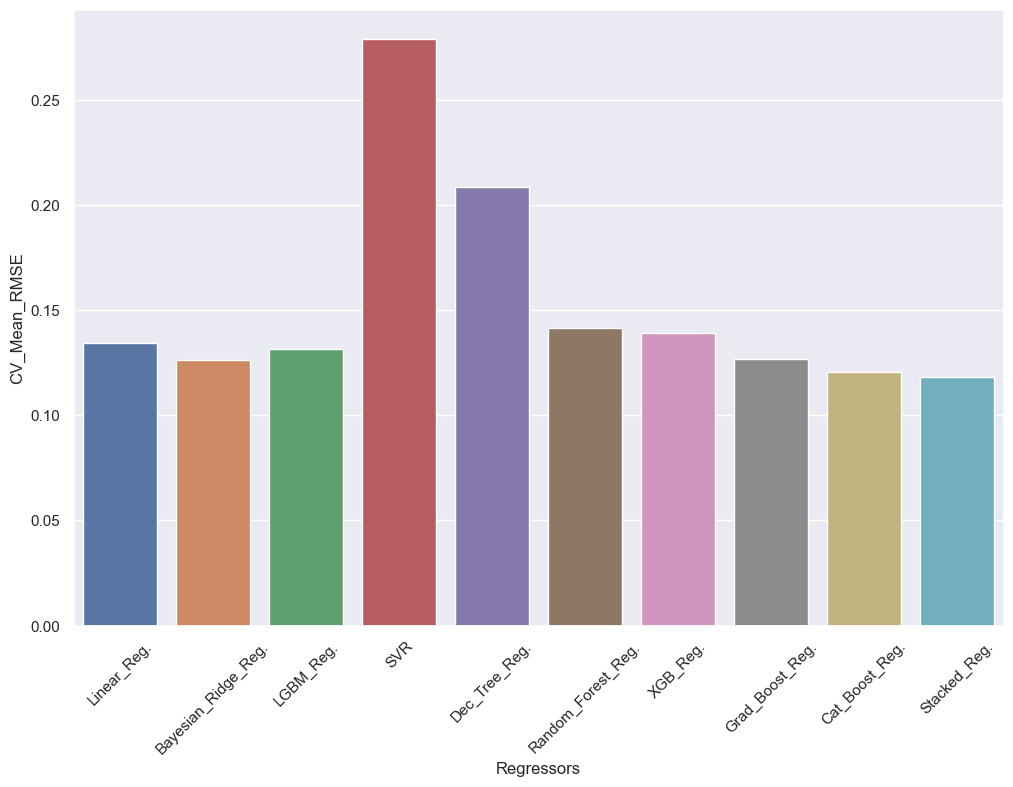

In [37]:
# plot final score of each model
# ดู error ของแต่ละ model ที่เลือกมา

plt.figure(figsize = (12,8))
sns.barplot(final_cv_score['Regressors'],final_cv_score['RMSE_mean'])
plt.xlabel('Regressors', fontsize = 12)
plt.ylabel('CV_Mean_RMSE', fontsize = 12)
plt.xticks(rotation=45)
plt.show()

### Cat Boost Regressor

- Use Cat Boost Regressor due to Importance features explainable and almost lowest error

In [38]:
# Train-Test split the data

X_train,X_val,y_train,y_val = train_test_split(train,target_log,test_size = 0.1,random_state=42)

# Cat Boost Regressor
# ใช้เป็น Cat Boost Regressor เพราะมี error ที่ต่ำและสามารถอธิบาย 
    # correlation ระหว่าง features กับ target
    # correlation ระหว่าง features ด้วยกันได้

cat = CatBoostRegressor()
cat_model = cat.fit(X_train,y_train,
                     eval_set = (X_val,y_val),
                     plot=True,
                     verbose = 0)

cat_pred = cat_model.predict(X_val)
cat_score = rmse(y_val, cat_pred)
cat_score

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0.11053114704278424

In [39]:
# Importance features of our model

feat_imp = cat_model.get_feature_importance(prettified=True)
feat_imp

,Feature Id,Importances
0,OverallQual,19.111101
1,GrLivArea,14.019833
2,TotalBsmtSF,7.064322
3,YearBuilt,4.326505
4,LotArea,3.651711
...,...,...
304,GarageQual_None,0.000000
305,GarageQual_Po,0.000000
306,GarageCond_Gd,0.000000
307,PavedDrive_P,0.000000


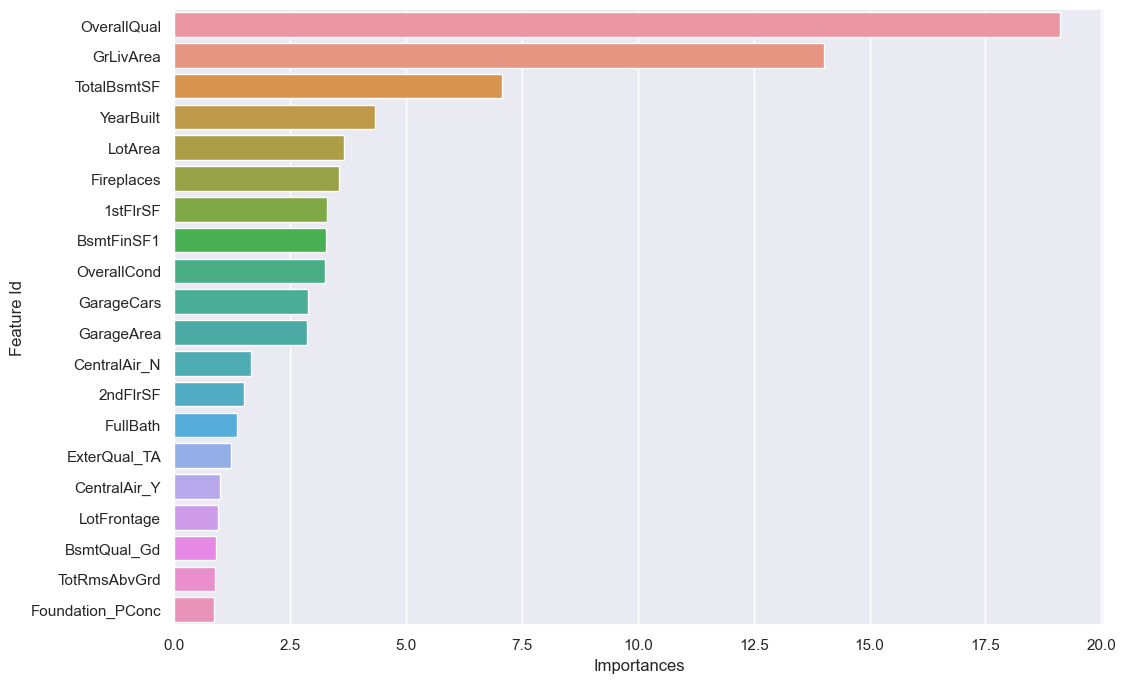

In [40]:
# Plotting top 20 importance features

plt.figure(figsize = (12,8))
sns.barplot(feat_imp['Importances'][:20],feat_imp['Feature Id'][:20], orient = 'h')
plt.show()

In [41]:
# Features Interactions

train_data = Pool(X_train)

interaction = cat_model.get_feature_importance(train_data, type="Interaction")
column_names = X_train.columns.values 
interaction = pd.DataFrame(interaction, columns=["feature1", "feature2", "importance"])
interaction.feature1 = interaction.feature1.apply(lambda l: column_names[int(l)])
interaction.feature2 = interaction.feature2.apply(lambda l: column_names[int(l)])
interaction.head(20)

,feature1,feature2,importance
0,OverallQual,GrLivArea,1.030967
1,LotArea,OverallQual,0.986679
2,LotArea,GrLivArea,0.706851
3,OverallQual,TotalBsmtSF,0.678819
4,YearBuilt,GrLivArea,0.623628
5,LotArea,YearBuilt,0.577978
6,BsmtFinSF1,GrLivArea,0.560606
7,OverallQual,BsmtFinSF1,0.557026
8,GrLivArea,GarageArea,0.513951
9,OverallQual,YearBuilt,0.500488


In [42]:
# Test CSV Submission

test_pred = cat.predict(test)
submission = pd.DataFrame(test_id, columns = ['Id'])
test_pred = np.expm1(test_pred)
submission['SalePrice'] = test_pred 
submission.head()

,Id,SalePrice
0,1461,121856.236511
1,1462,165312.601420
2,1463,184470.744522
3,1464,195894.436080
4,1465,185765.135534


In [43]:
# Saving the results in a csv file

submission.to_csv("result.csv", index = False, header = True)